In [50]:
from spacepy import pycdf
import numpy as np

cdf = pycdf.CDF("../input/l1_cdf_data_l2_fixed.cdf")
for var in cdf:
    print(f"{var}: shape={np.shape(cdf[var][:])}")
    print(cdf[var][:])

bitstring_index: shape=(10,)
[ 1  2  3  4  5  6  7  8  9 10]
total_counts_per_energy: shape=(10, 6, 7, 16, 45)
[[[[[ 666.2022     694.5082      91.99454   ...  169.83606
      787.5137     880.5191   ]
    [ 718.7705     103.11475    537.8142    ...  347.75955
      828.96173    429.6448   ]
    [ 424.59015    732.9235     329.56284   ...  646.9945
      975.54645    452.89618  ]
    ...
    [ 189.04372    598.47       683.388     ...  825.92896
      592.40436    100.08197  ]
    [ 417.51367    573.1967     490.30054   ...  859.2896
      343.71585    216.33879  ]
    [ 884.56287    491.31146    969.4809    ...  831.9945
      488.2787     266.88525  ]]

   [[ 416.50275    166.80328    280.0273    ...  110.19125
      149.6175     339.67212  ]
    [ 841.0929     833.0055     476.14755   ...   81.88525
      536.8033     147.59563  ]
    [ 122.3224     608.5792     602.5137    ...  178.93443
       67.73224    531.74866  ]
    ...
    [ 170.847      262.84152    584.31696   ...  932.07

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from spacepy import pycdf

In [53]:
cdf_path = "../input/l1_cdf_data_l2_fixed.cdf"
cdf = pycdf.CDF(cdf_path)

# 查看變數列表
print(list(cdf))

# 取得 shape
total_counts_all = cdf["total_counts_per_energy"][:]   # shape => (num_bitstrings, 16, 45)
mean_counts_all  = cdf["mean_counts_per_energy"][:]    # shape => (num_bitstrings, 16, 45)
bitstring_index  = cdf["bitstring_index"][:]           # shape => (num_bitstrings,)
time_data = cdf["epoch"][:]  
# time_data = time_data.astype('O')  
cdf.close()

['bitstring_index', 'total_counts_per_energy', 'mean_counts_per_energy', 'epoch', 'duration']


In [55]:
print(total_counts_all.shape)
print(mean_counts_all.shape)
print(bitstring_index.shape)
print(time_data.shape)
print(time_data[0])

(10, 6, 7, 16, 45)
(10, 6, 7, 16, 45)
(10,)
(10, 45)
[1743755685374 1743755765374 1743755845374 1743755925374 1743756005374
 1743756085374 1743756165374 1743756245374 1743756325374 1743756405374
 1743756485374 1743756565374 1743756645374 1743756725374 1743756805374
 1743756885374 1743756965374 1743757045374 1743757125374 1743757205374
 1743757285374 1743757365374 1743757445374 1743757525374 1743757605374
 1743757685374 1743757765374 1743757845374 1743757925374 1743758005374
 1743758085374 1743758165374 1743758245374 1743758325374 1743758405374
 1743758485374 1743758565374 1743758645374 1743758725374 1743758805374
 1743758885374 1743758965374 1743759045374 1743759125374 1743759205374]


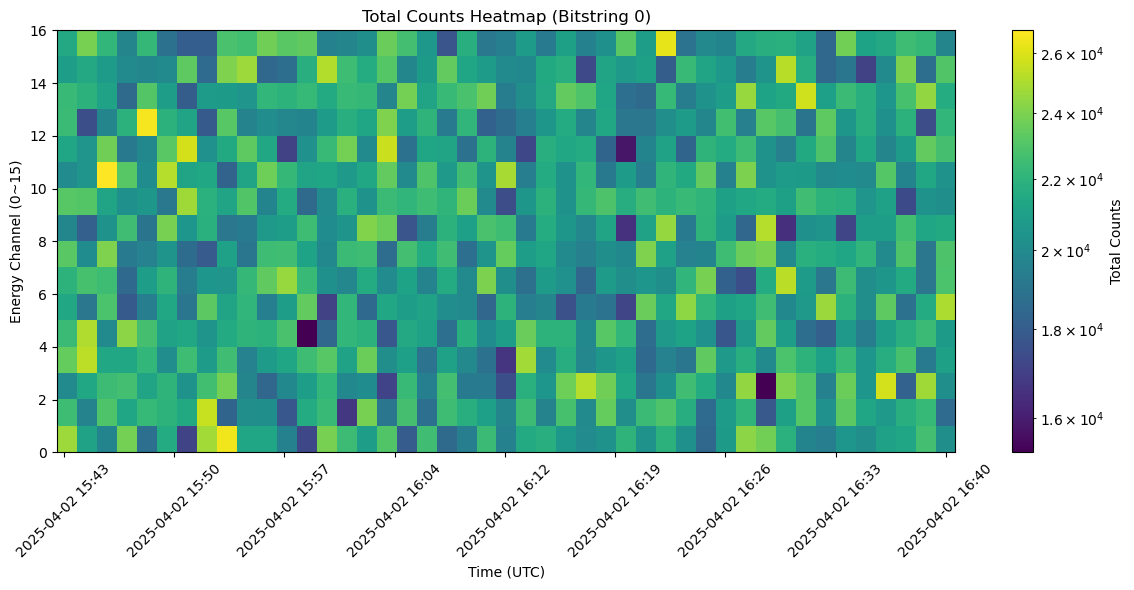

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from spacepy import pycdf  
import datetime

cdf_path = "../input/l1_cdf_data_l2.cdf"
cdf = pycdf.CDF(cdf_path)

total_counts_all = cdf["total_counts_per_energy"][:]   
time_data = cdf["epoch"][:]  

cdf.close()

counts = total_counts_all[0]  # shape: (16, 45)
time_data = np.ravel(time_data[0])  # shape: (45,)

if np.max(time_data) > 10**15:
    time_data = time_data / 10**6
elif np.max(time_data) > 10**12:
    time_data = time_data / 10**3

time_data = [datetime.datetime.utcfromtimestamp(t) for t in time_data]

fig, ax = plt.subplots(figsize=(12, 6))

im = ax.imshow(counts, aspect='auto', origin='lower',
               extent=[mdates.date2num(time_data[0]), mdates.date2num(time_data[-1]), 0, 16],
               cmap='viridis', norm=plt.cm.colors.LogNorm())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Energy Channel (0~15)")

fig.colorbar(im, ax=ax, label="Total Counts")
plt.title("Total Counts Heatmap (Bitstring 0)")
plt.tight_layout()
plt.show()


C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\3886634986.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


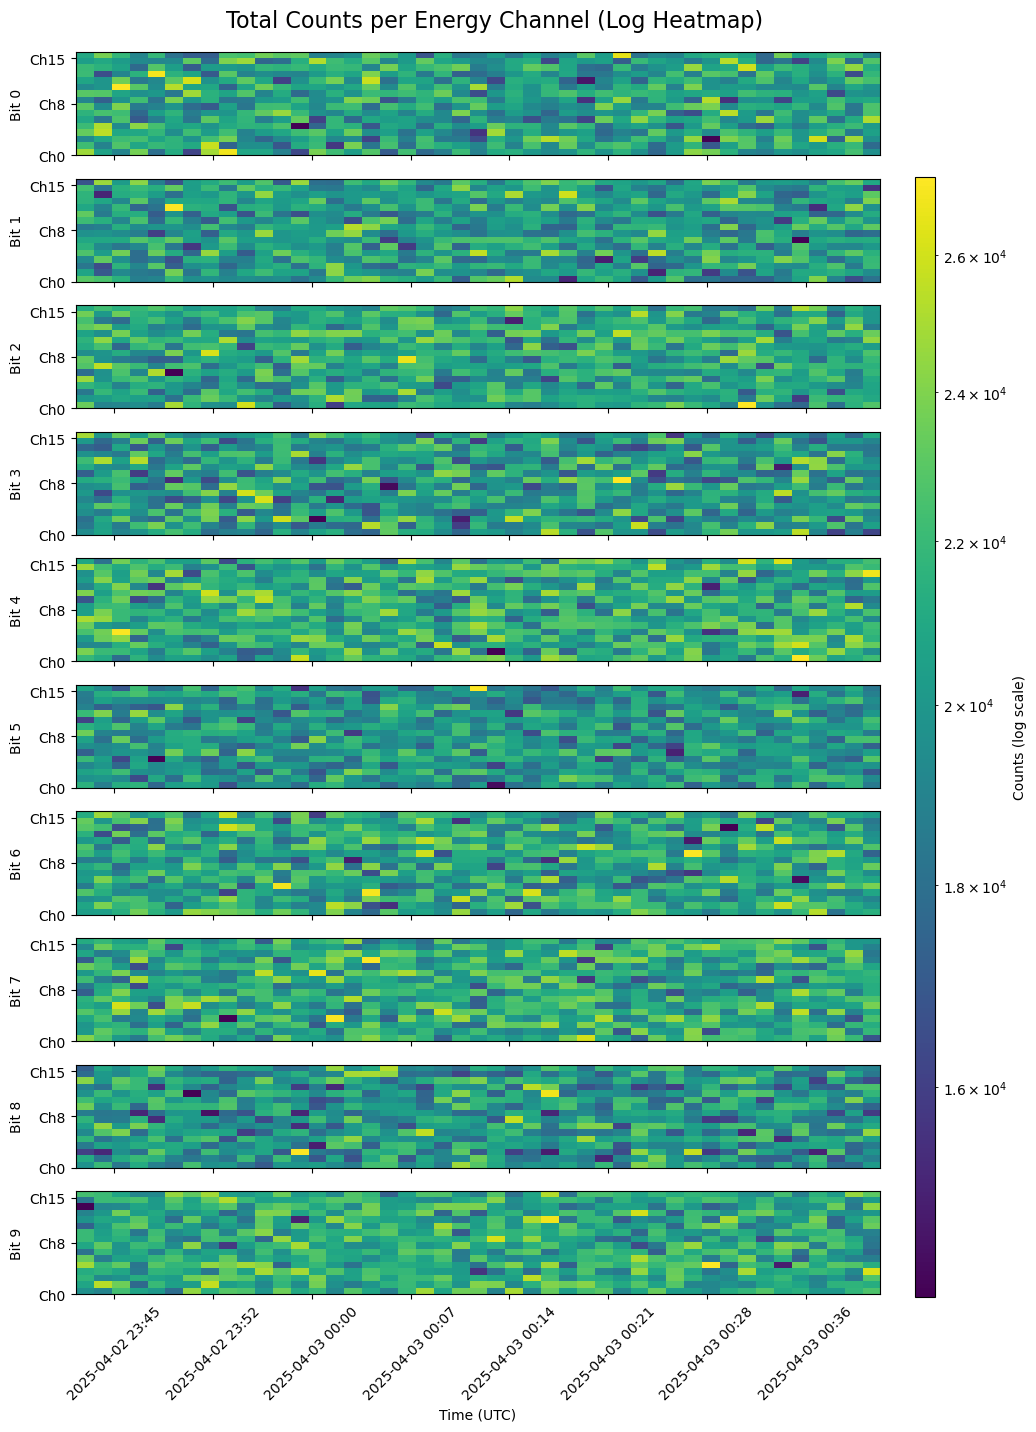

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from spacepy import pycdf  
import datetime

cdf_path = "../input/l1_cdf_data_l2.cdf"
cdf = pycdf.CDF(cdf_path)

total_counts_all = cdf["total_counts_per_energy"][:]  # (10, 16, 45)
time_data = cdf["epoch"][:]                           # (10, 45)
cdf.close()

time_raw = np.ravel(time_data[0])

# milisecond to second
if np.max(time_raw) > 10**15:
    time_raw = time_raw / 1e6
elif np.max(time_raw) > 10**12:
    time_raw = time_raw / 1e3

# second to datetime
time_dt = [datetime.datetime.fromtimestamp(t) for t in time_raw]
x_start = mdates.date2num(time_dt[0])
x_end = mdates.date2num(time_dt[-1])

fig, axes = plt.subplots(10, 1, figsize=(10, 14), sharex=True, sharey=True)

energy_channels = np.arange(16)  
y_ticks = [0, 8, 15]  
y_labels = [f"Ch{ch}" for ch in y_ticks]  


for i, ax in enumerate(axes):
    counts = total_counts_all[i]  # shape: (16, 45)

    im = ax.imshow(counts, aspect='auto', origin='lower',
                   extent=[x_start, x_end, 0, 16],
                   cmap='viridis', norm=plt.cm.colors.LogNorm())

    # set each plot's y_label
    ax.set_ylabel(f"Bit {i}")  
    ax.set_yticks(y_ticks)
    # channel name
    ax.set_yticklabels(y_labels)  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.xticks(rotation=45)


# set time label
axes[-1].set_xlabel("Time (UTC)")

cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  
fig.colorbar(im, cax=cbar_ax, orientation='vertical', label="Counts (log scale)")

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.suptitle("Total Counts per Energy Channel (Log Heatmap)", fontsize=16, y=1.02)
plt.show()


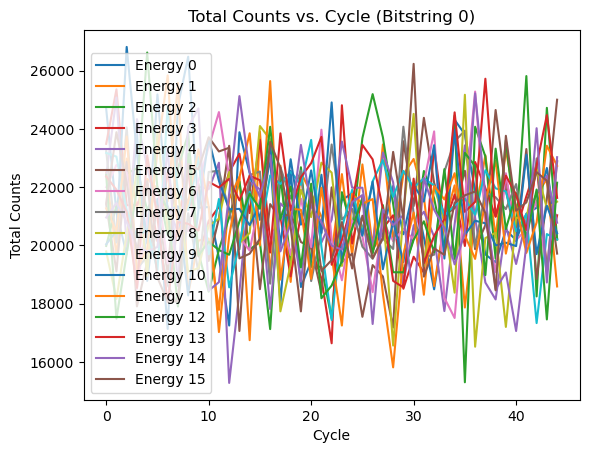

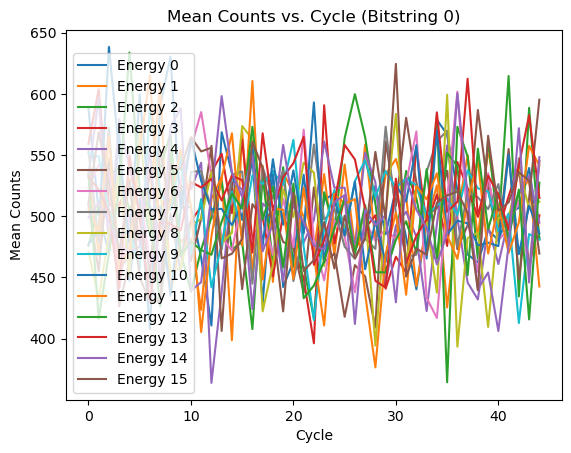

In [45]:

# 先抓第0筆bitstring的數據 => shape: (16, 45)
# 16 = energy channel, 45 = cycles
total_counts_0 = total_counts_all[0]  
mean_counts_0  = mean_counts_all[0]

# 產生 x 軸 (cycle 0~44)
x = np.arange(total_counts_0.shape[1])  # shape[1] = 45


plt.figure()  # 開啟一個新的繪圖窗口
for e in range(total_counts_0.shape[0]):  # e 從 0 到 15
    plt.plot(x, total_counts_0[e], label=f"Energy {e}")

plt.title("Total Counts vs. Cycle (Bitstring 0)")
plt.xlabel("Cycle")
plt.ylabel("Total Counts")
plt.legend()
plt.show()  

plt.figure()  
for e in range(mean_counts_0.shape[0]):
    plt.plot(x, mean_counts_0[e], label=f"Energy {e}")

plt.title("Mean Counts vs. Cycle (Bitstring 0)")
plt.xlabel("Cycle")
plt.ylabel("Mean Counts")
plt.legend()
plt.show() 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from spacepy import pycdf  
import datetime

def plot_cdf_heatmap(cdf_path):
    """
    Load a CDF file and plot total counts per energy channel over time as log-scale heatmaps.

    Parameters:
    cdf_path (str): Path to the CDF file
    """

    # Load CDF file
    cdf = pycdf.CDF(cdf_path)
    total_counts_all = cdf["total_counts_per_energy"][:]  # Shape: (10, 16, 45)
    time_data = cdf["epoch"][:]                           # Shape: (10, 45)
    cdf.close()

    # Use time from the first bitstring (assuming all have the same time axis)
    time_raw = np.ravel(time_data[0])

    # Convert from microseconds or milliseconds to seconds if necessary
    if np.max(time_raw) > 10**15:
        time_raw = time_raw / 1e6
    elif np.max(time_raw) > 10**12:
        time_raw = time_raw / 1e3

    # Convert to datetime format
    time_dt = [datetime.datetime.utcfromtimestamp(t) for t in time_raw]
    x_start = mdates.date2num(time_dt[0])
    x_end = mdates.date2num(time_dt[-1])

    # Create subplots for each bitstring
    fig, axes = plt.subplots(10, 1, figsize=(10, 14), sharex=True, sharey=True)

    # Y-axis ticks and labels
    y_ticks = [0, 8, 15]
    y_labels = [f"Ch{ch}" for ch in y_ticks]

    for i, ax in enumerate(axes):
        counts = total_counts_all[i]  # Shape: (16, 45)

        im = ax.imshow(counts, aspect='auto', origin='lower',
                       extent=[x_start, x_end, 0, 16],
                       cmap='viridis', norm=plt.cm.colors.LogNorm())

        ax.set_ylabel(f"Bit {i}")
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    # Set x-axis label for the bottom plot
    axes[-1].set_xlabel("Time (UTC)")
    plt.xticks(rotation=45)

    # Add a shared colorbar
    cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
    fig.colorbar(im, cax=cbar_ax, orientation='vertical', label="Counts (log scale)")

    # Layout and title
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.suptitle("Total Counts per Energy Channel (Log Heatmap)", fontsize=16, y=1.02)
    plt.show()


C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1784718730.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


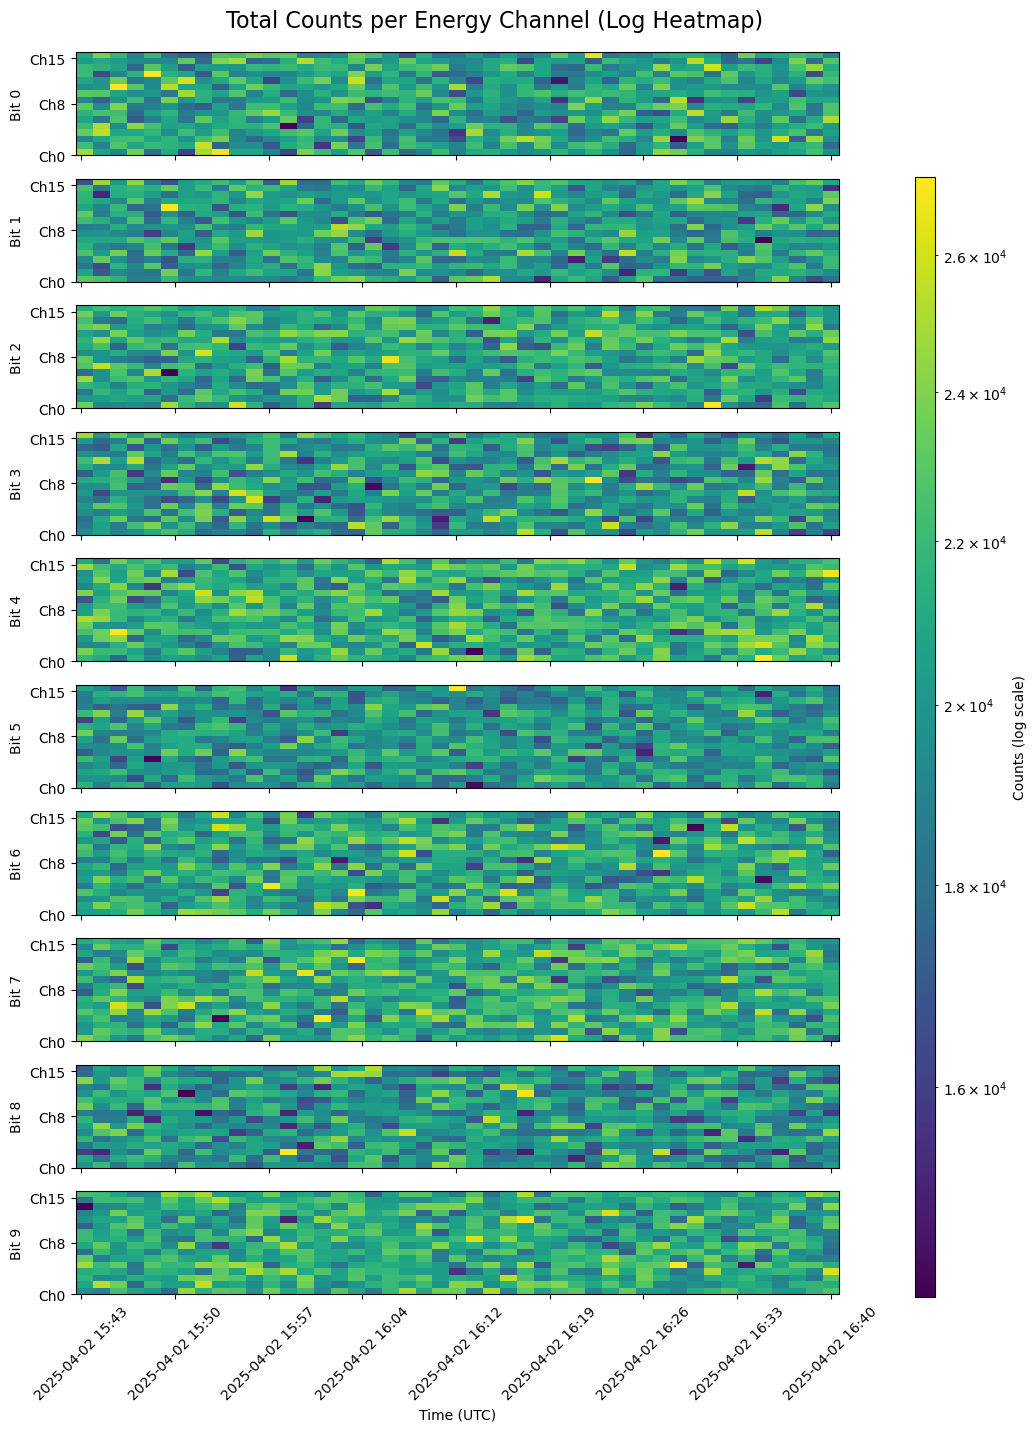

In [47]:
plot_cdf_heatmap("../input/l1_cdf_data_l2.cdf")

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from spacepy import pycdf
import datetime

def plot_cdf_energy_heatmaps(cdf_path):
    cdf = pycdf.CDF(cdf_path)
    
    total_counts_all = cdf["total_counts_per_energy"][:]  # (10, 6, 7, 16, 45)
    time_data = cdf["epoch"][:]                           # (45,)
    cdf.close()

    if len(total_counts_all.shape) < 5:
        x, y, num, e = total_counts_all.shape[:]
        total_counts_all = total_counts_all.reshape(1, x, y, num, e)

    # Convert timestamp
    time_raw = np.ravel(time_data)
    if np.max(time_raw) > 10**15:
        time_raw = time_raw / 1e6
    elif np.max(time_raw) > 10**12:
        time_raw = time_raw / 1e3
        
    time_dt = [datetime.datetime.fromtimestamp(t) for t in time_raw]
    x_start = mdates.date2num(time_dt[0])
    x_end = mdates.date2num(time_dt[-1])

    num_data = total_counts_all.shape[0]     # 10
    num_figs = total_counts_all.shape[1]     # 6
    num_subplots = total_counts_all.shape[2] # 7

    y_ticks = [0, 8, 15]
    y_labels = [f"Ch{ch}" for ch in y_ticks]

    for data_idx in range(num_data):
        for fig_idx in range(num_figs):
            fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 14), sharex=True, sharey=True)

            for bit_idx in range(num_subplots):
                ax = axes[bit_idx]
                counts = total_counts_all[data_idx][fig_idx][bit_idx]  # shape (16, 45)

                im = ax.imshow(counts, aspect='auto', origin='lower',
                               extent=[x_start, x_end, 0, 16],
                               cmap='viridis', norm=plt.cm.colors.LogNorm())

                ax.set_ylabel(f"Bit {bit_idx}")
                ax.set_yticks(y_ticks)
                ax.set_yticklabels(y_labels)
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

            axes[-1].set_xlabel("Time (UTC)")
            plt.xticks(rotation=45)

            cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
            fig.colorbar(im, cax=cbar_ax, orientation='vertical', label="Counts (log scale)")

            plt.tight_layout(rect=[0, 0, 0.9, 1])
            plt.suptitle(f"Sample {data_idx + 1} - Plot {fig_idx + 1}", fontsize=16, y=1.02)
            plt.show()

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


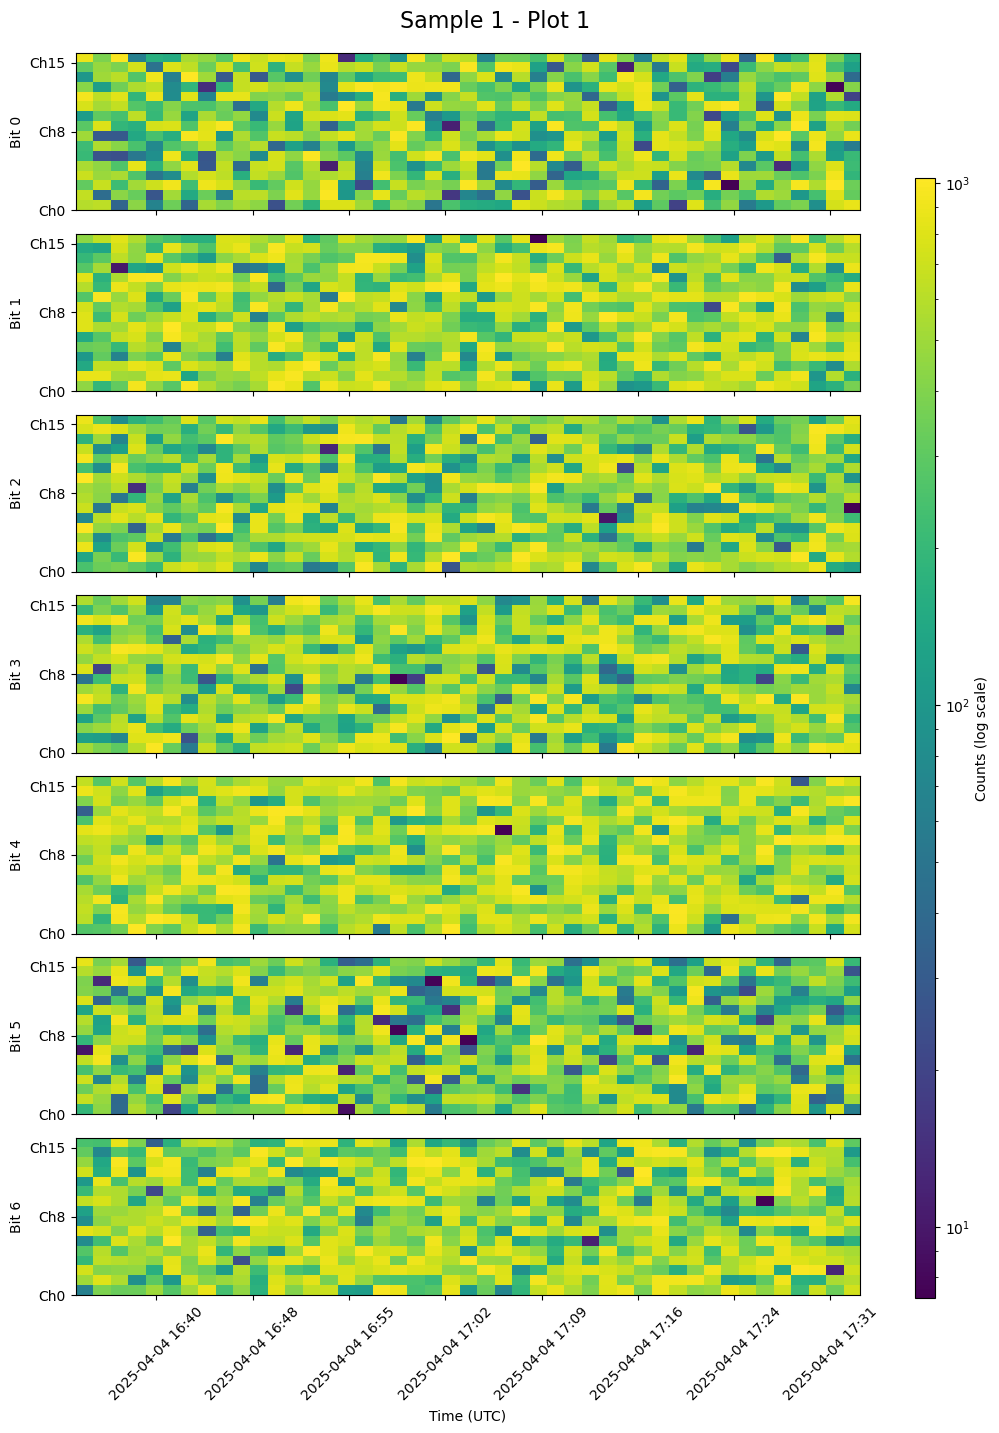

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


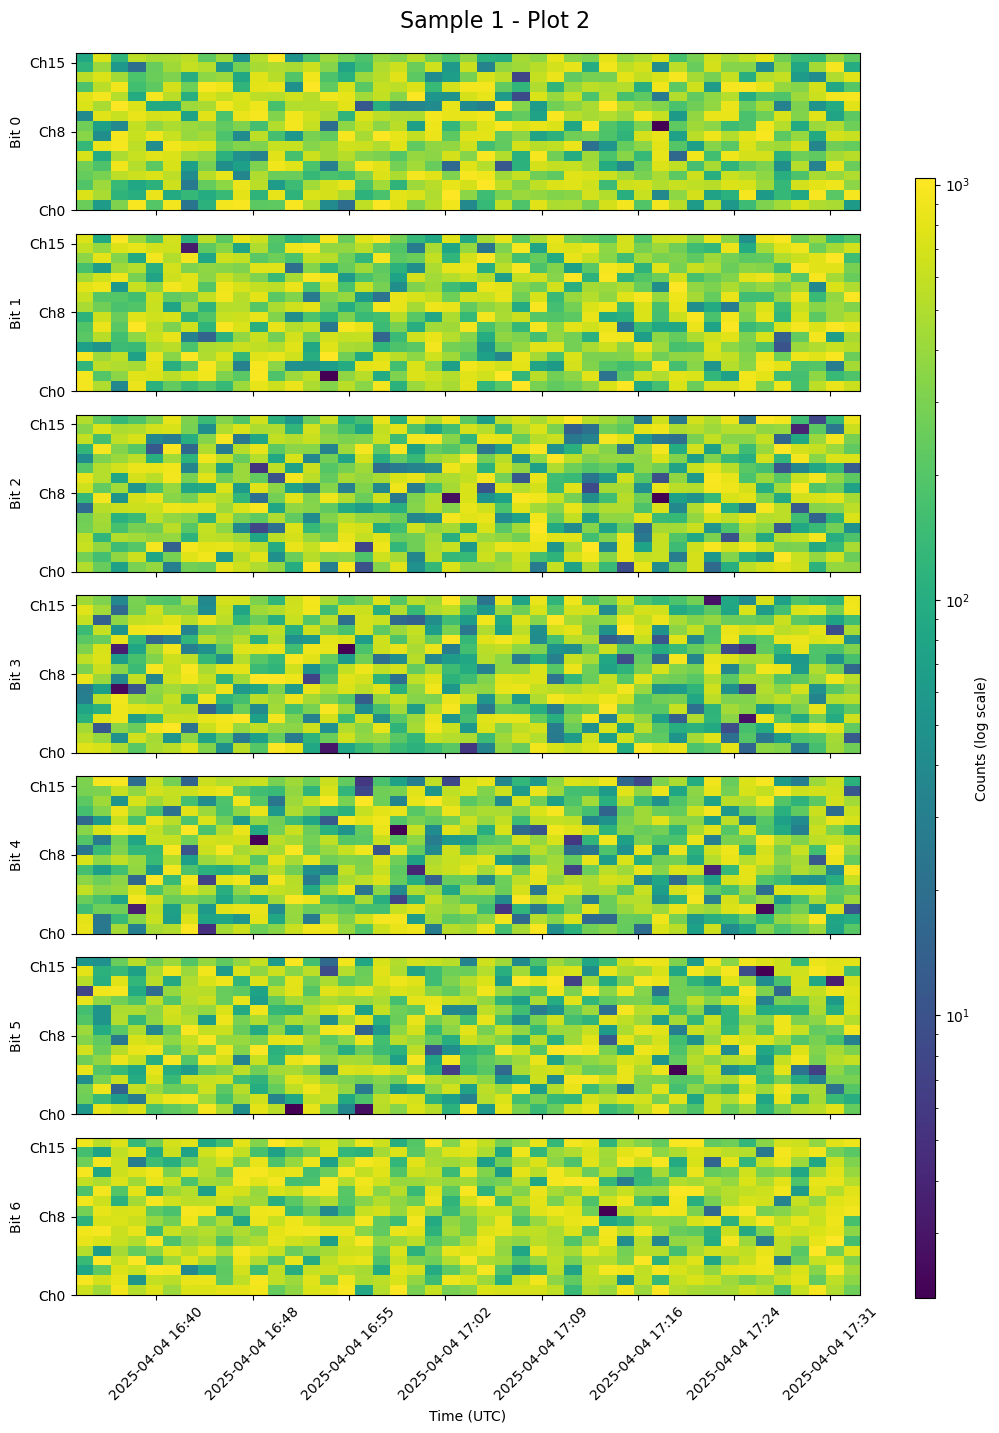

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


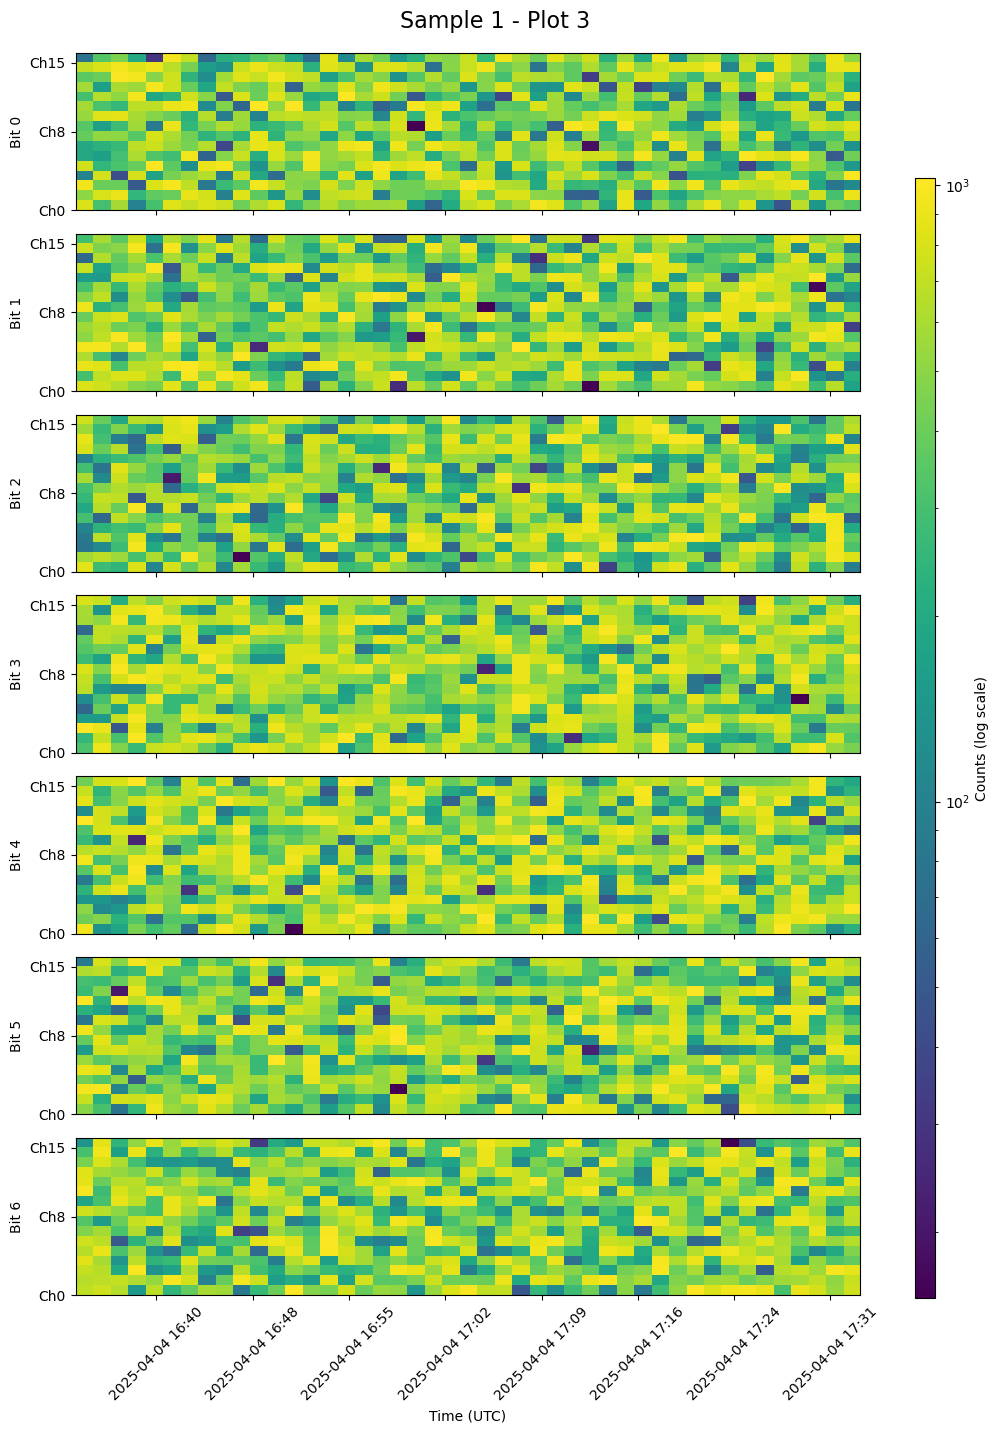

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


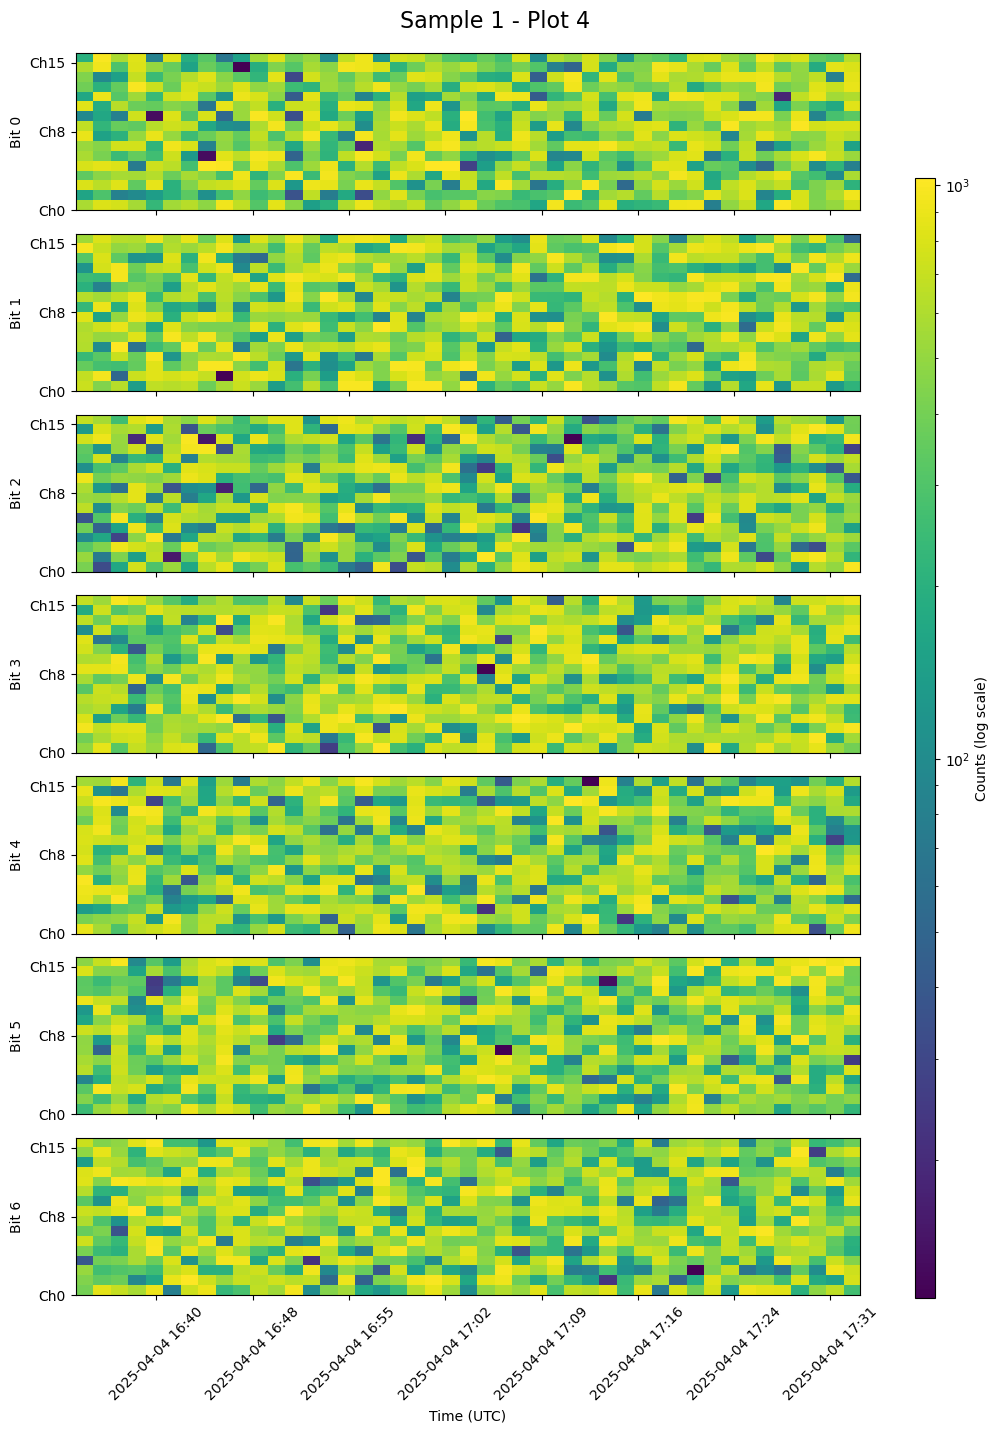

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


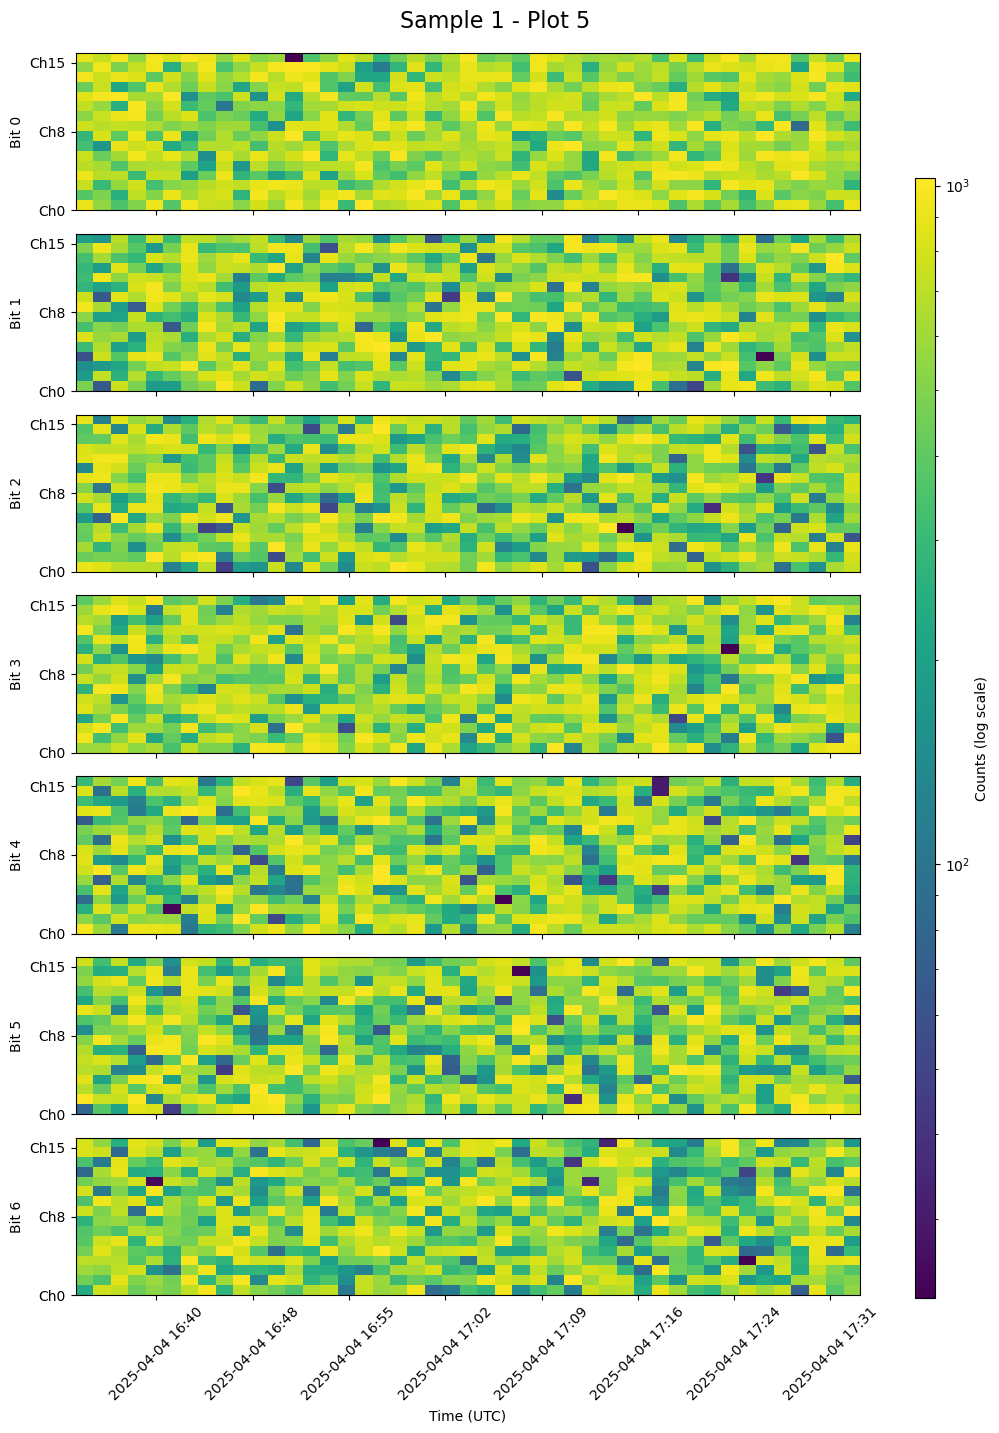

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


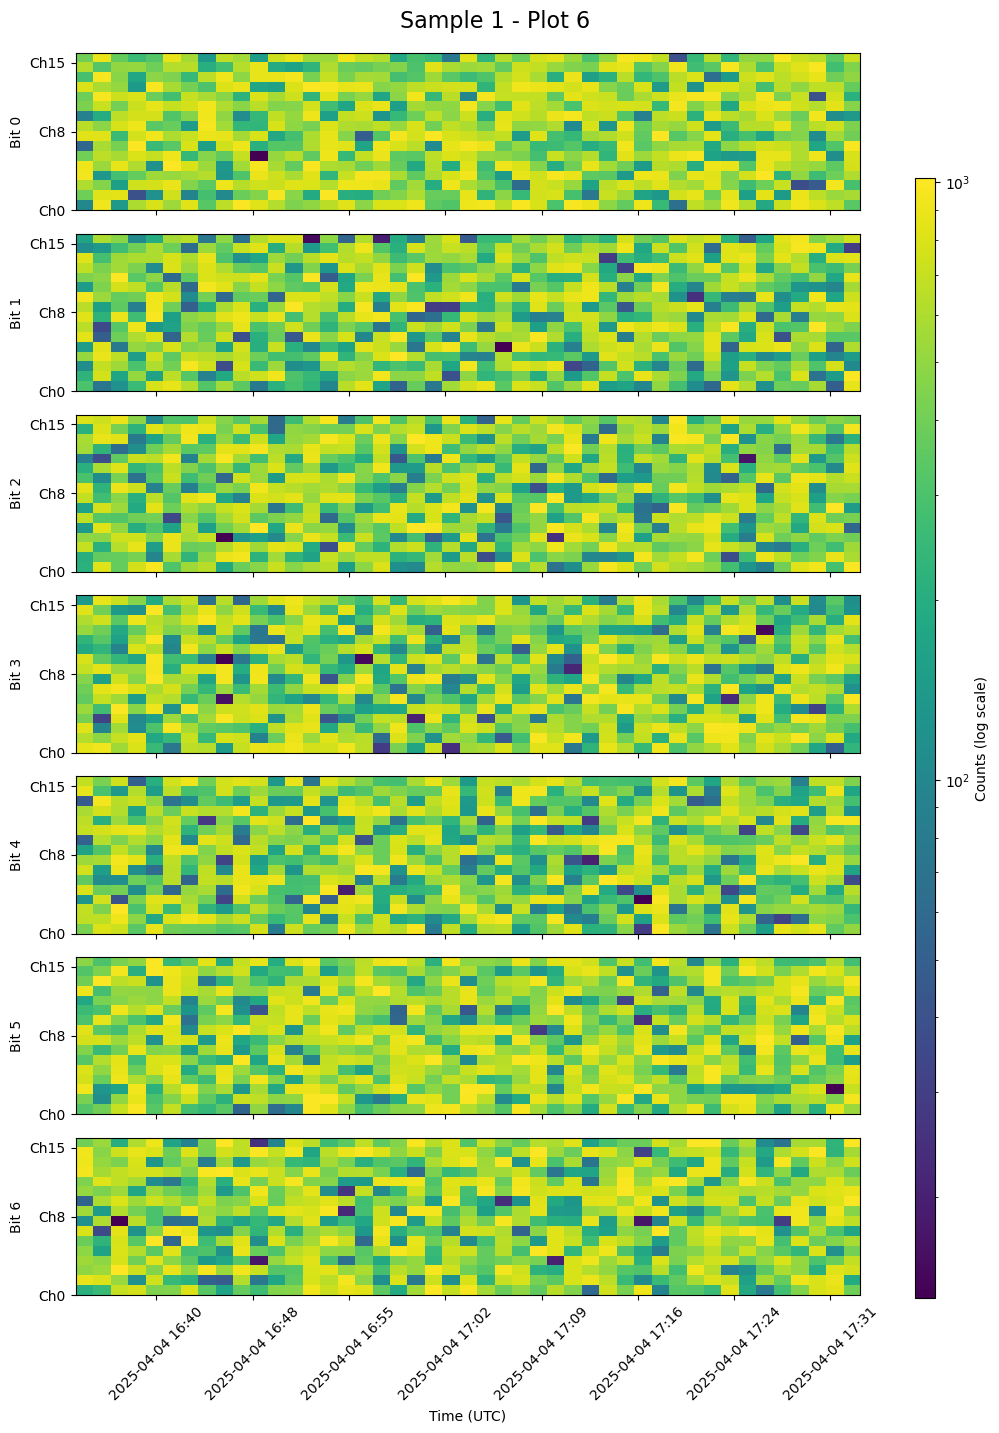

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


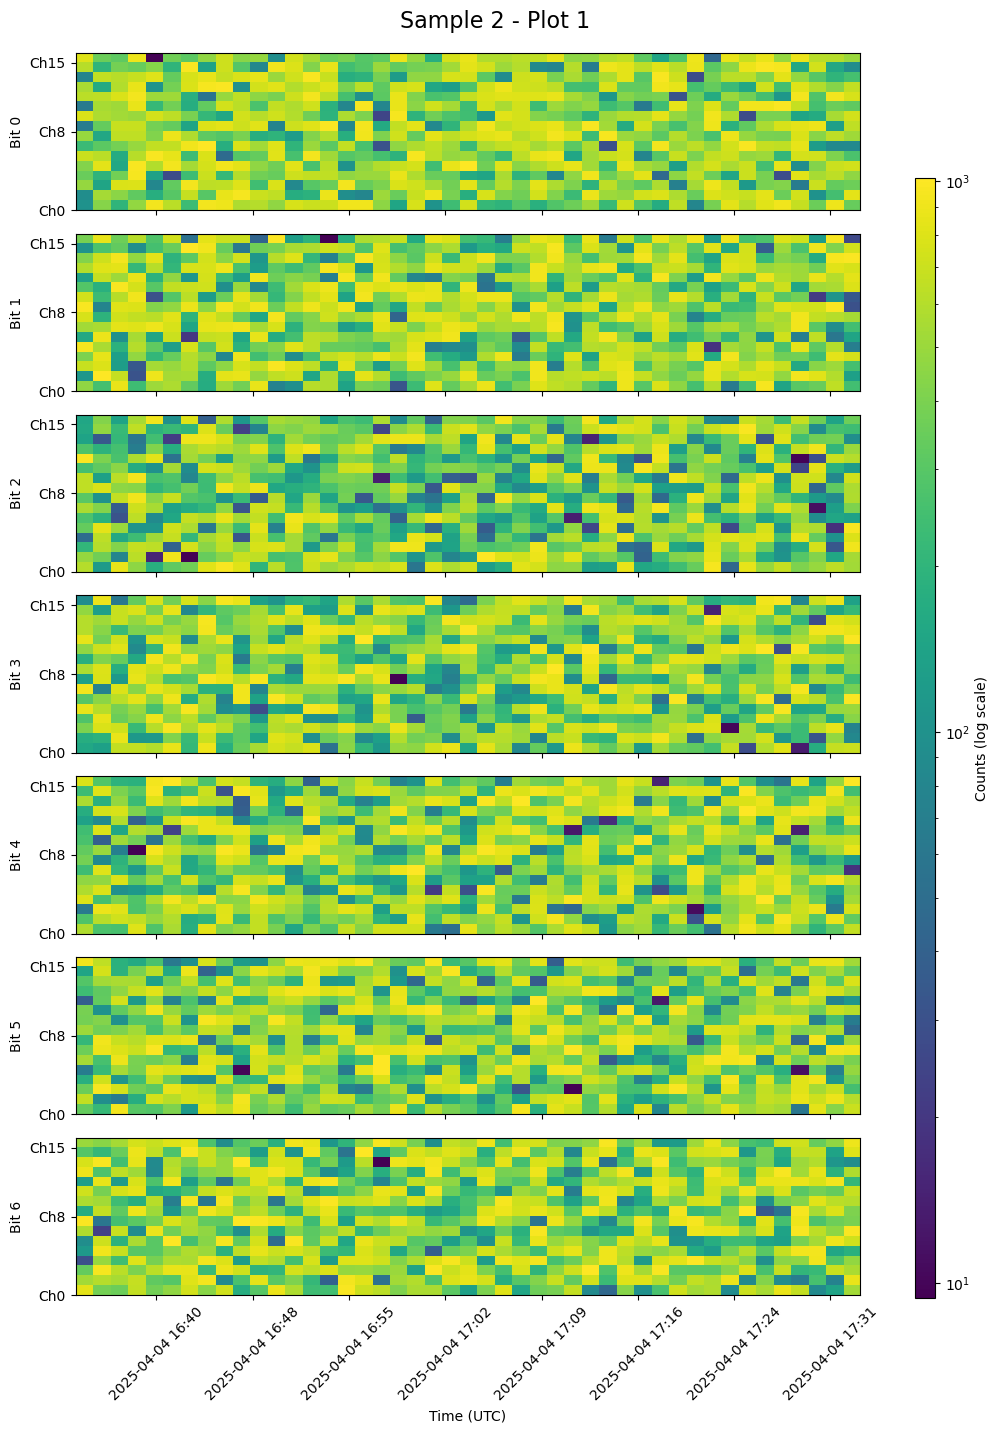

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


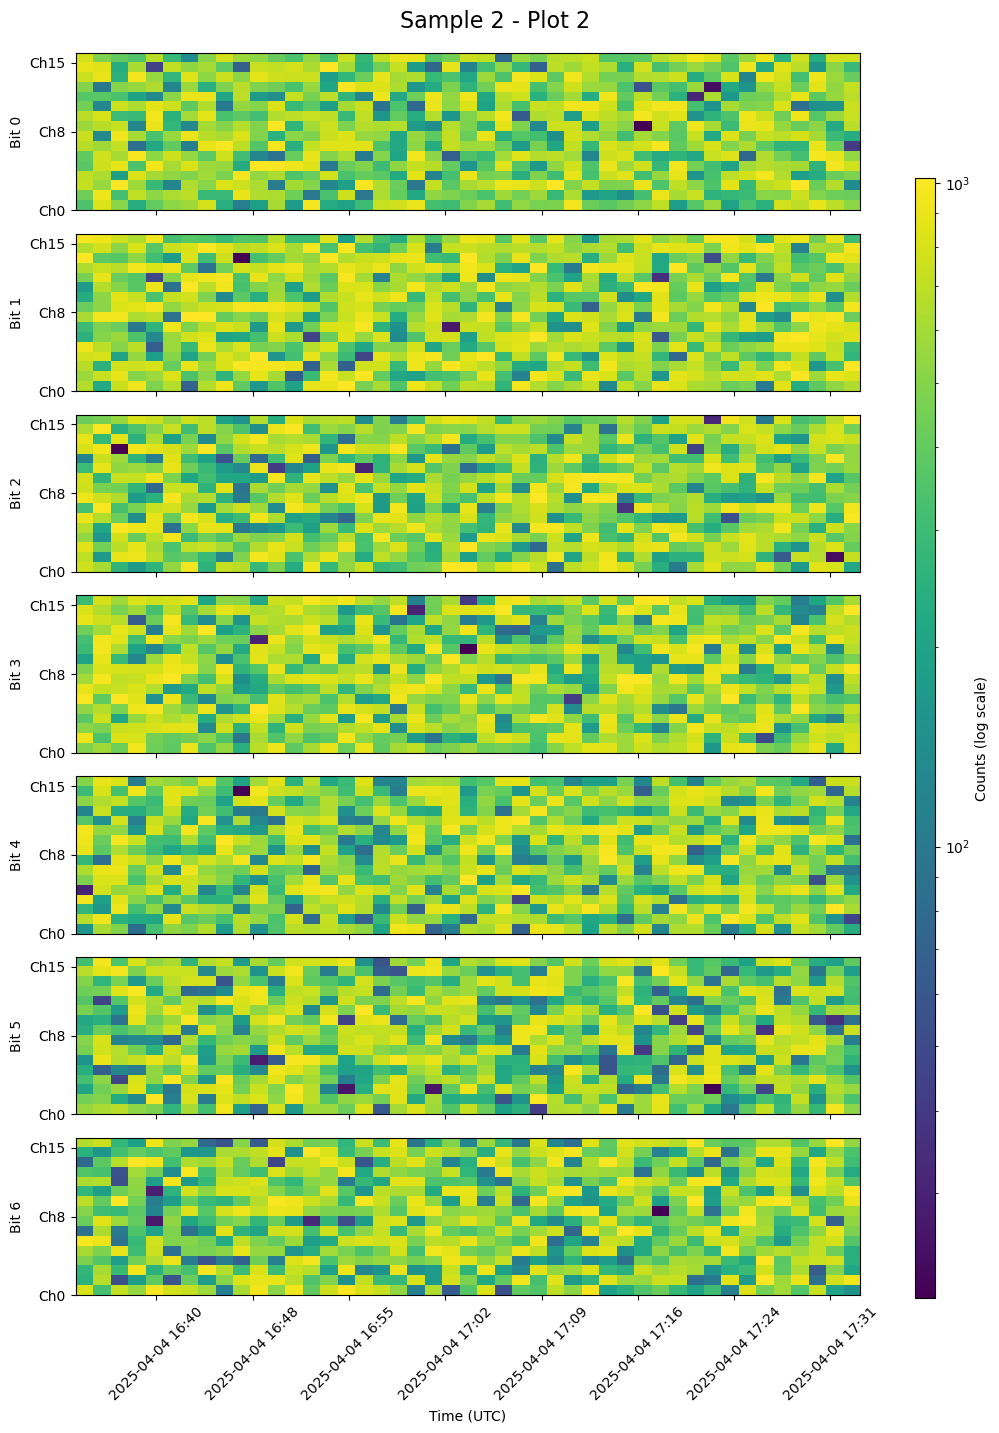

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


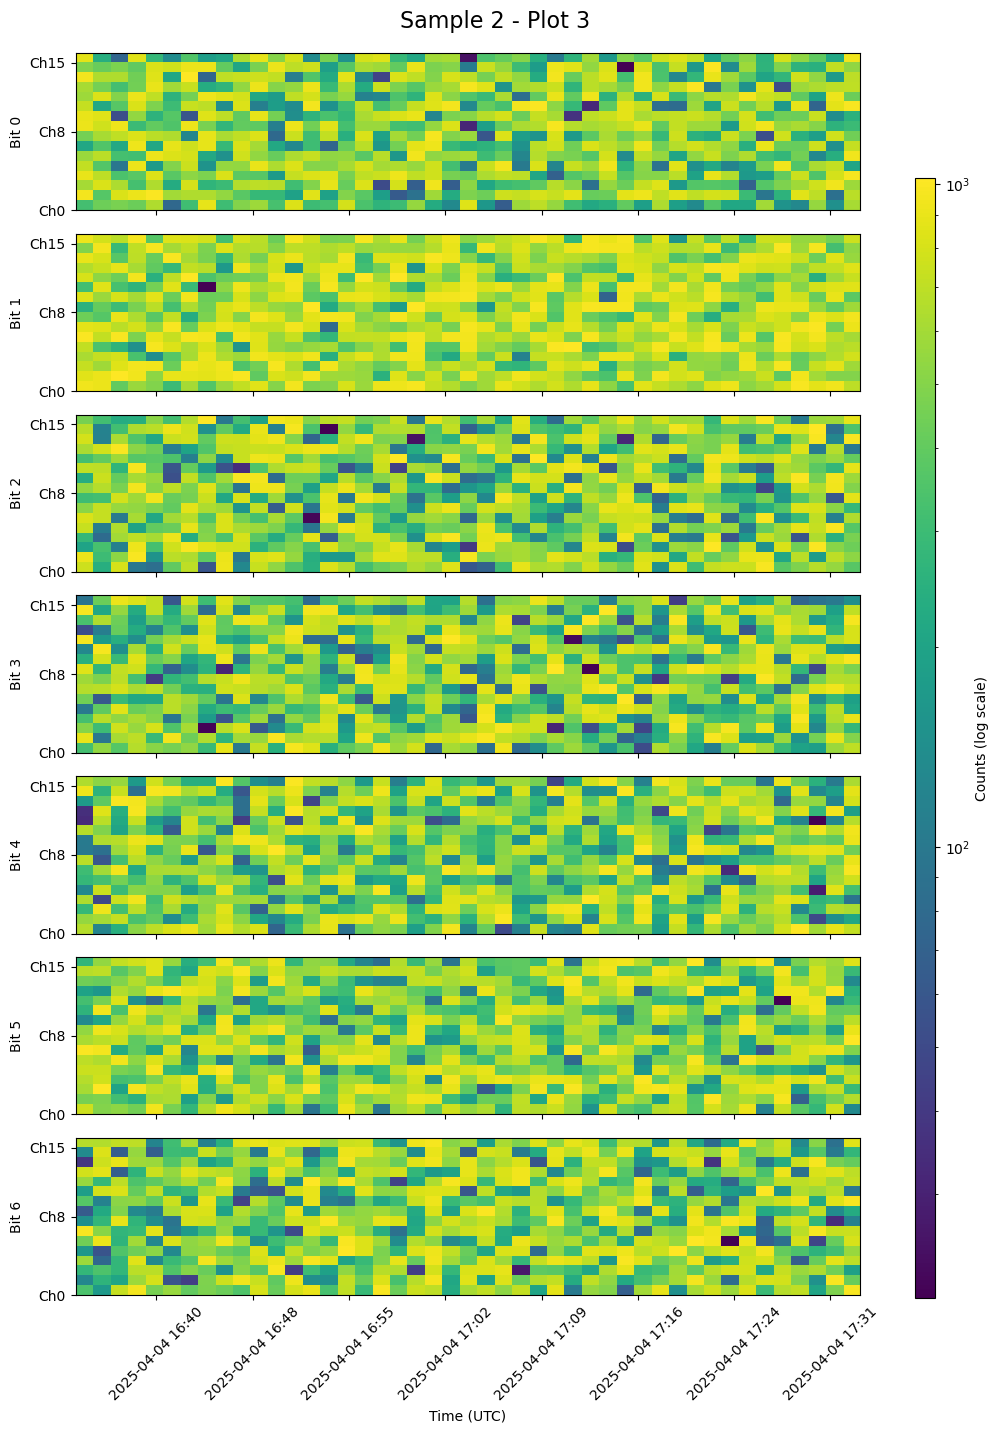

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


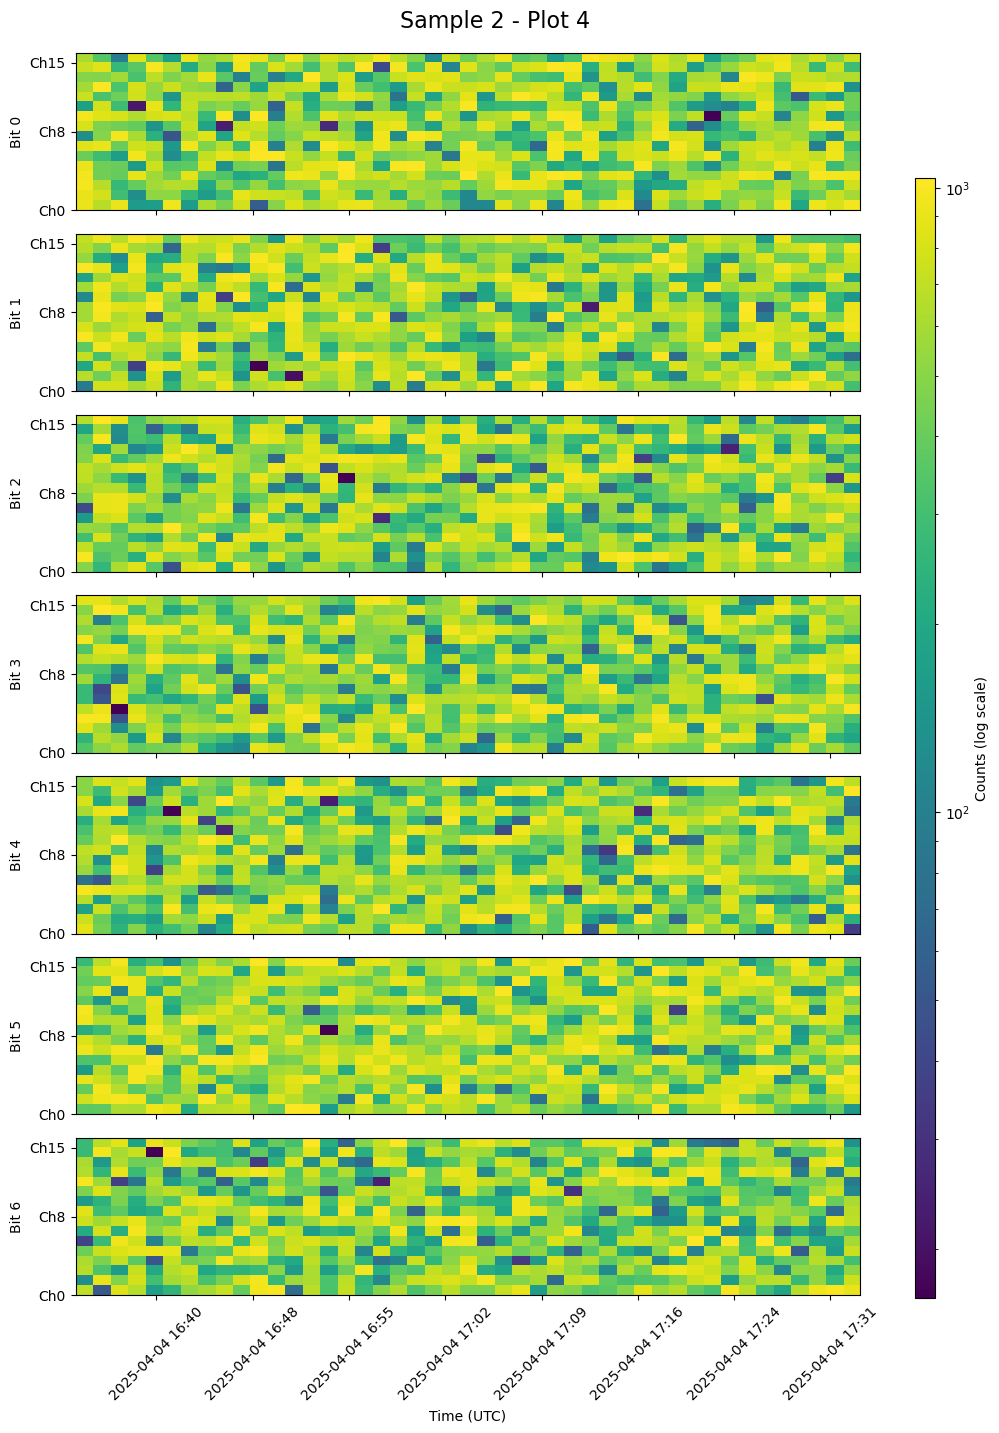

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


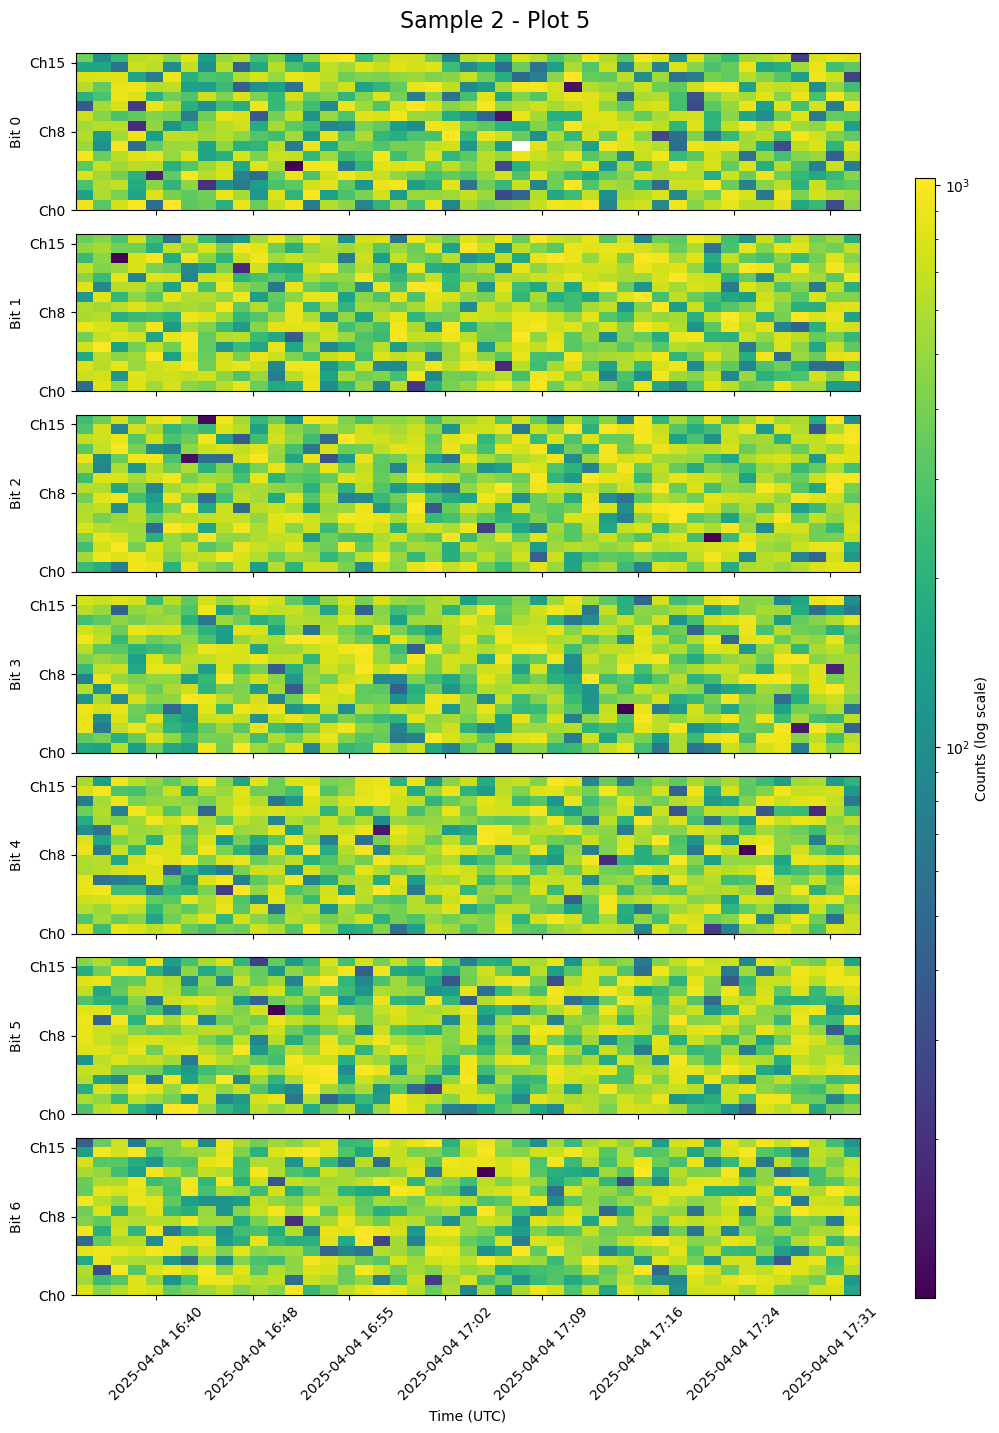

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


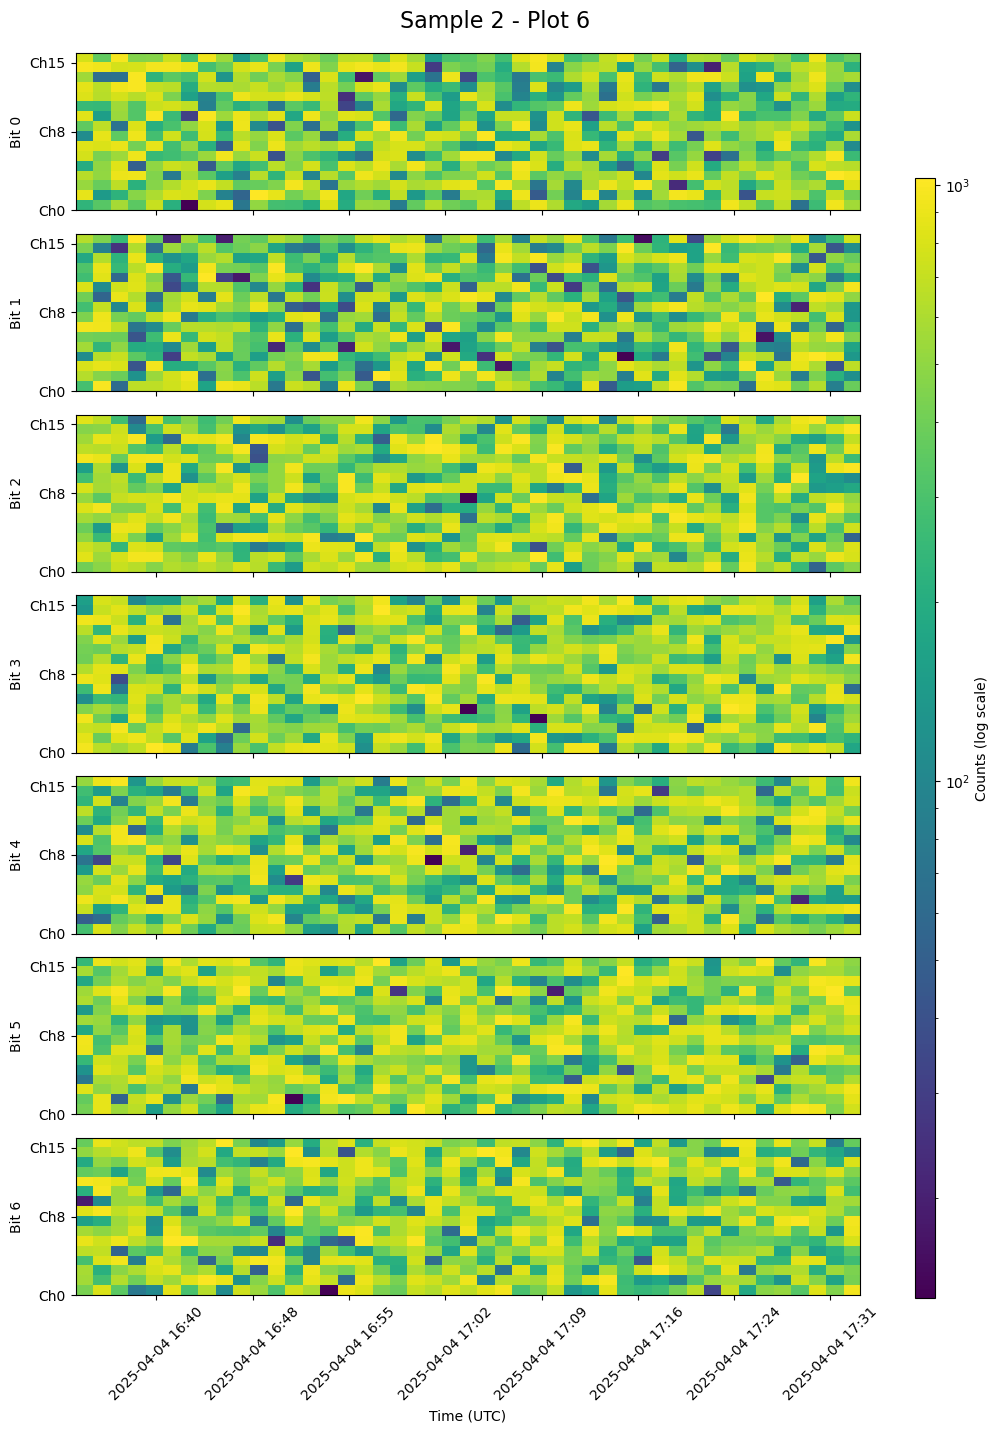

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


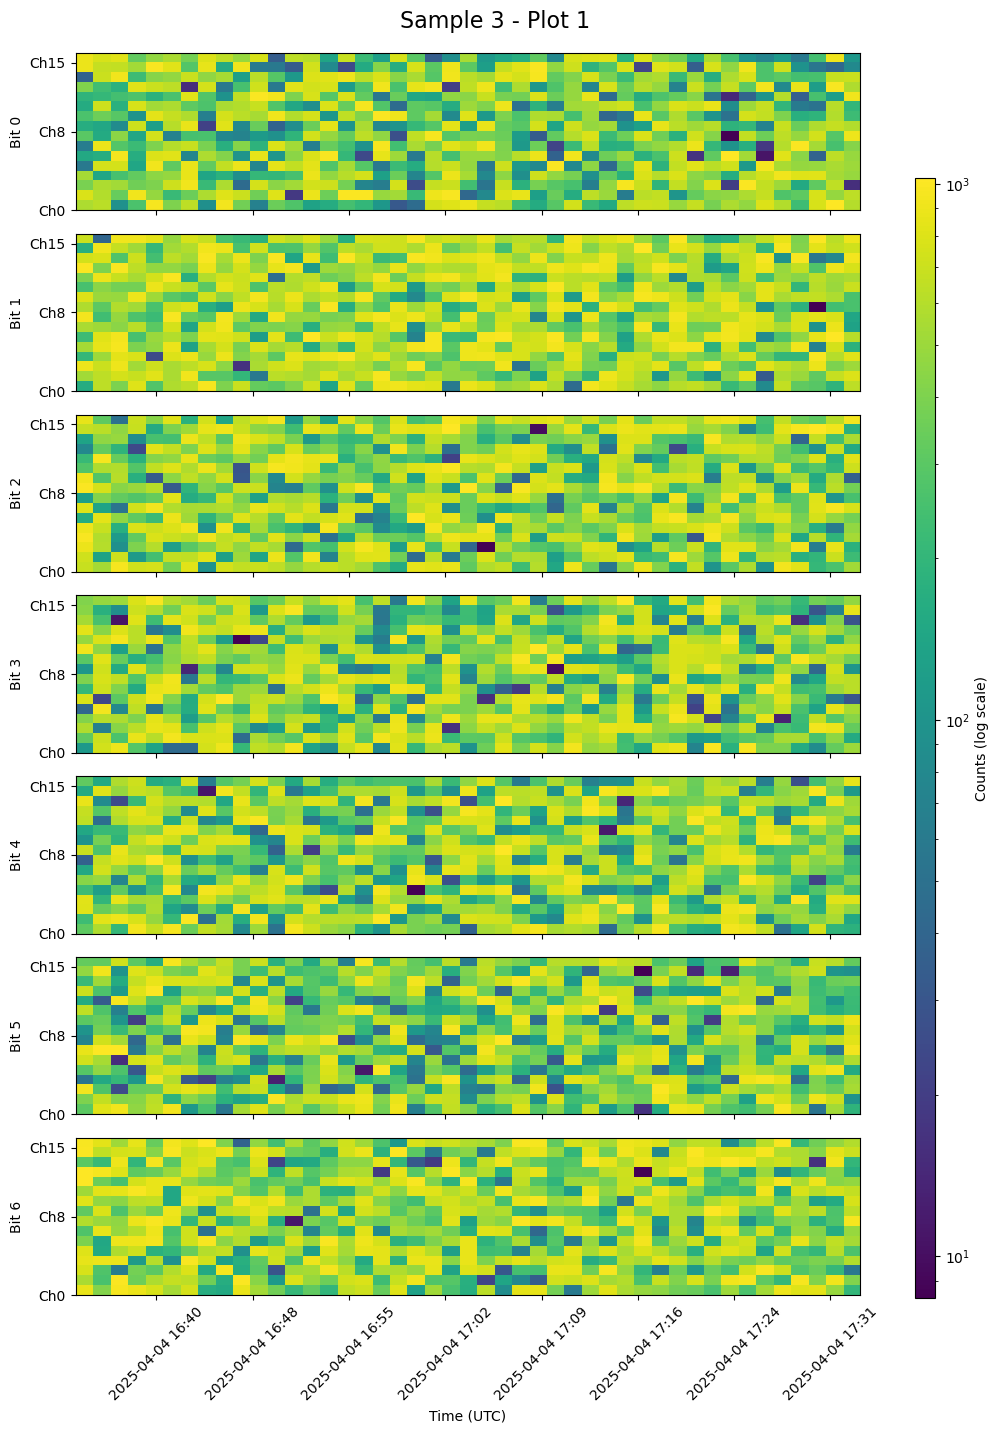

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


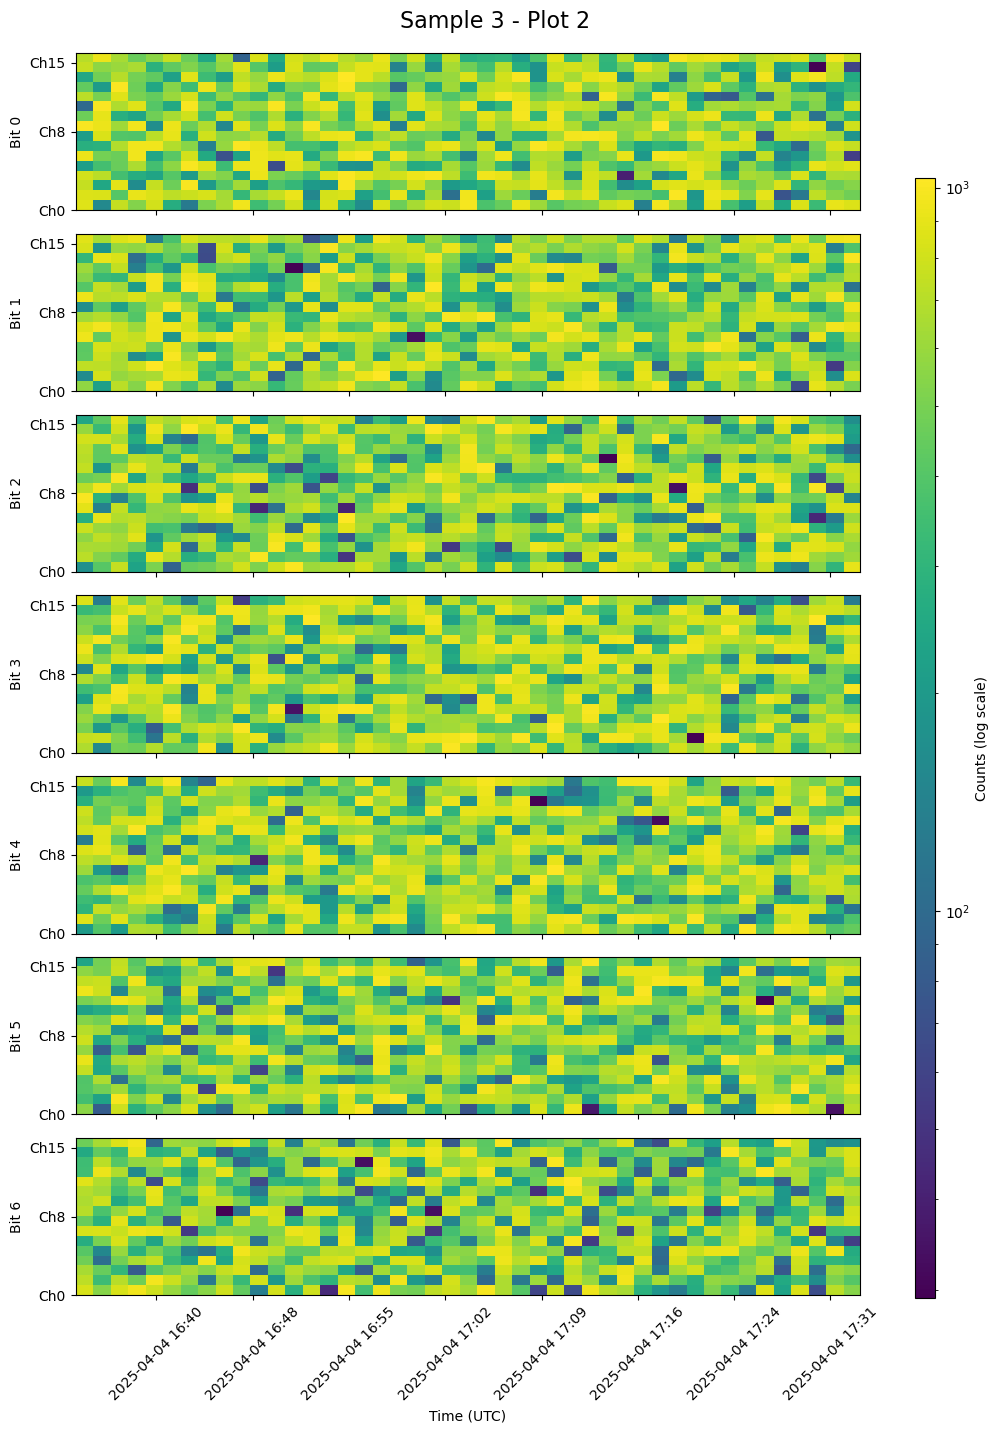

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


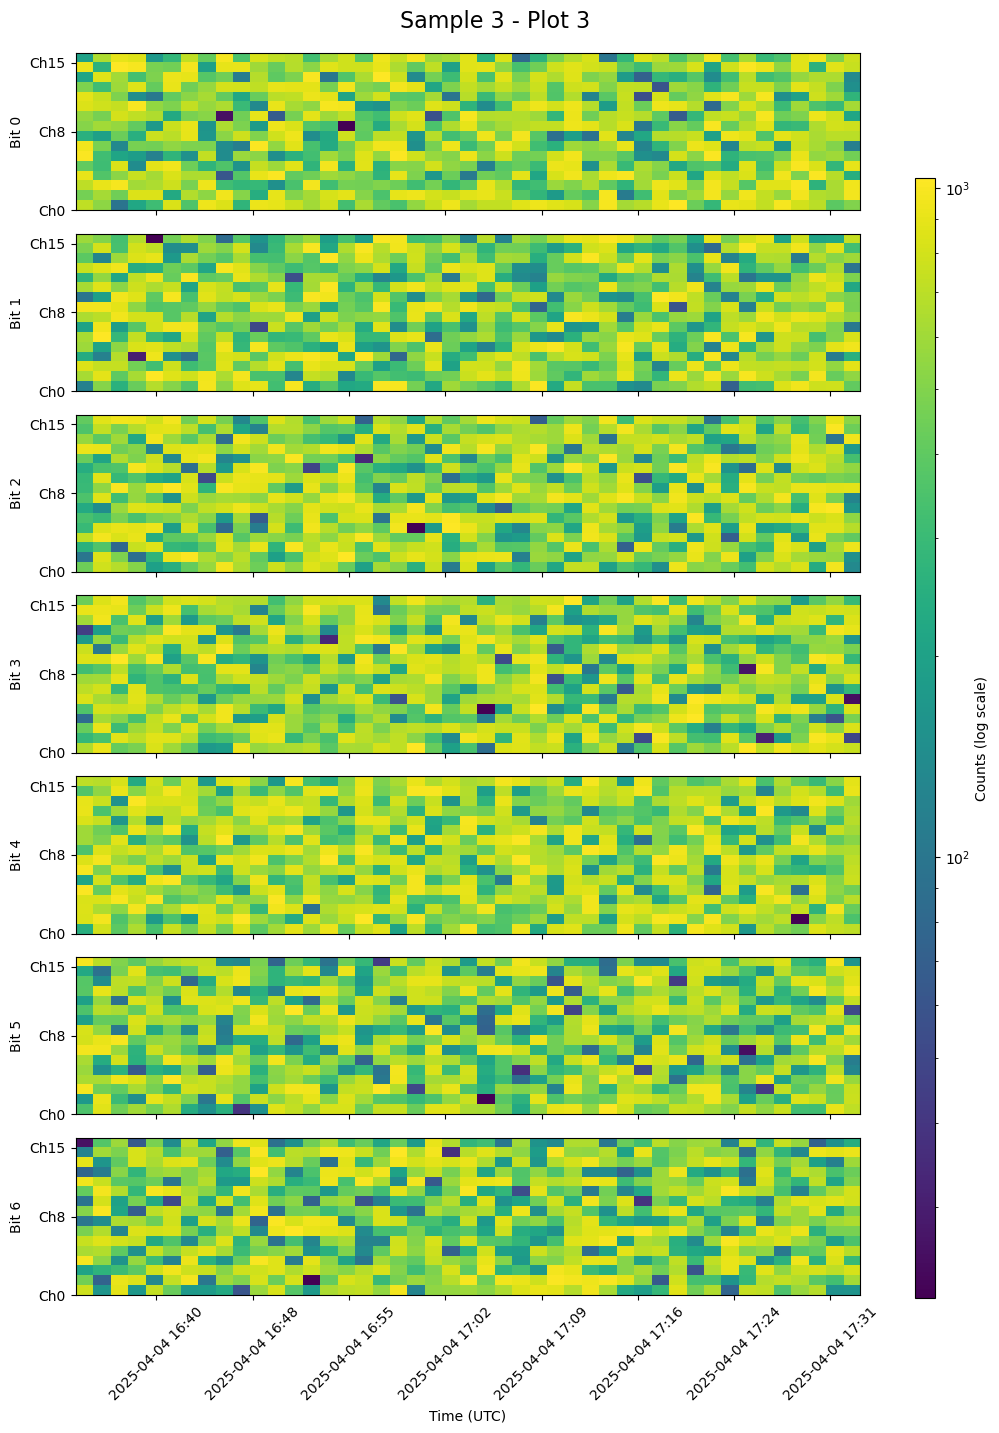

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


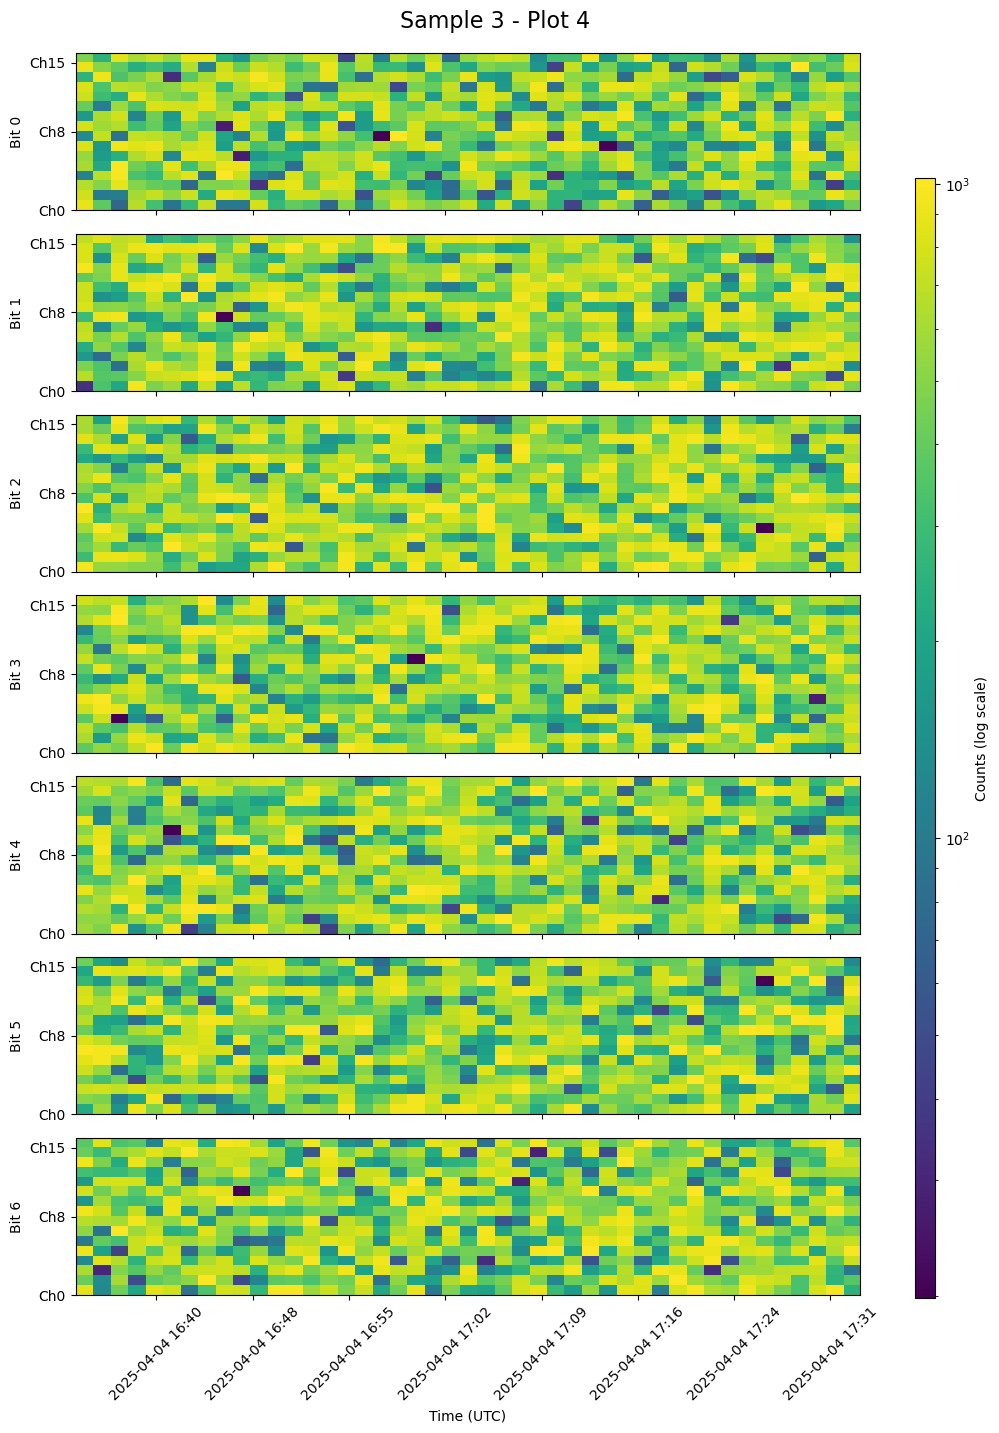

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


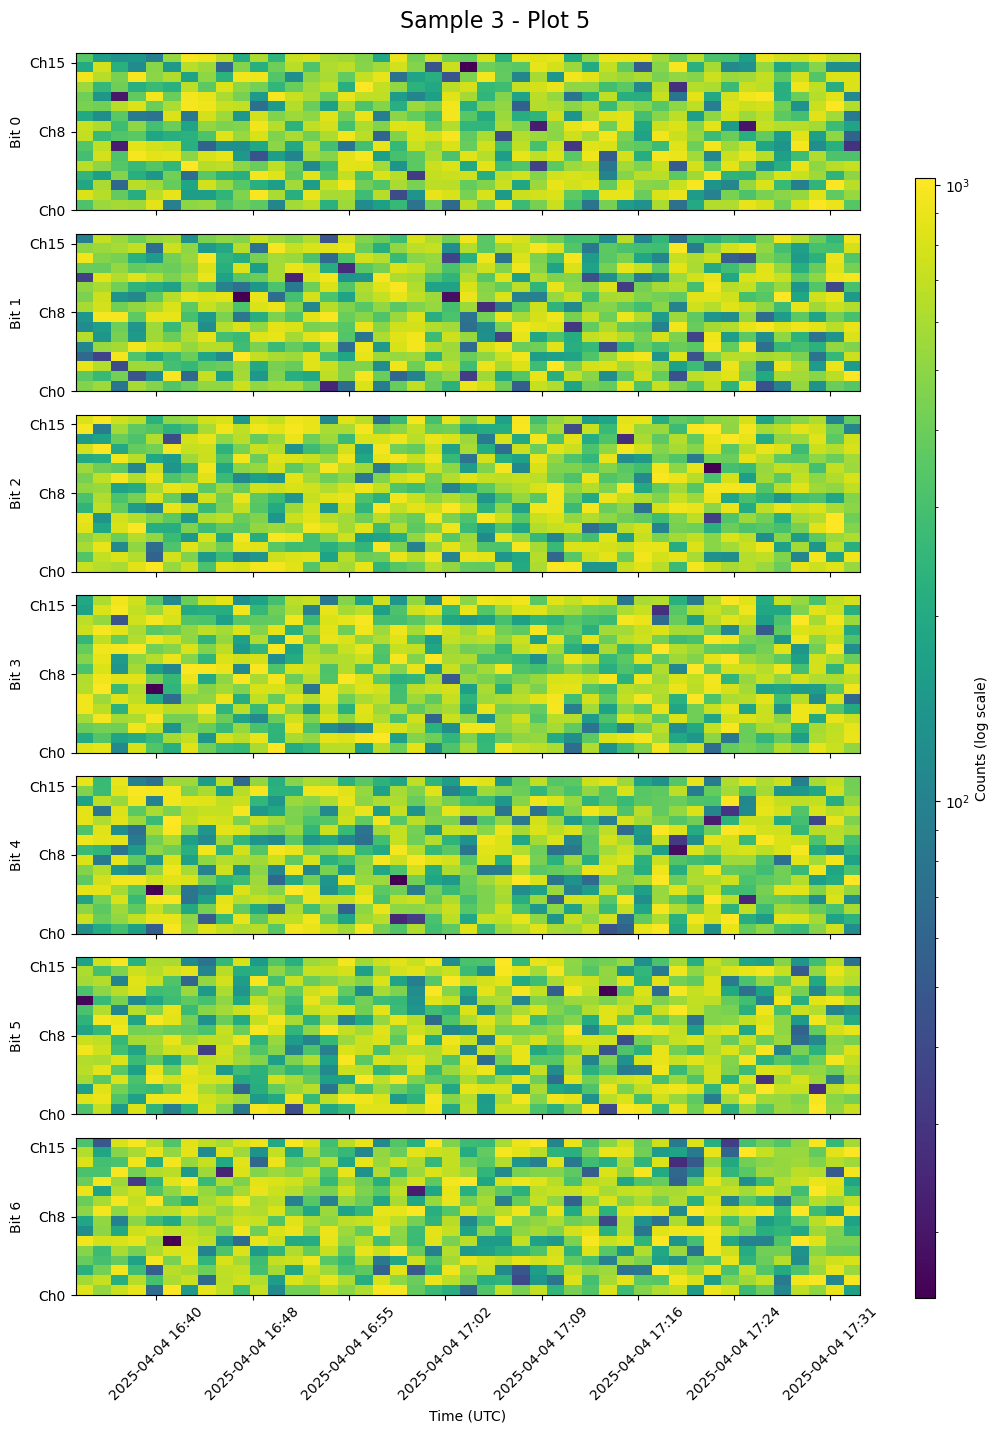

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


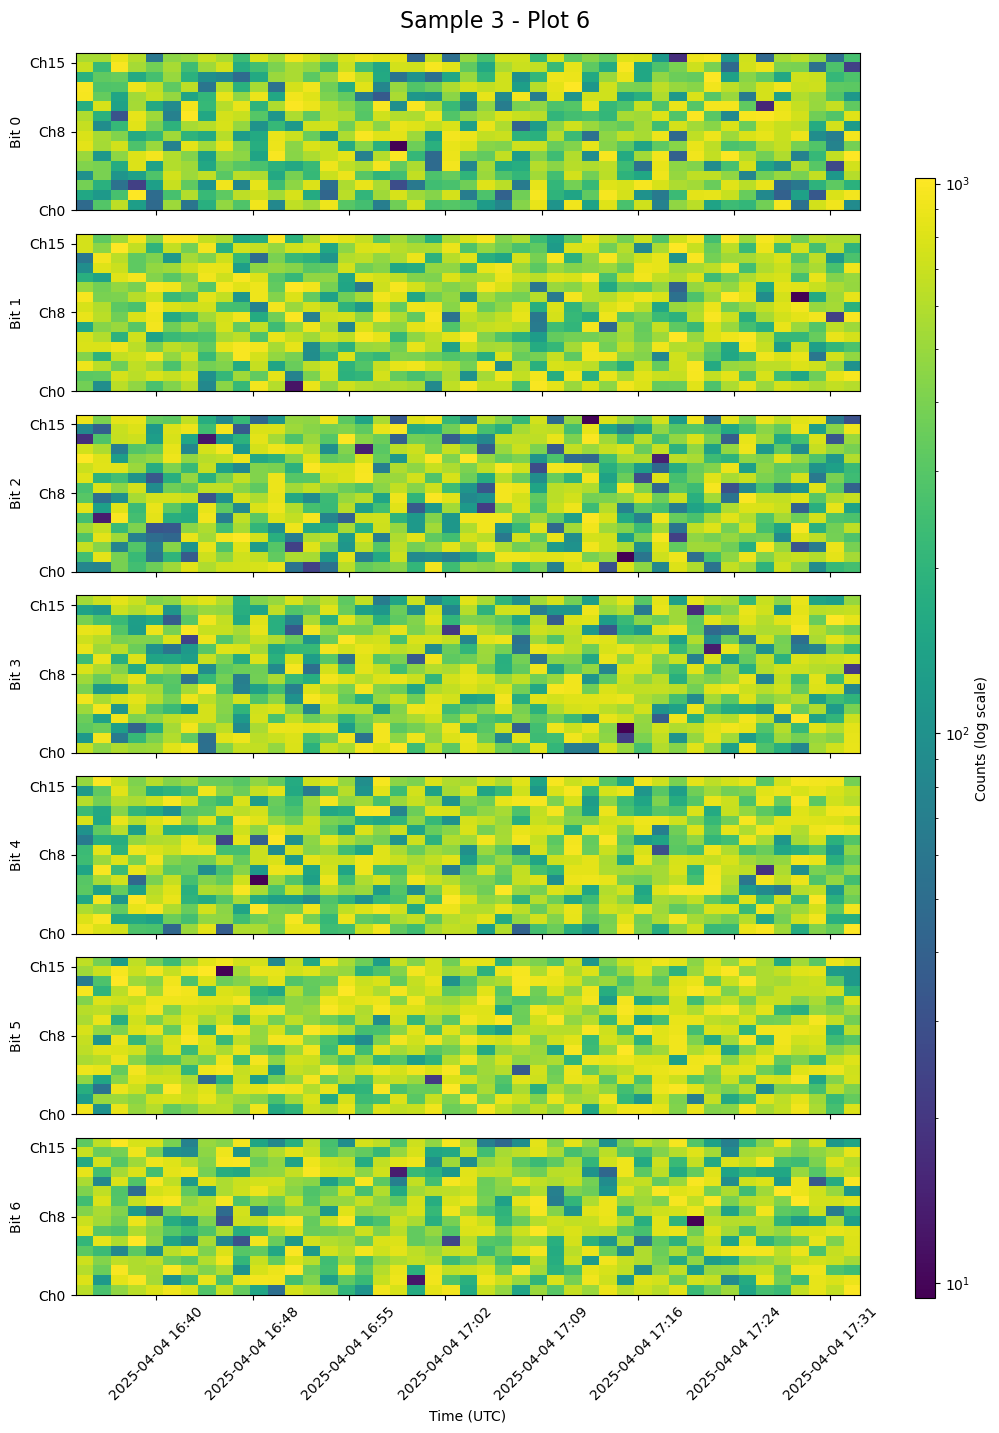

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


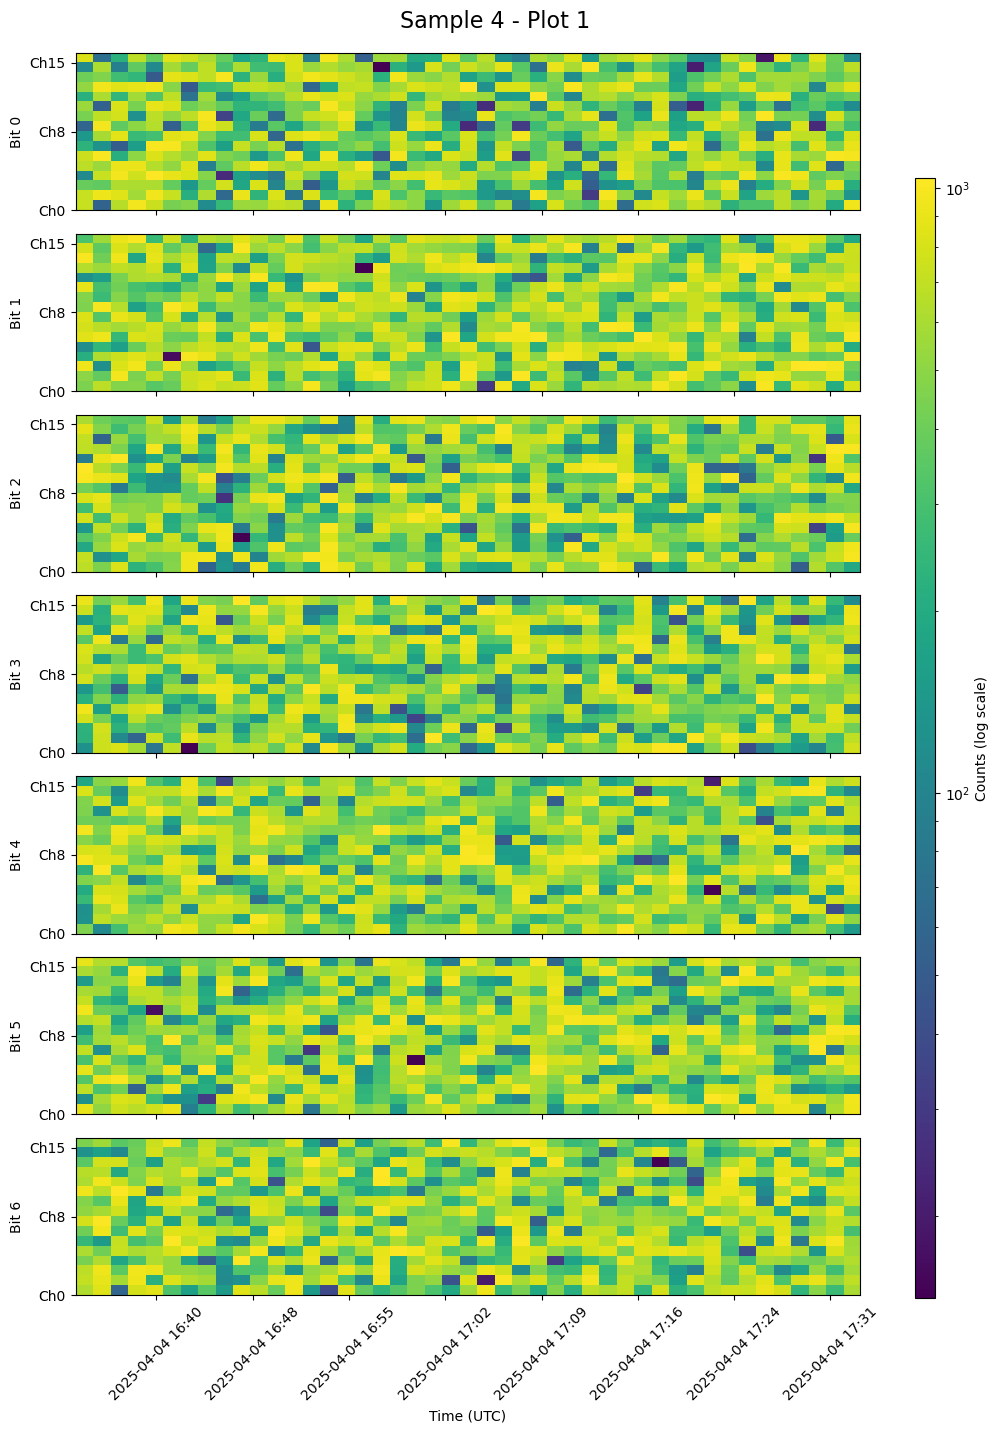

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


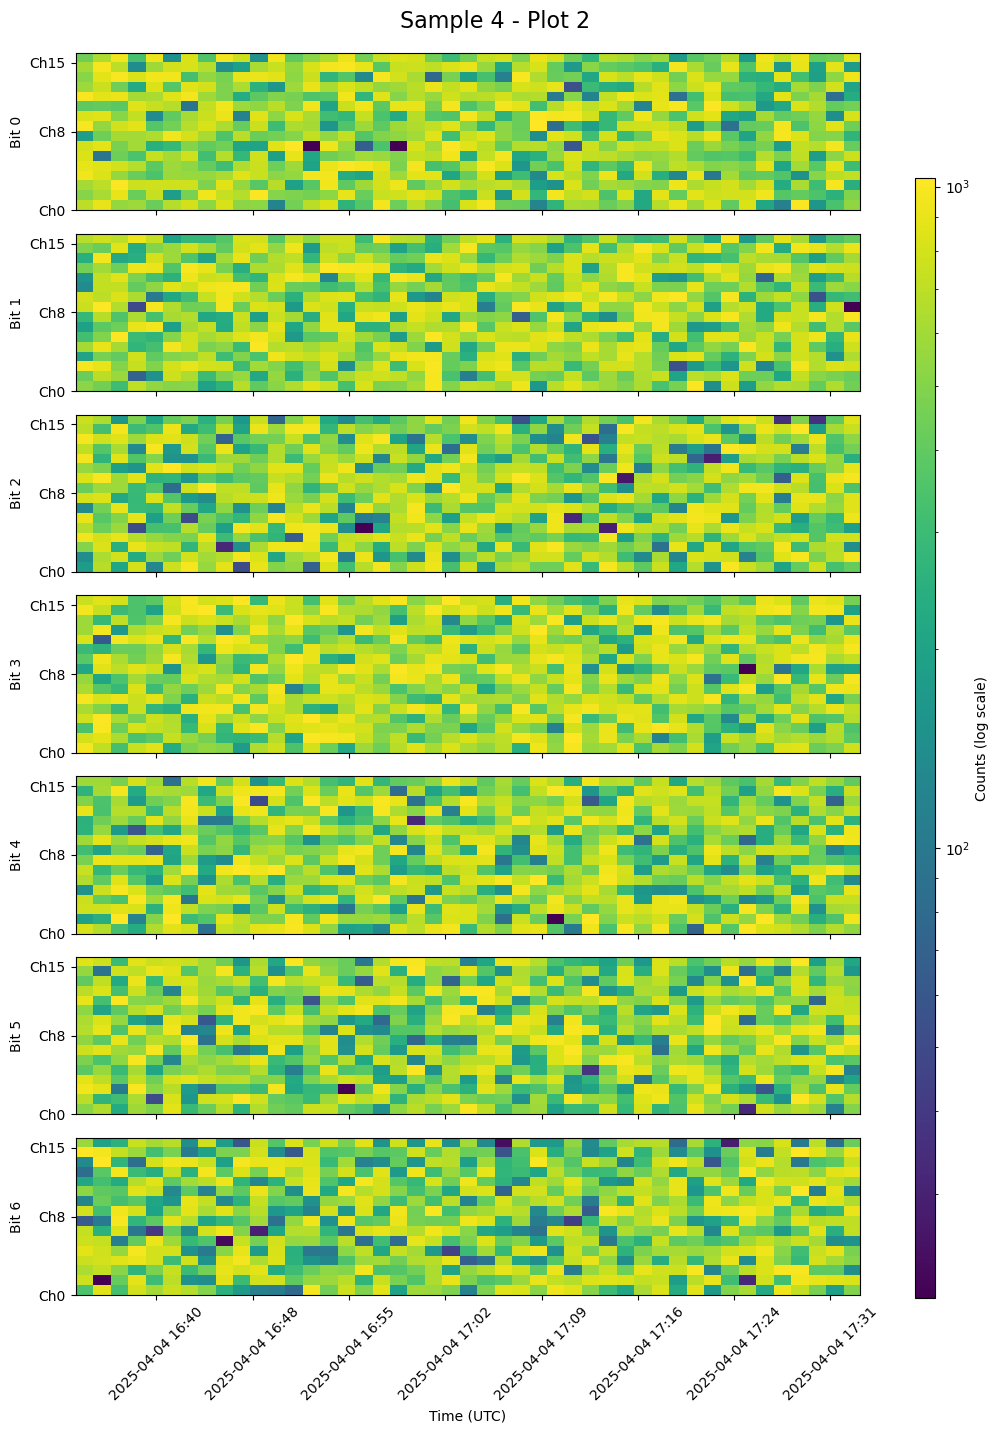

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


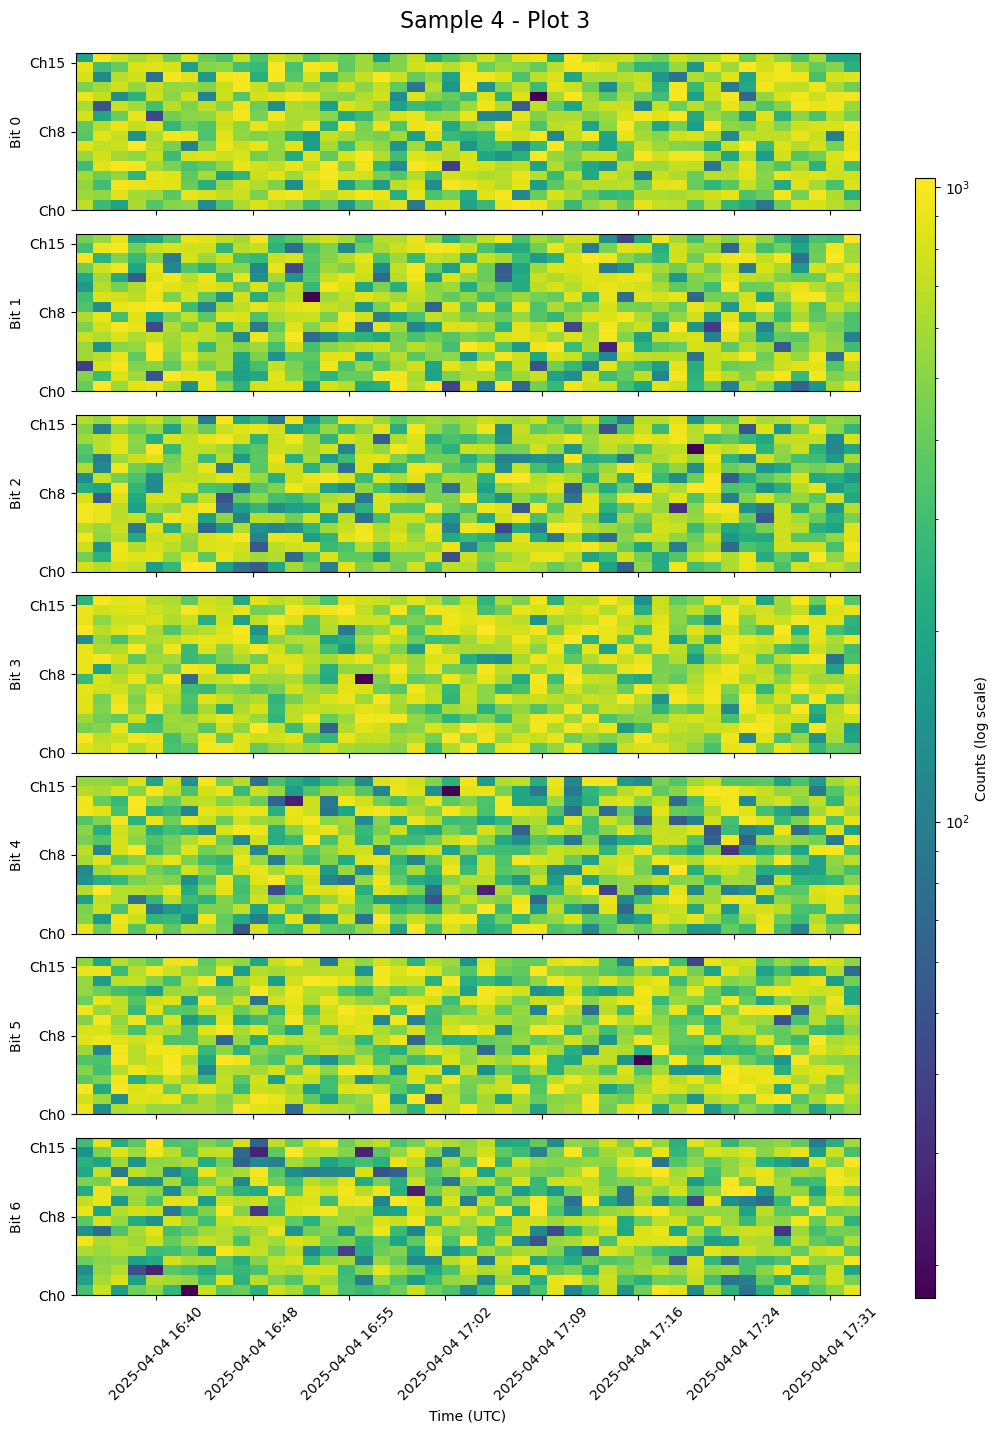

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


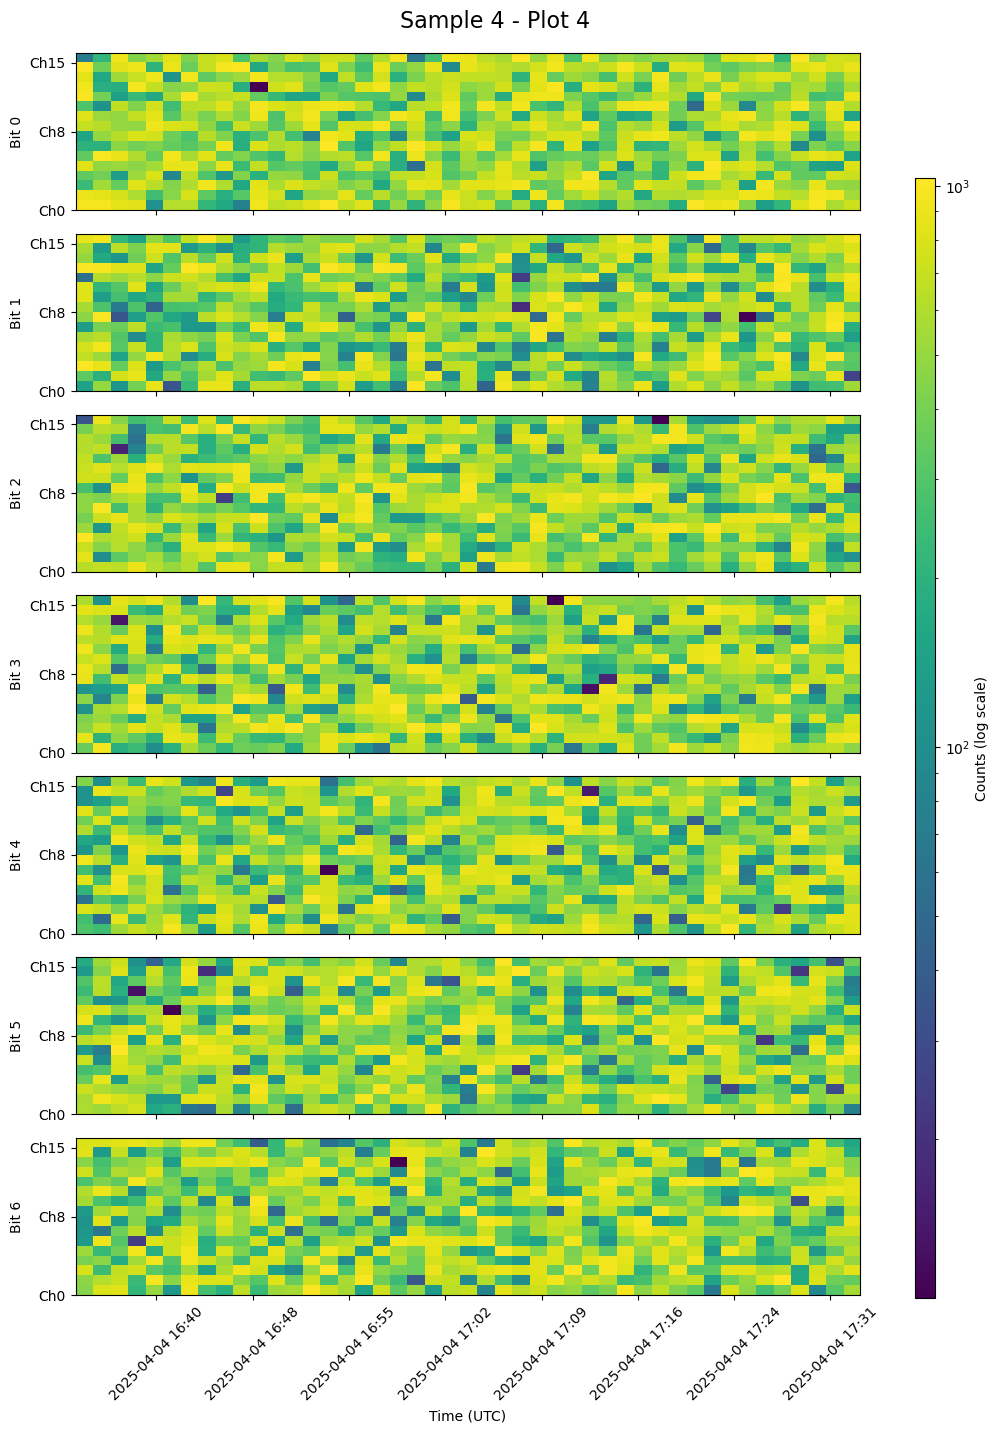

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


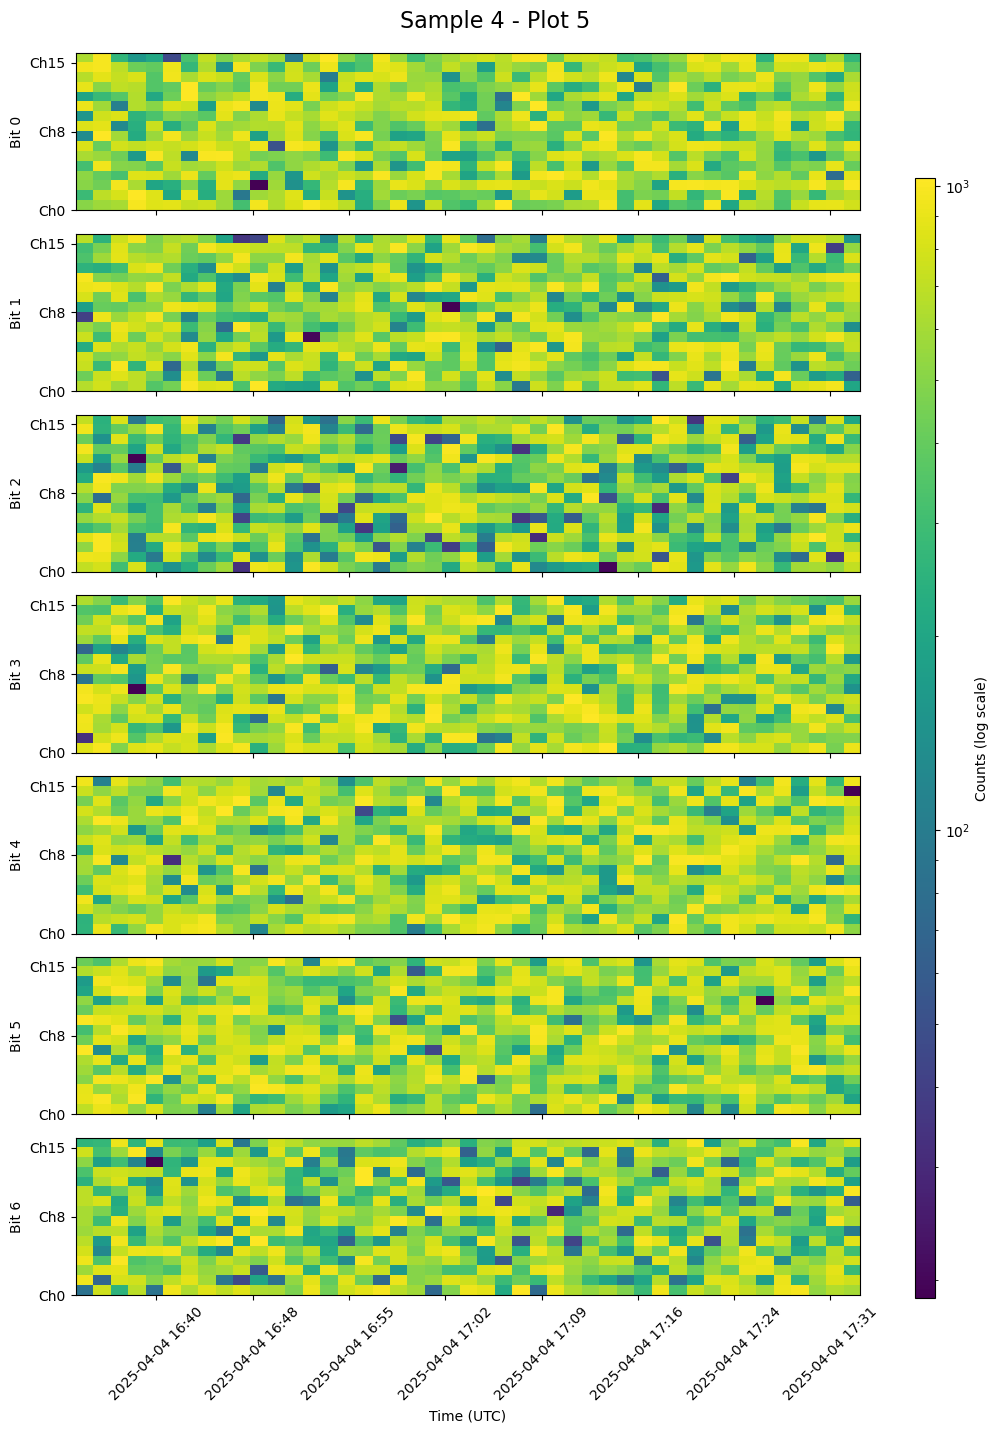

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


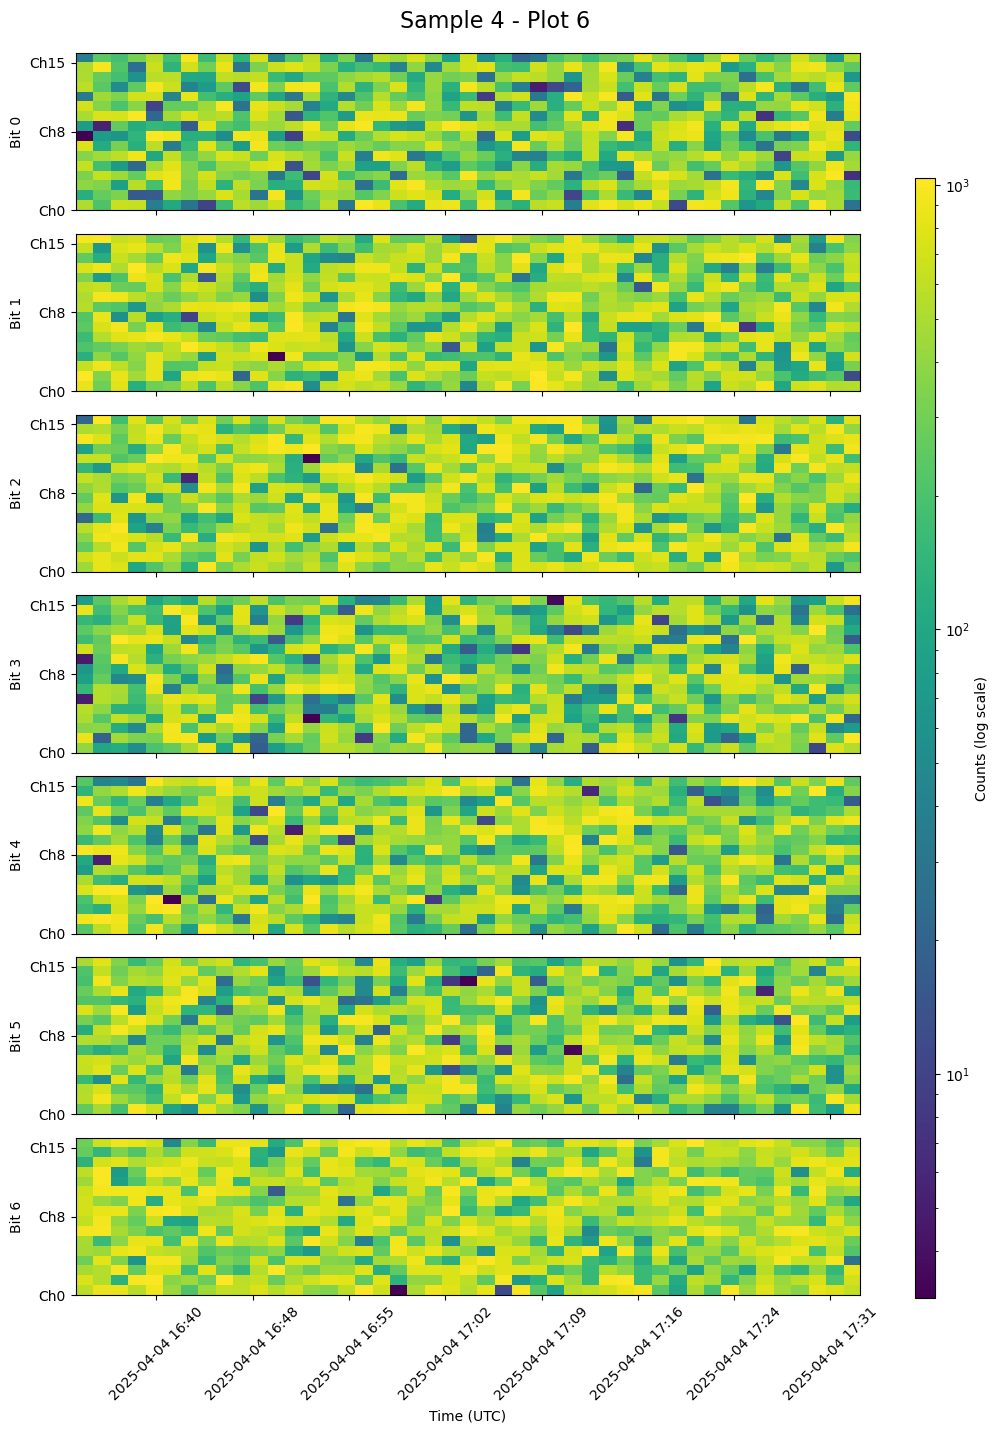

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


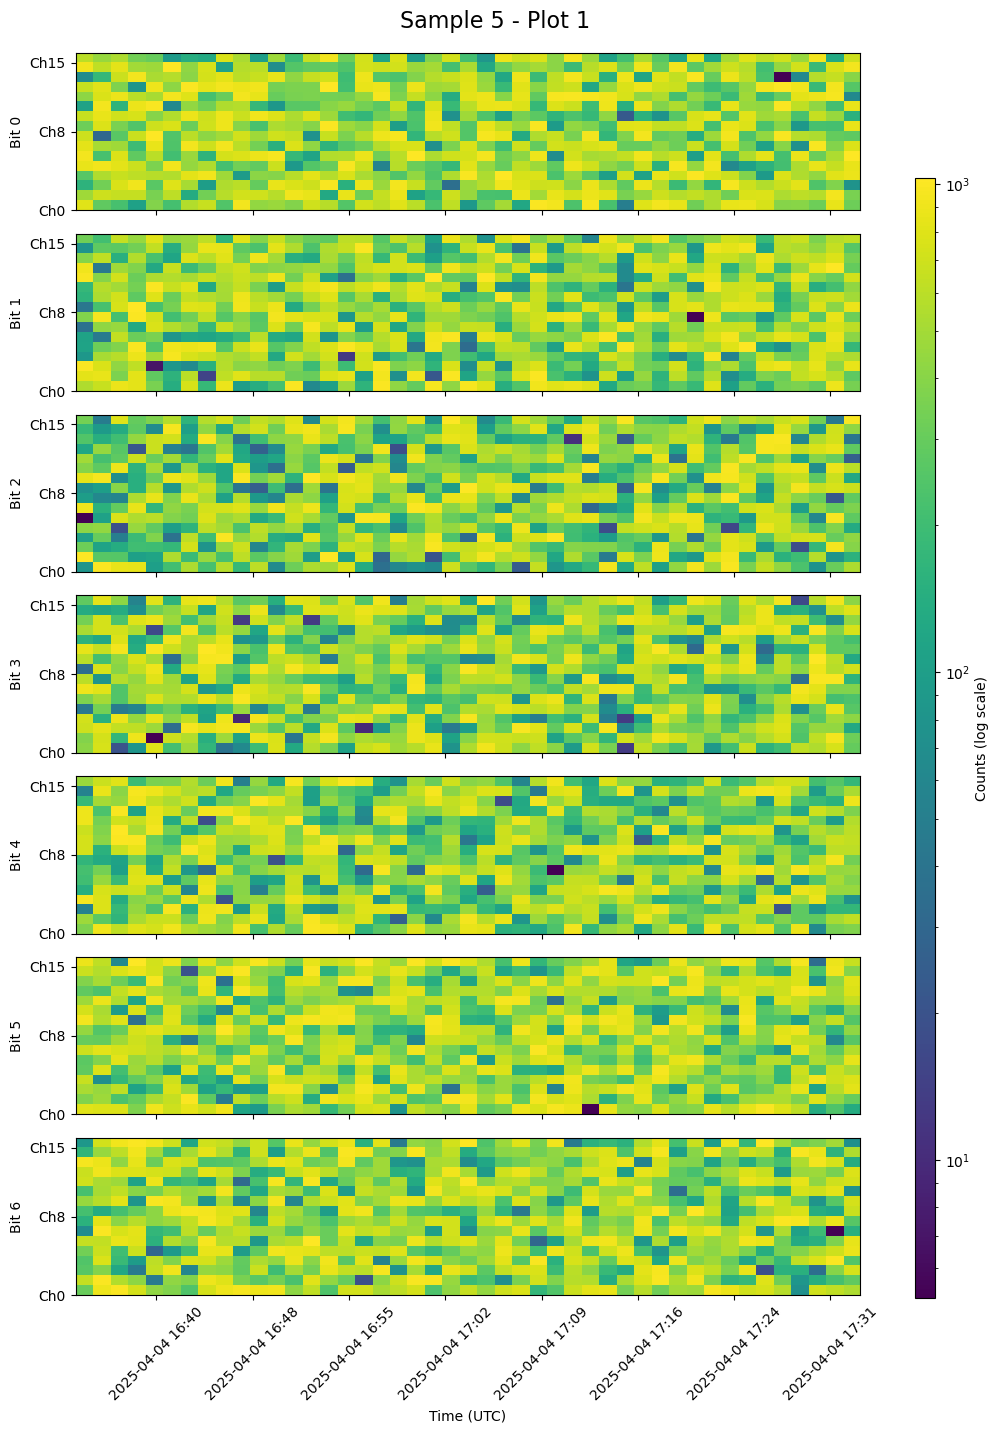

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


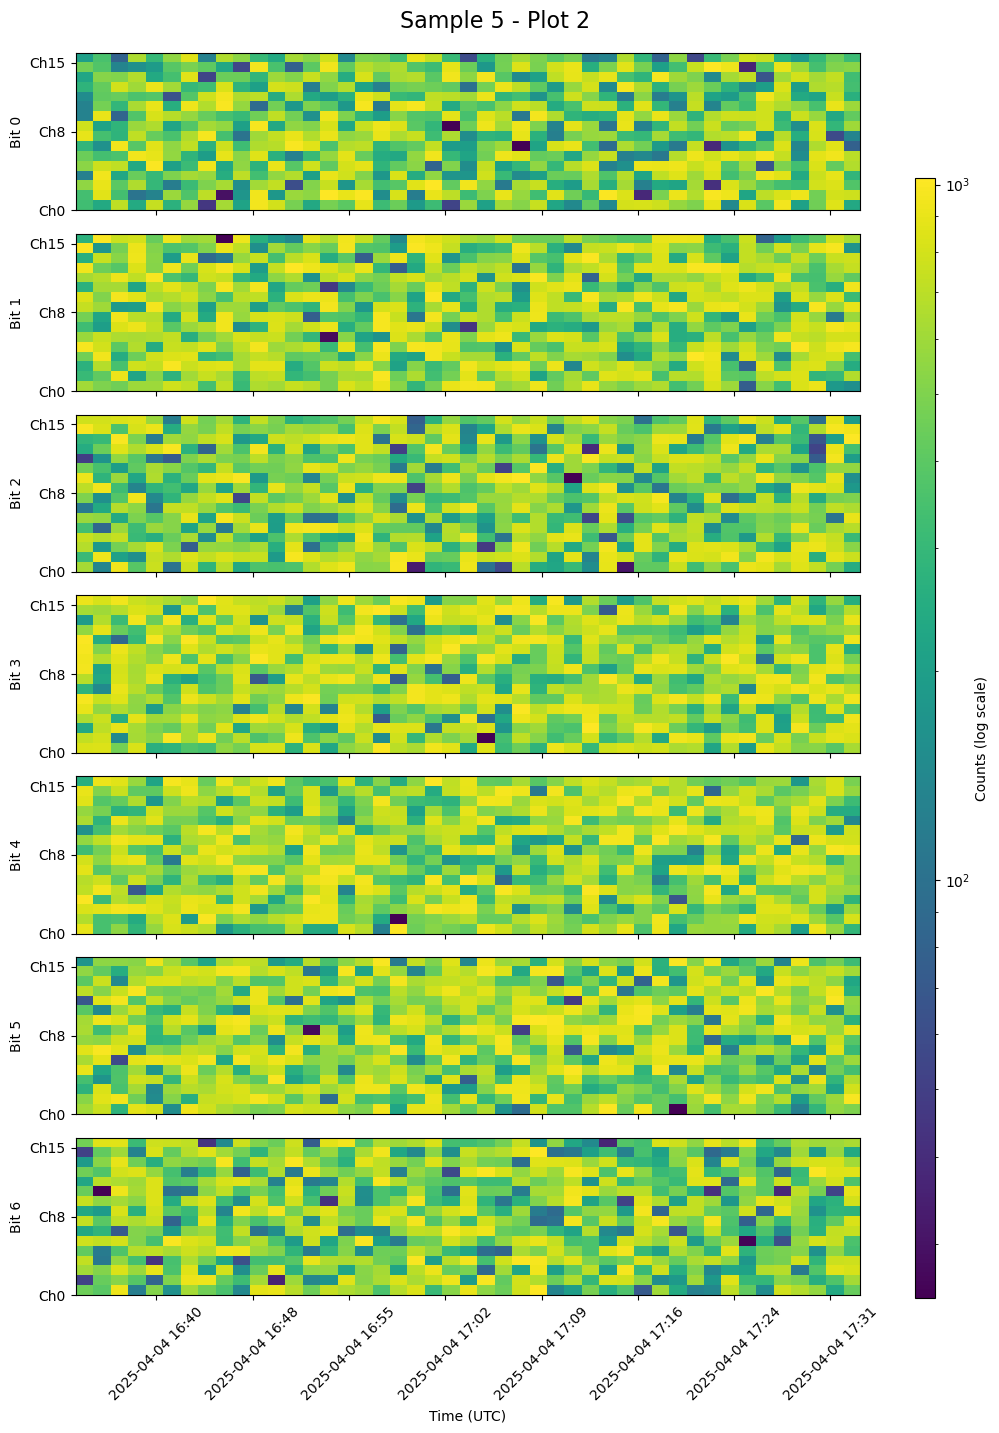

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


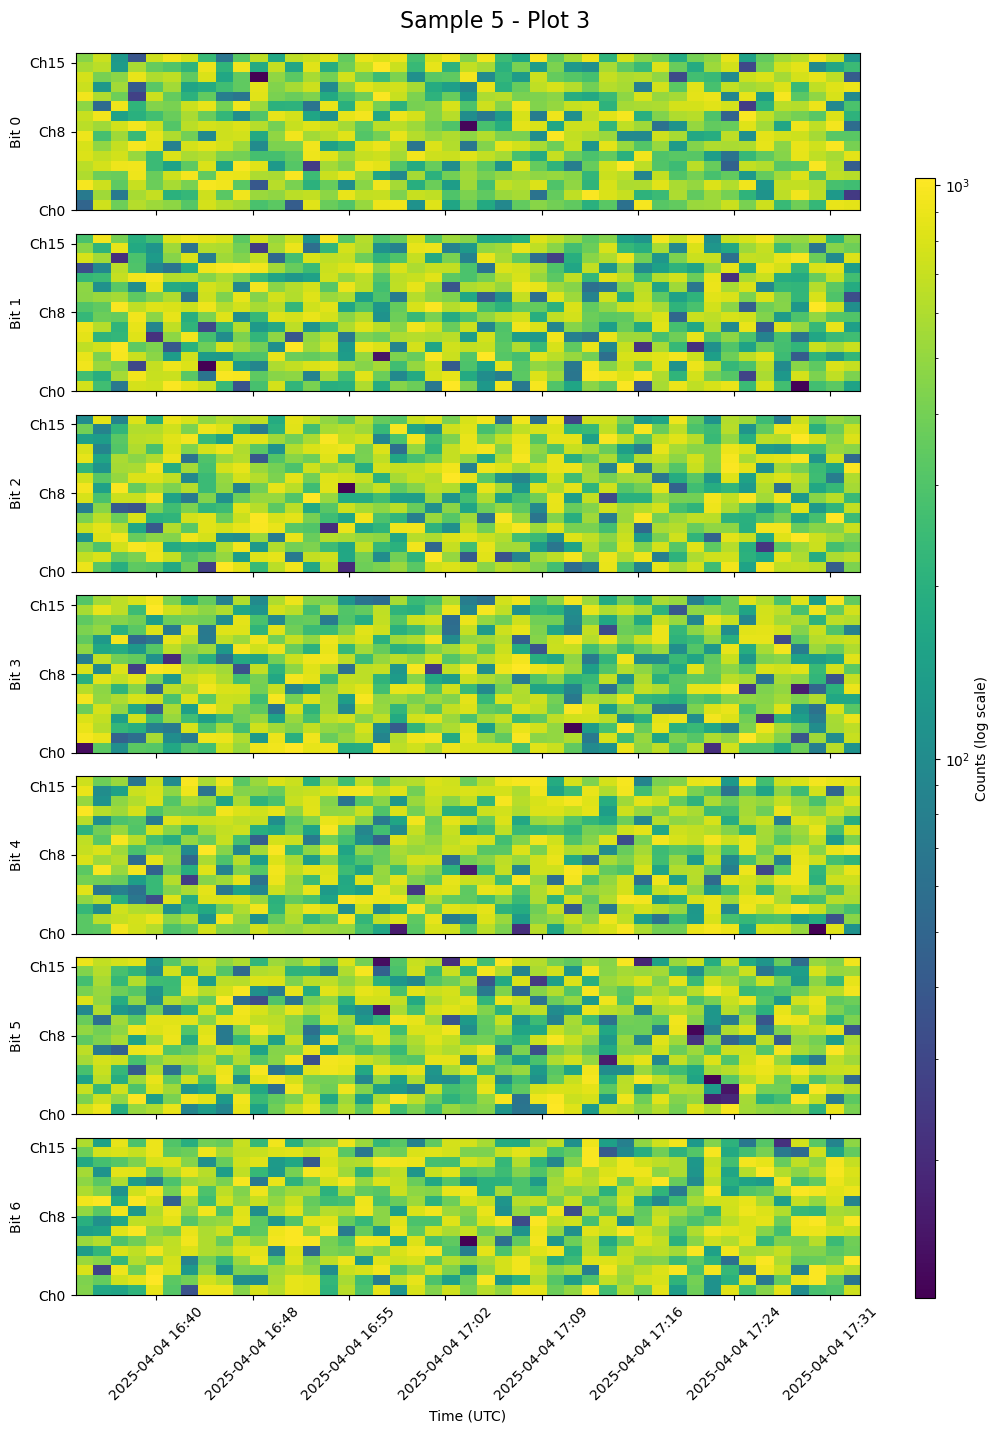

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


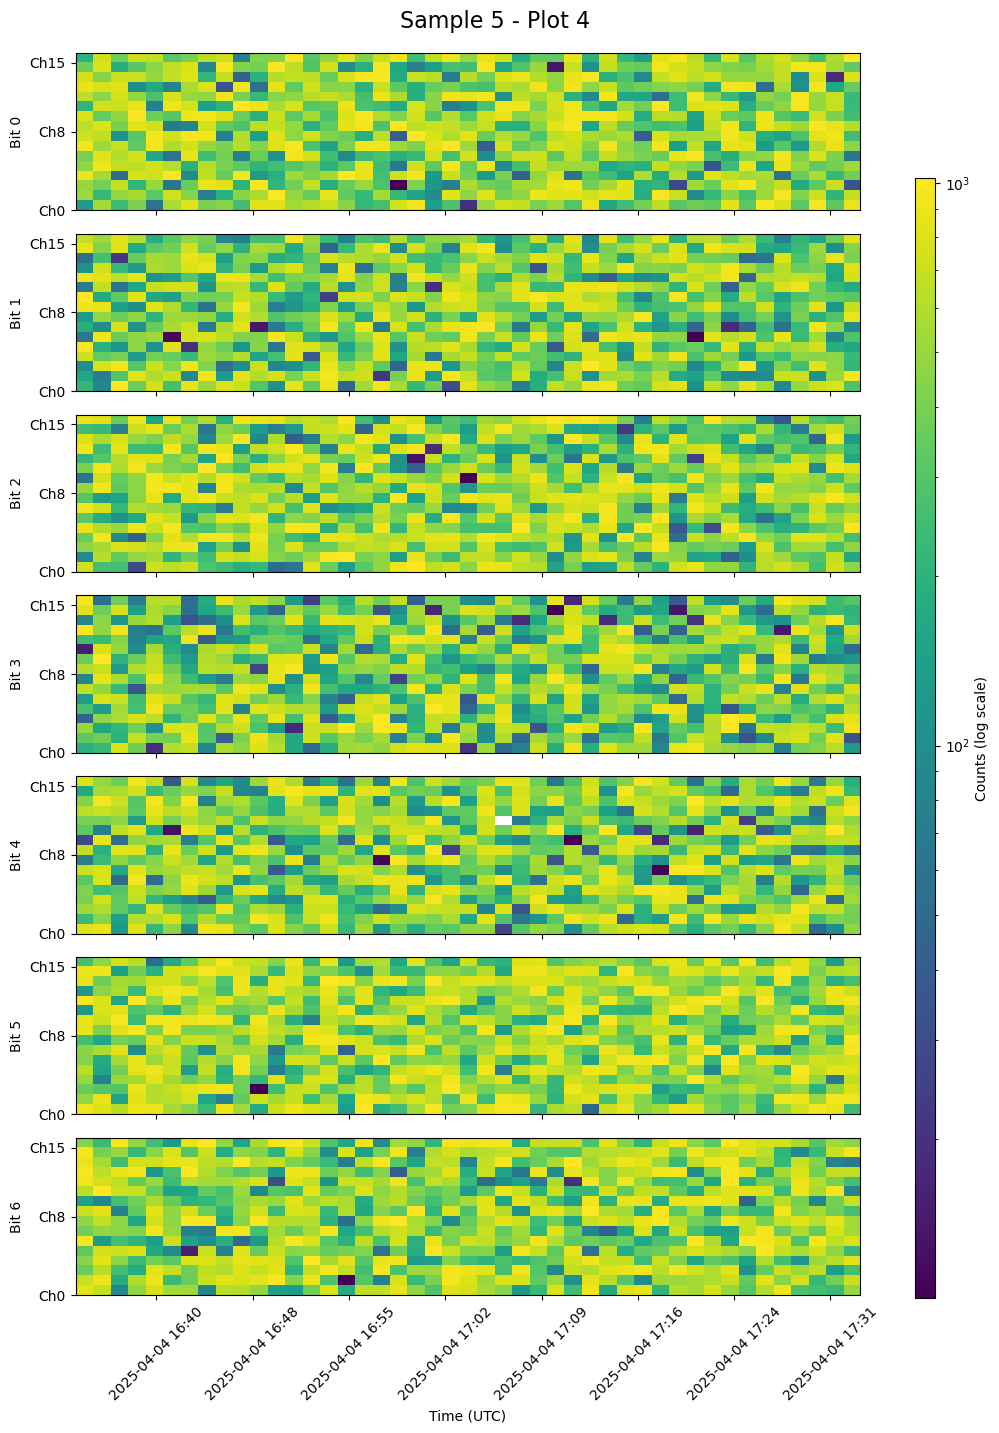

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


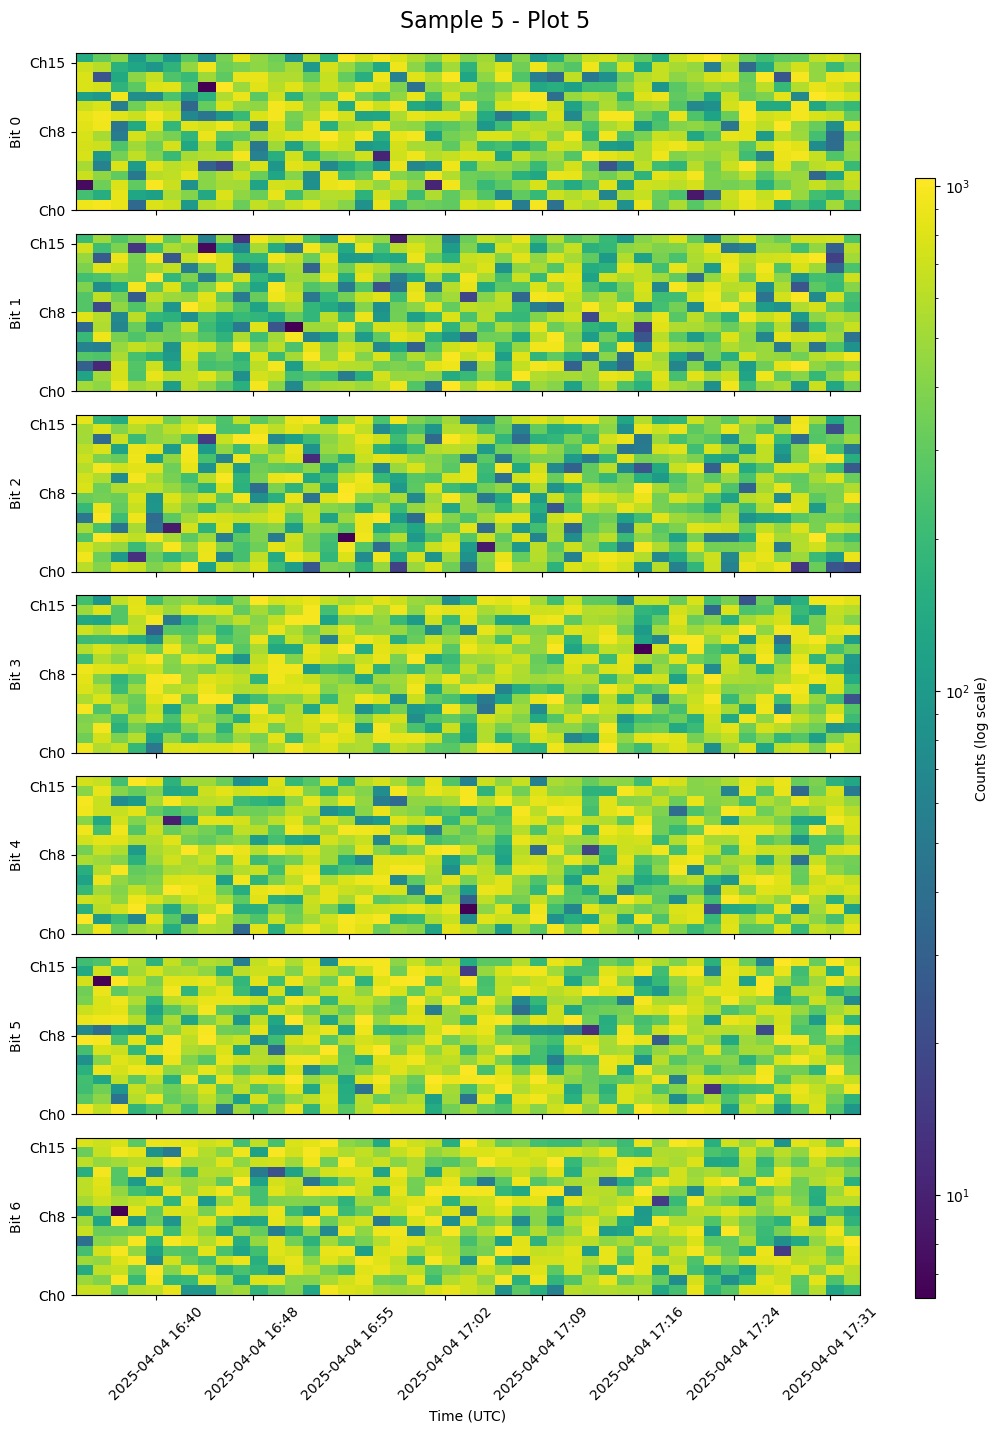

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


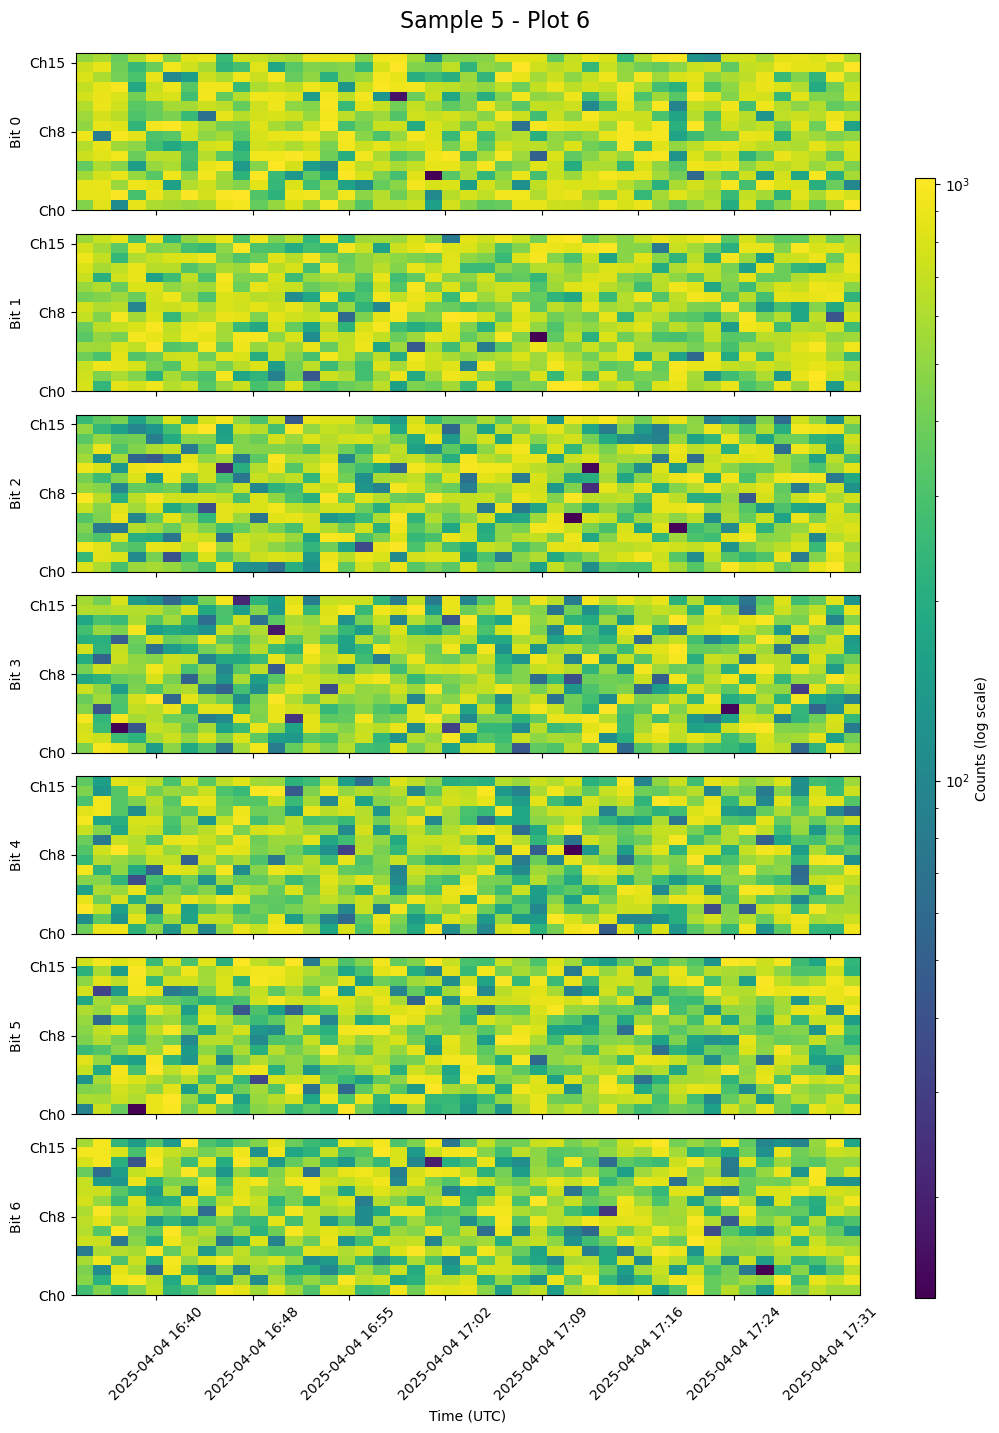

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


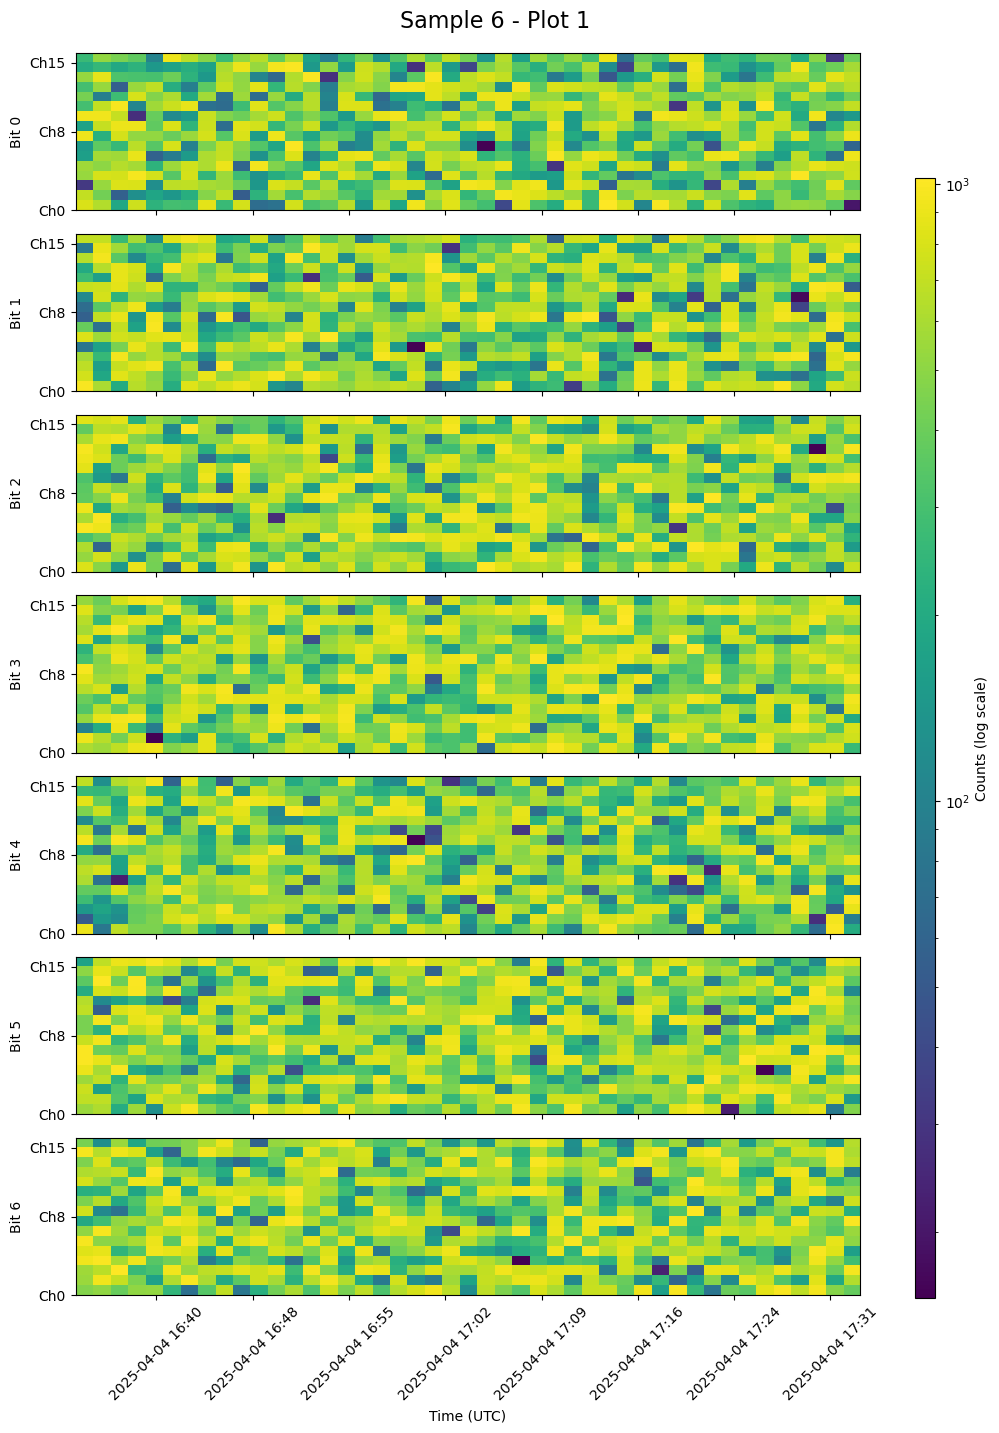

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


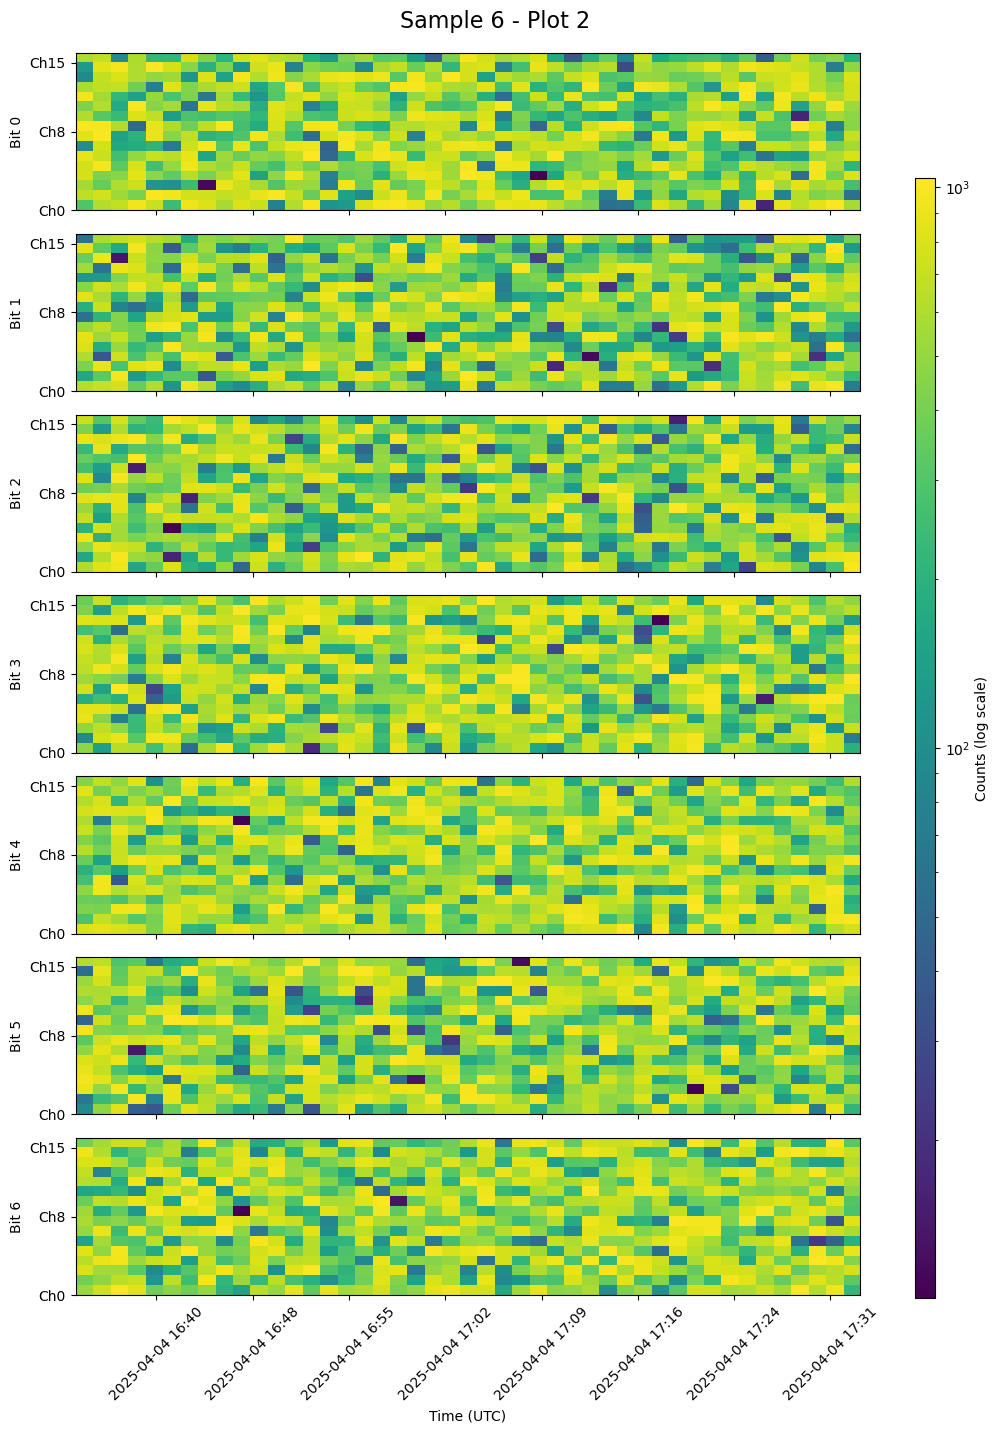

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


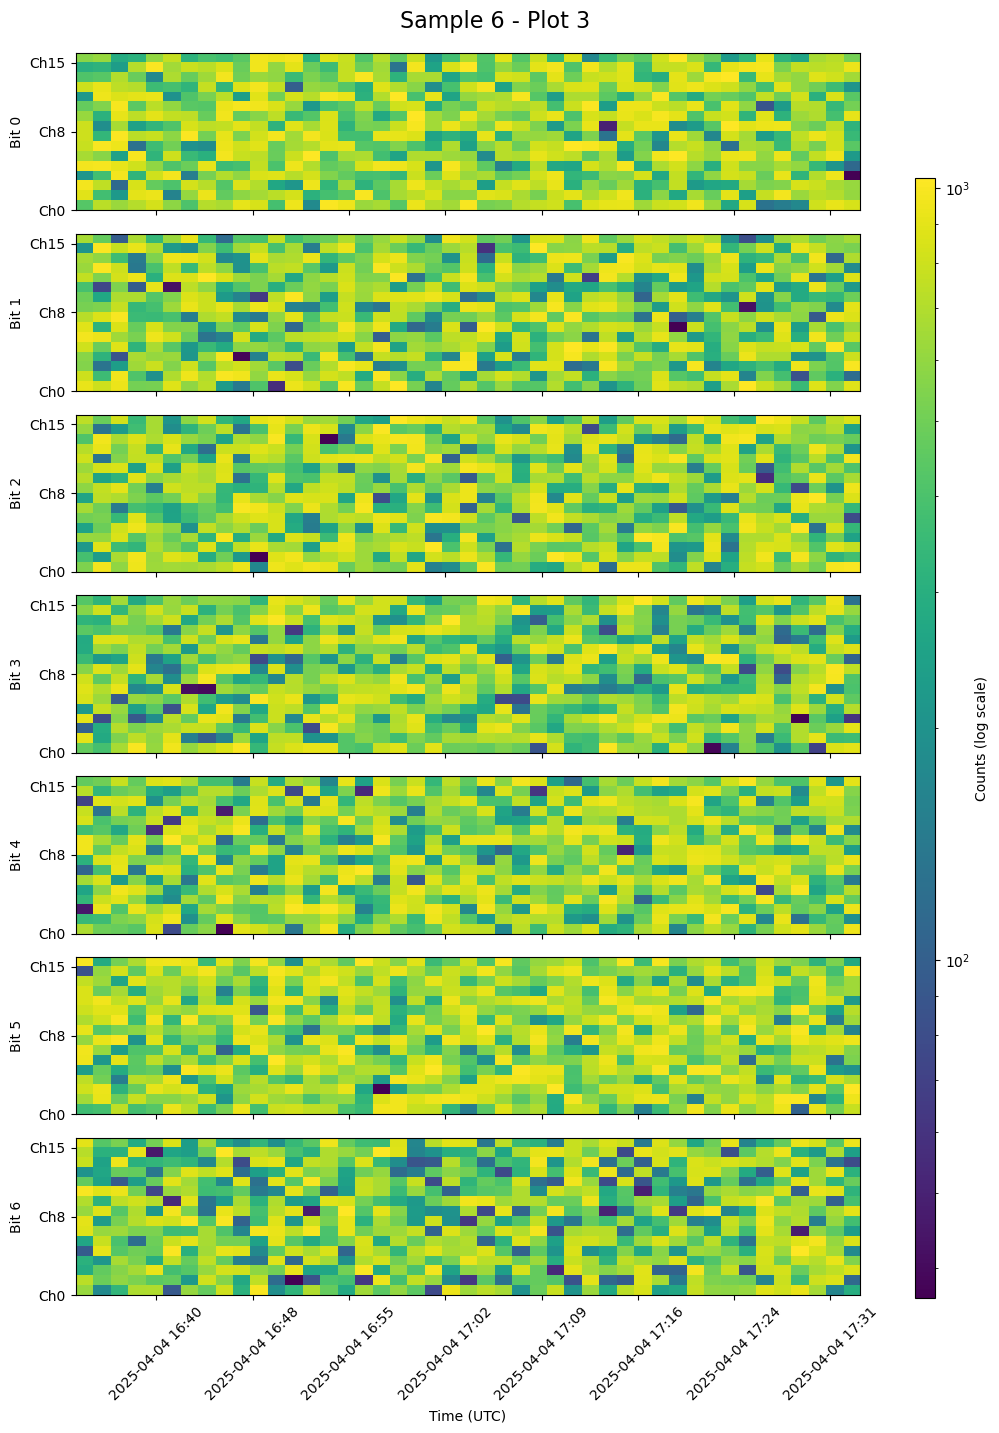

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


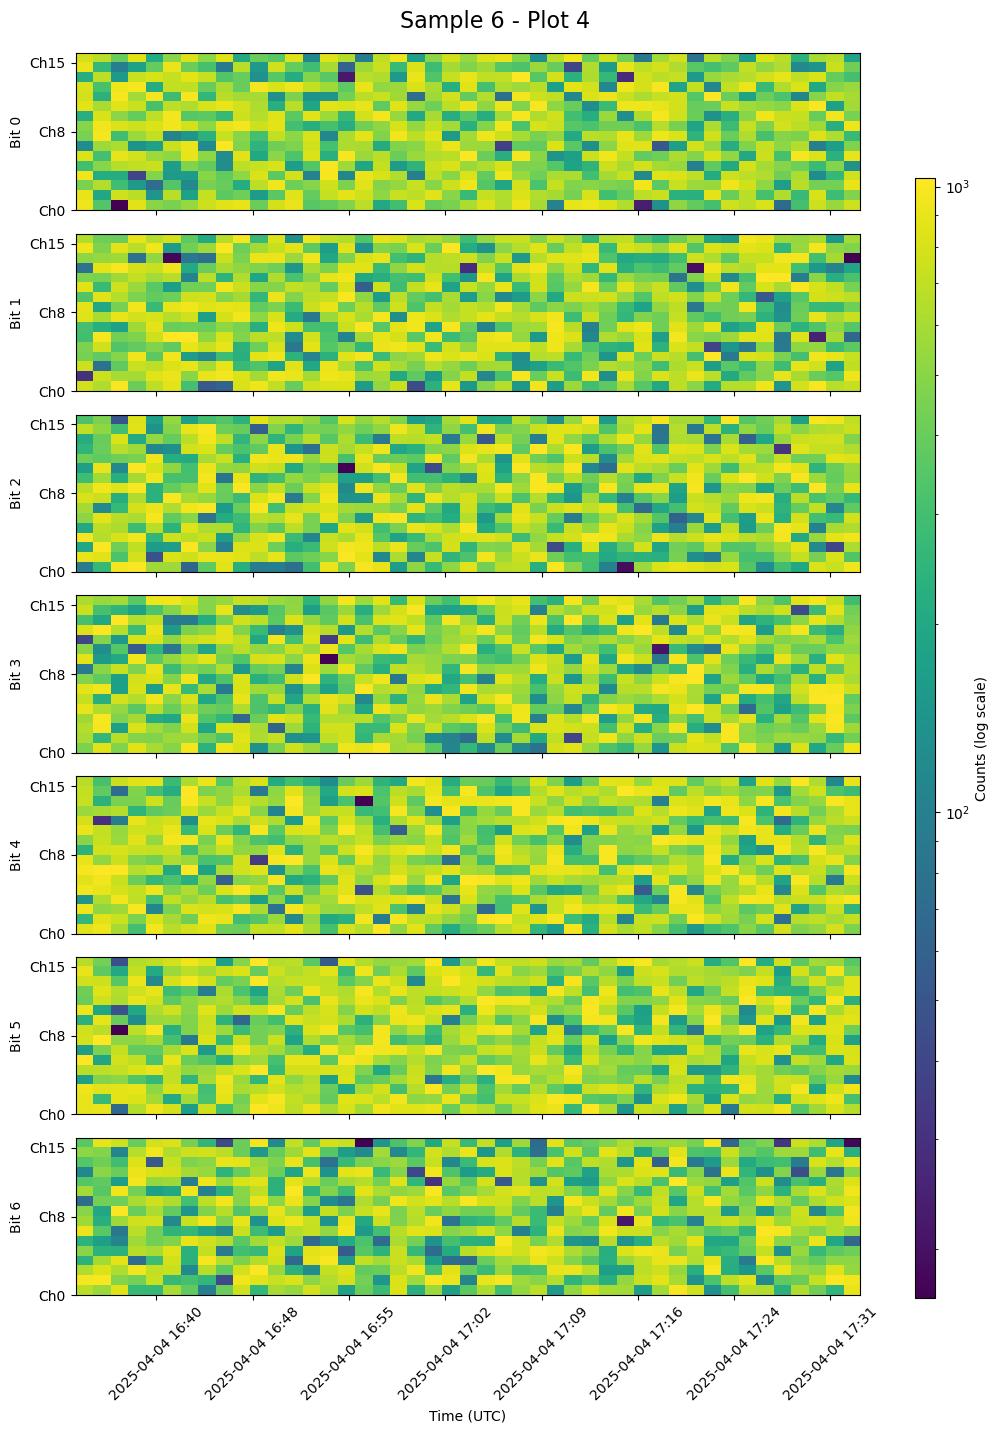

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


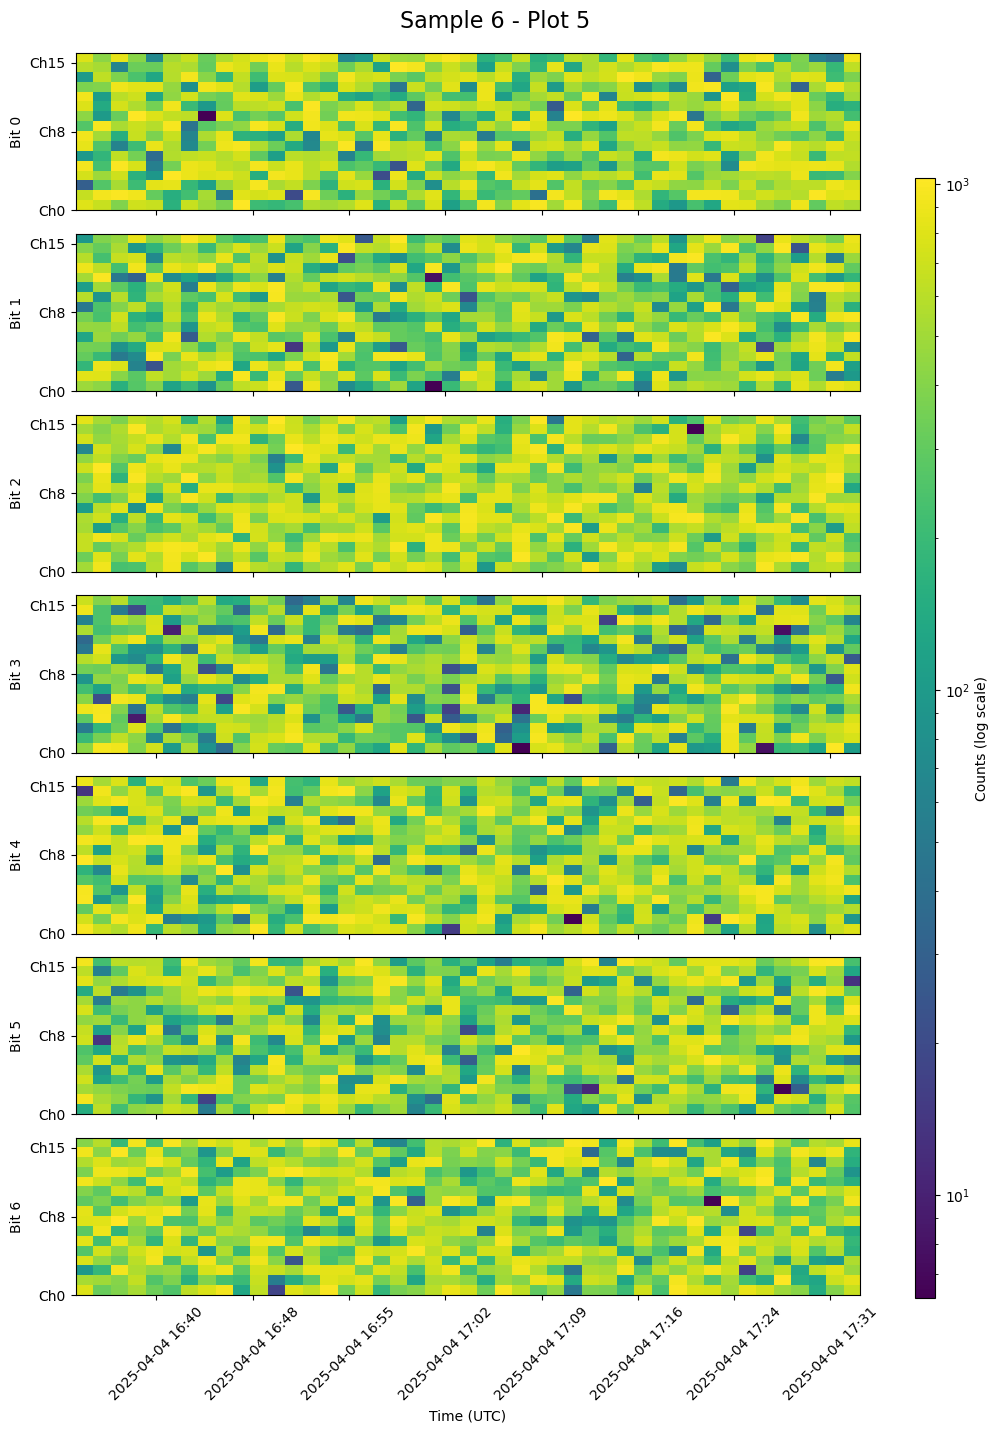

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


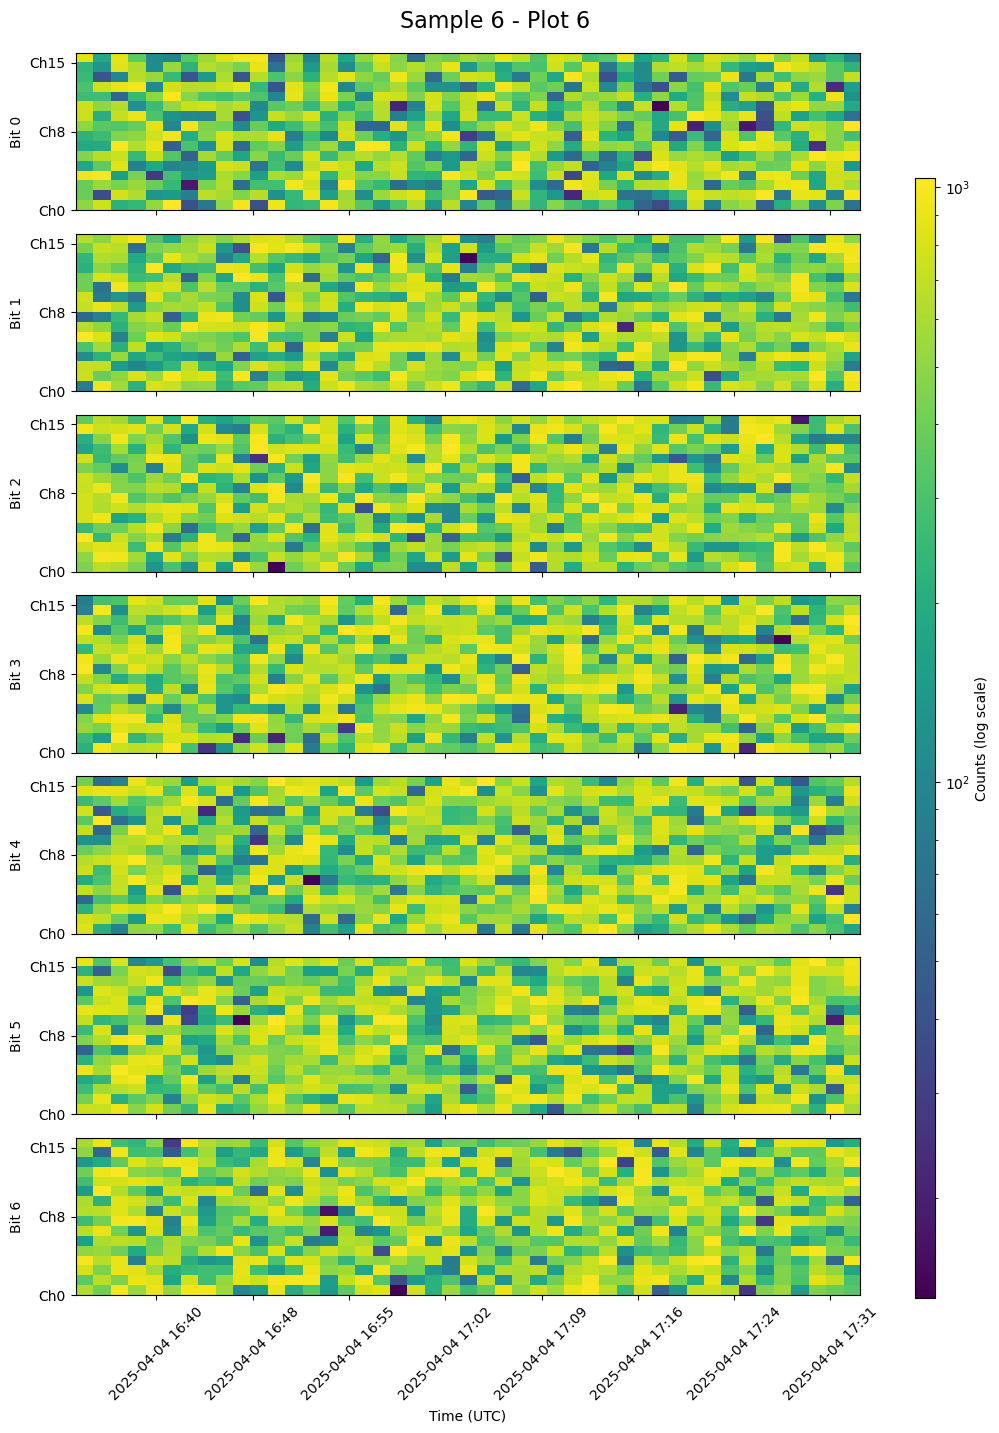

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


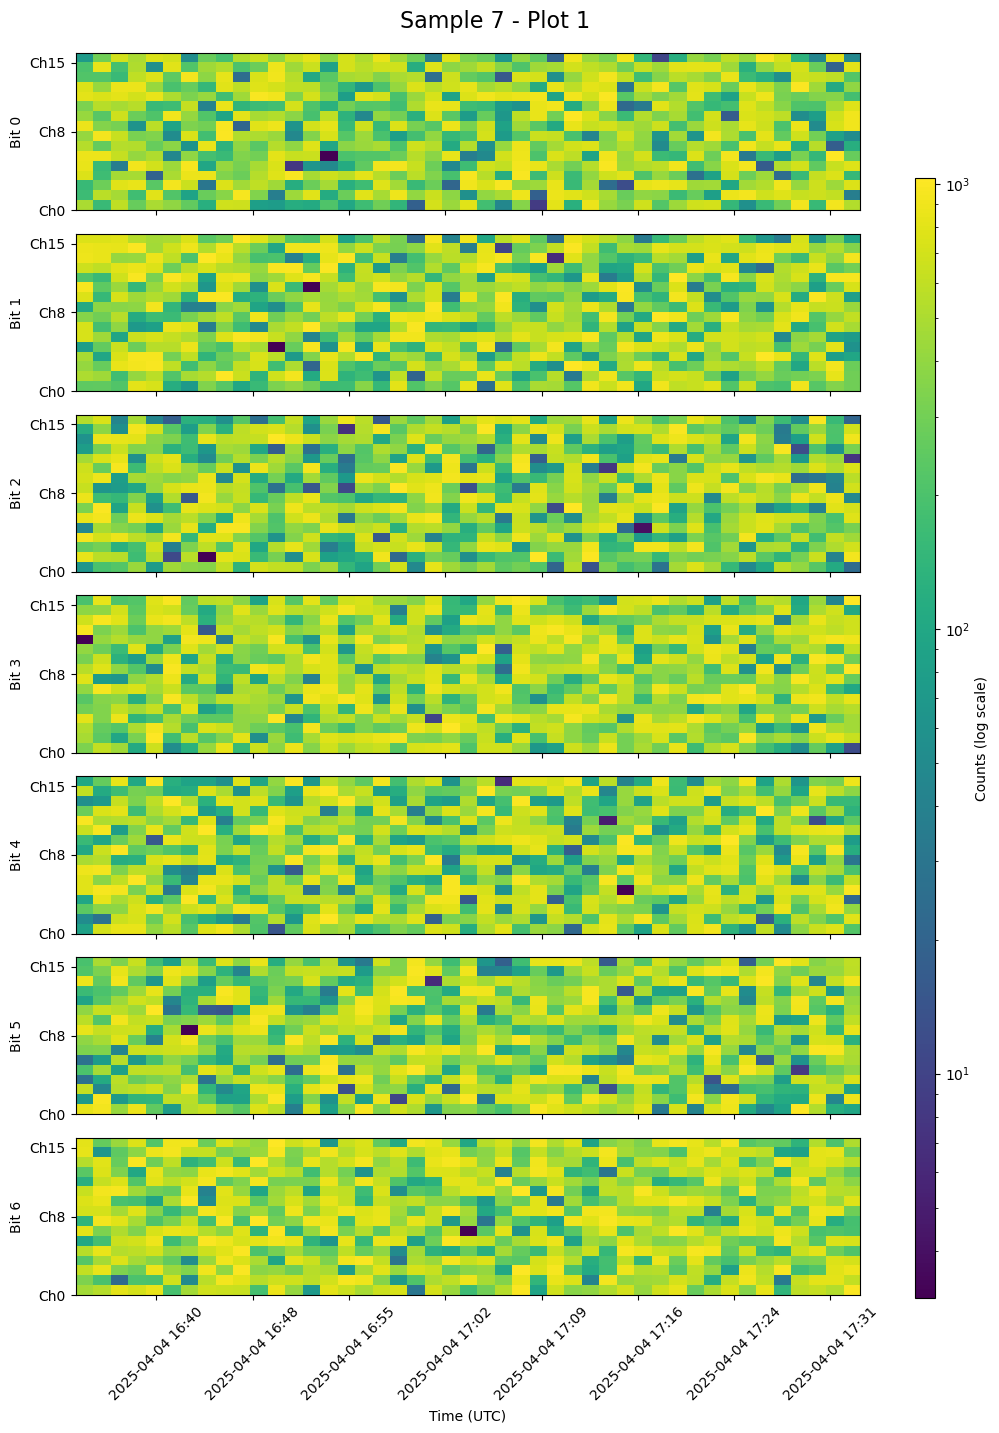

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


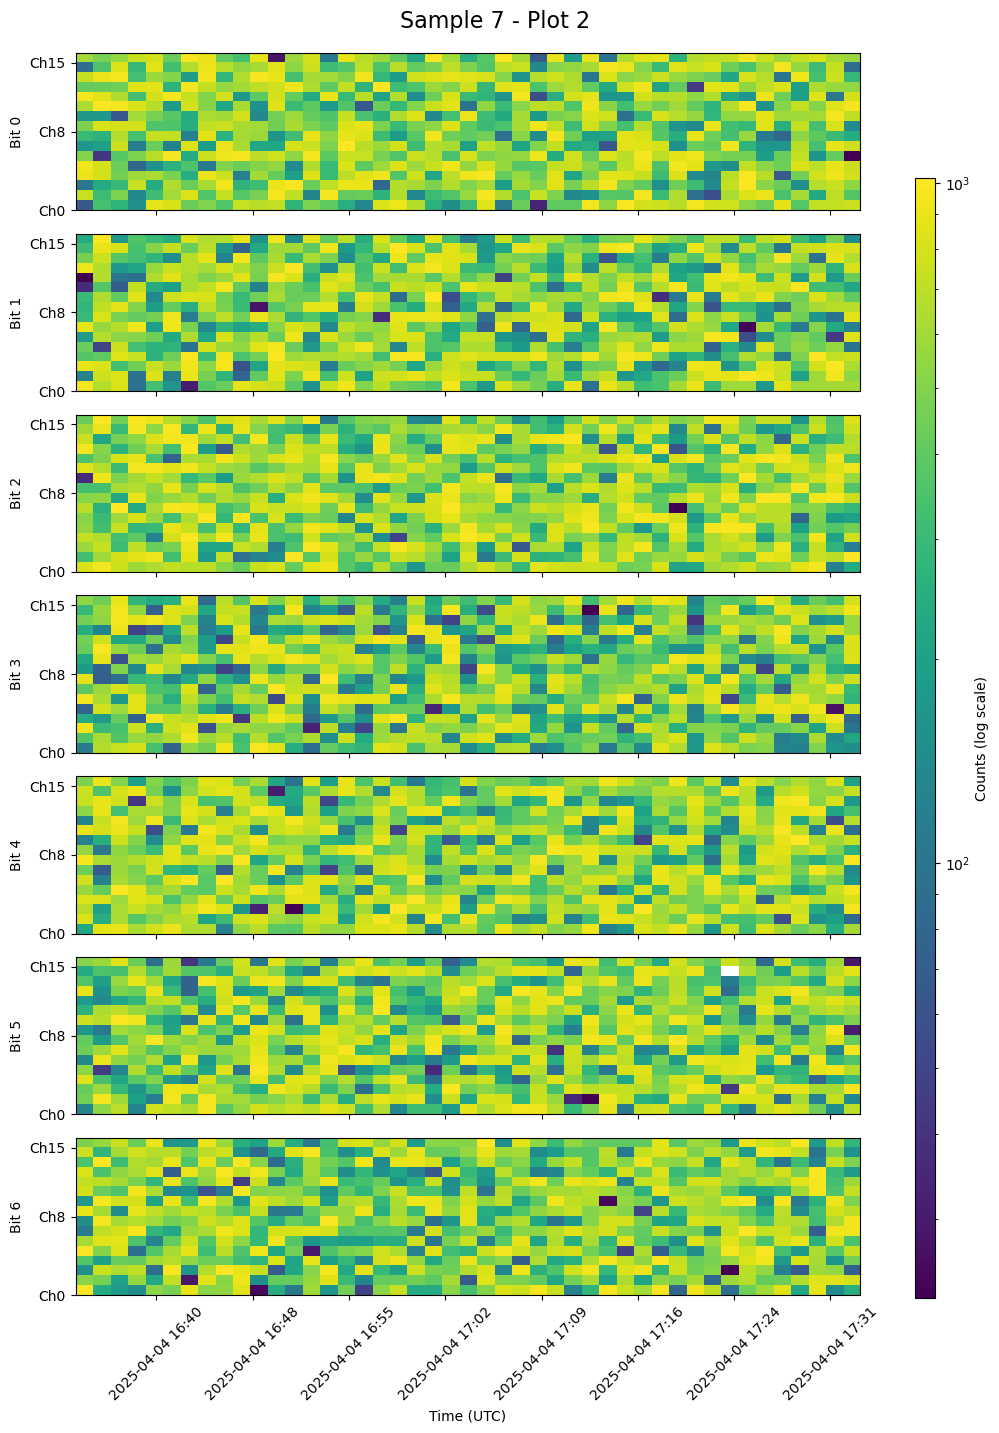

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


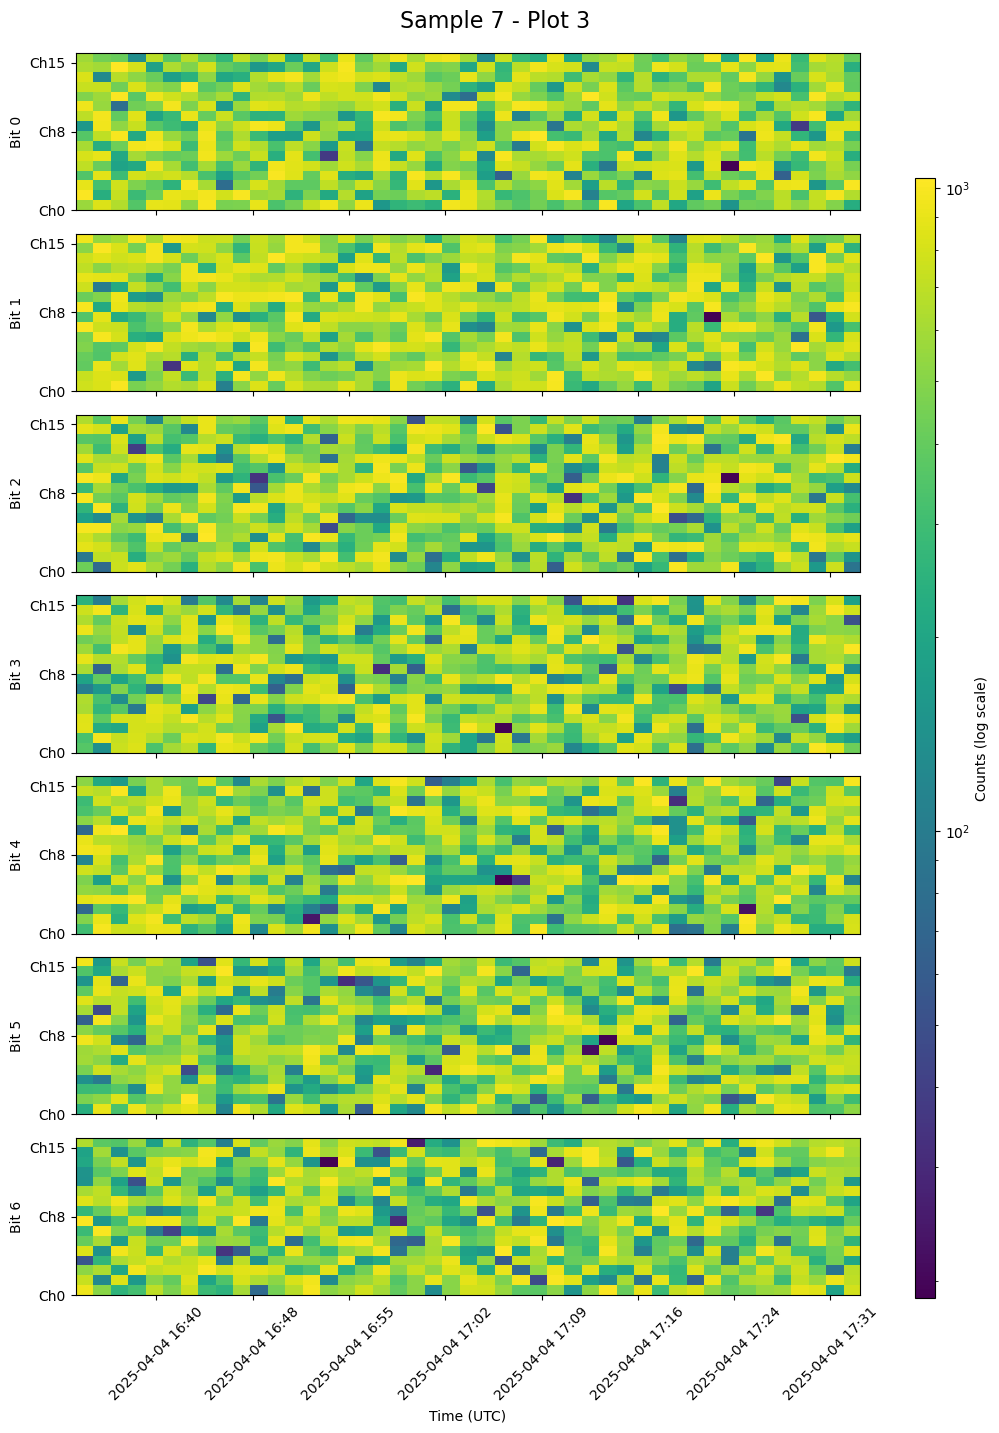

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


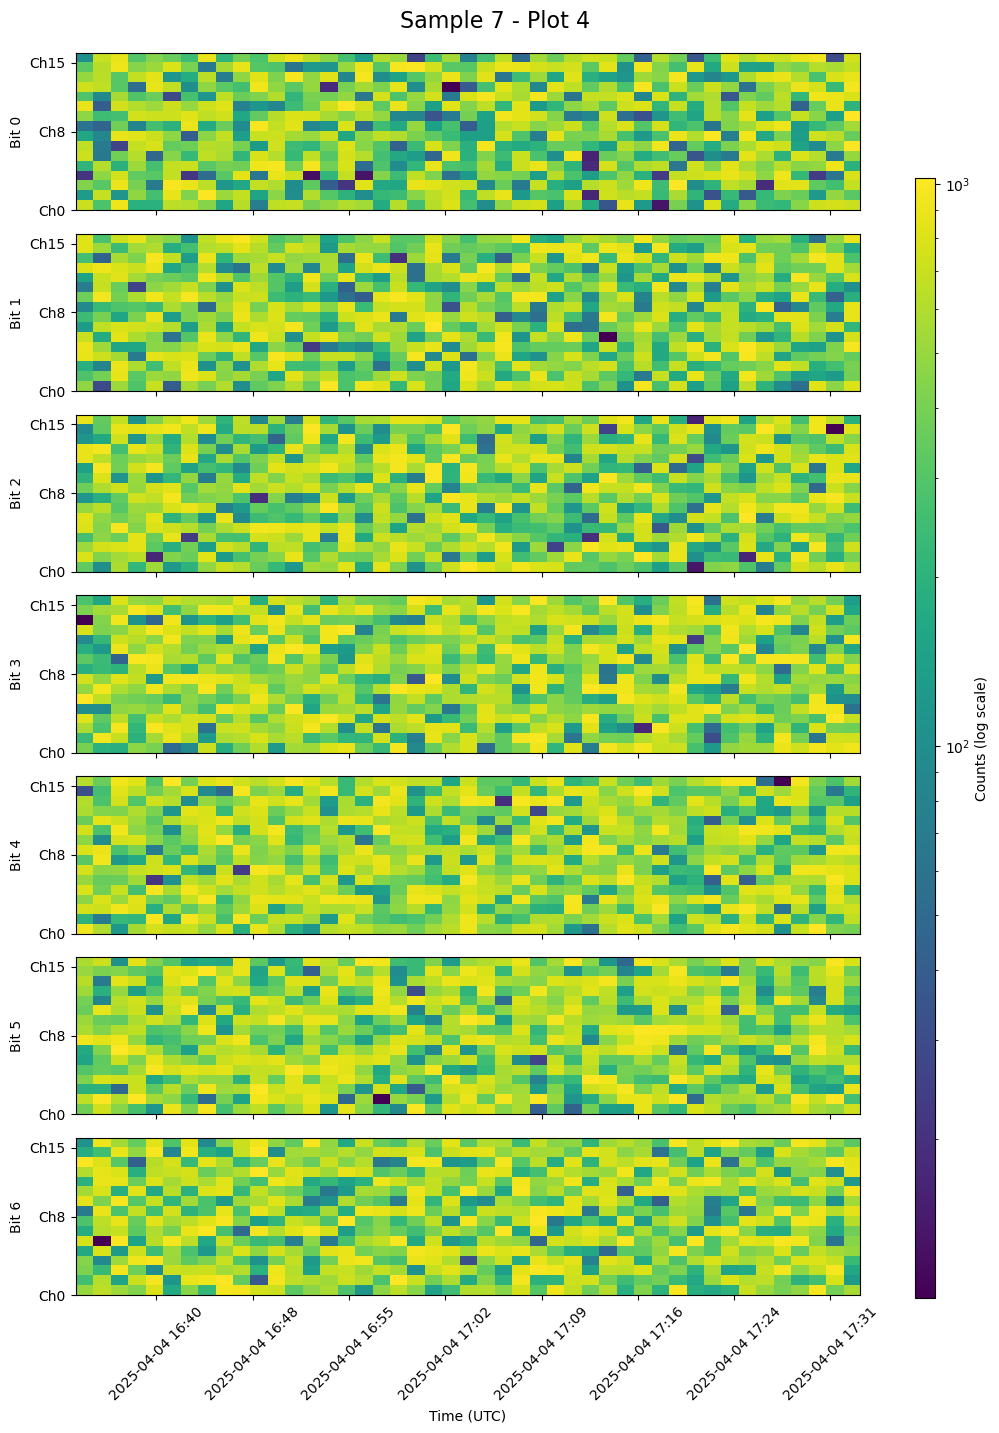

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


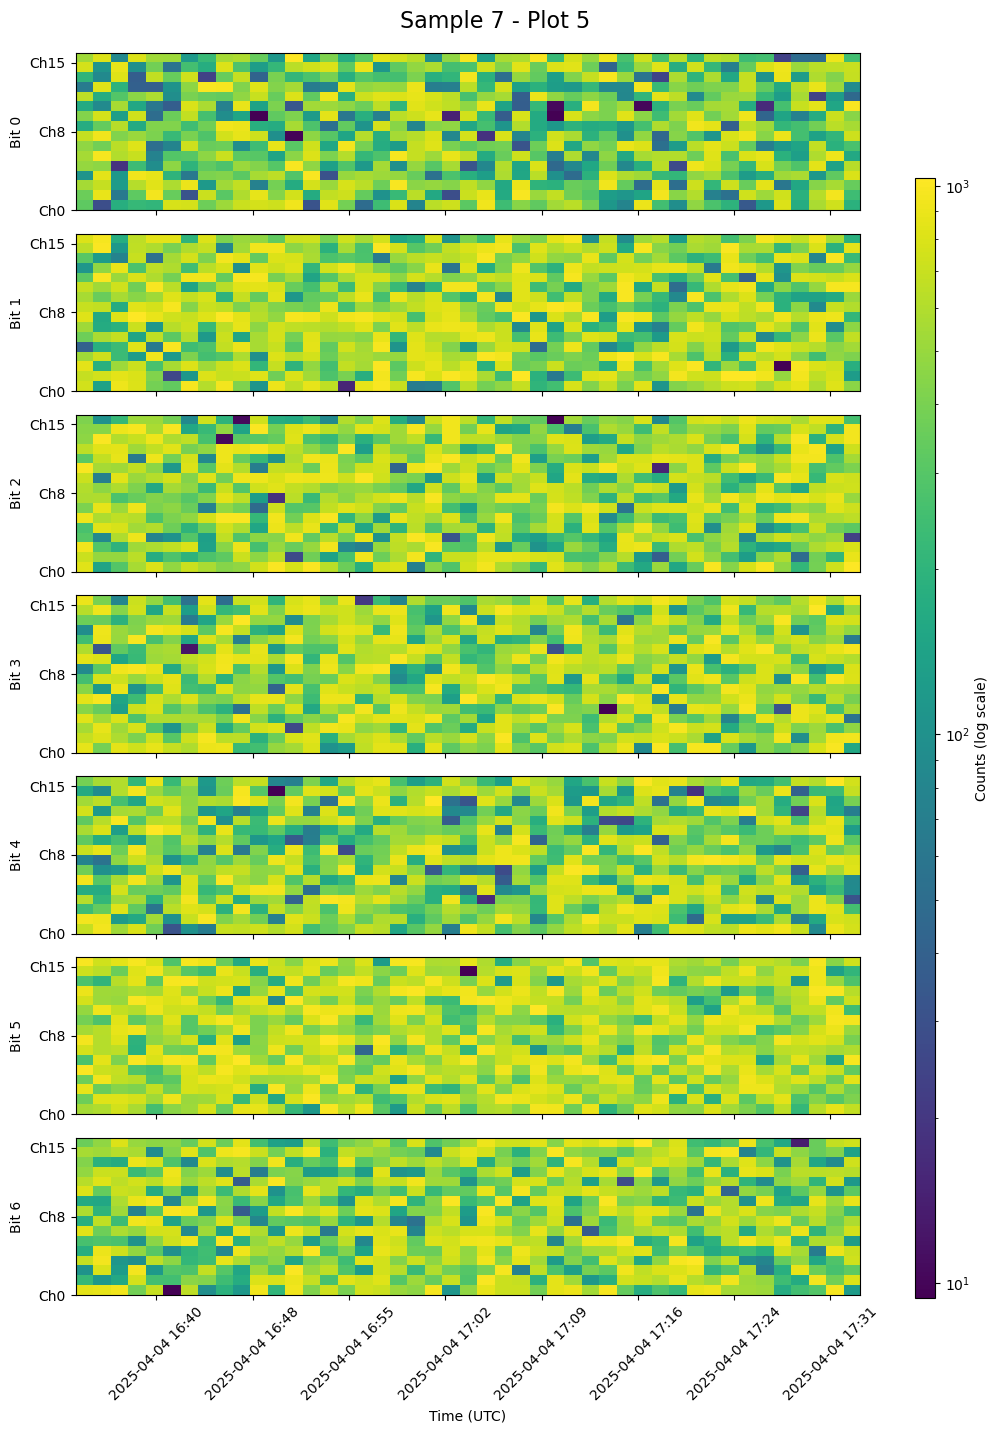

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


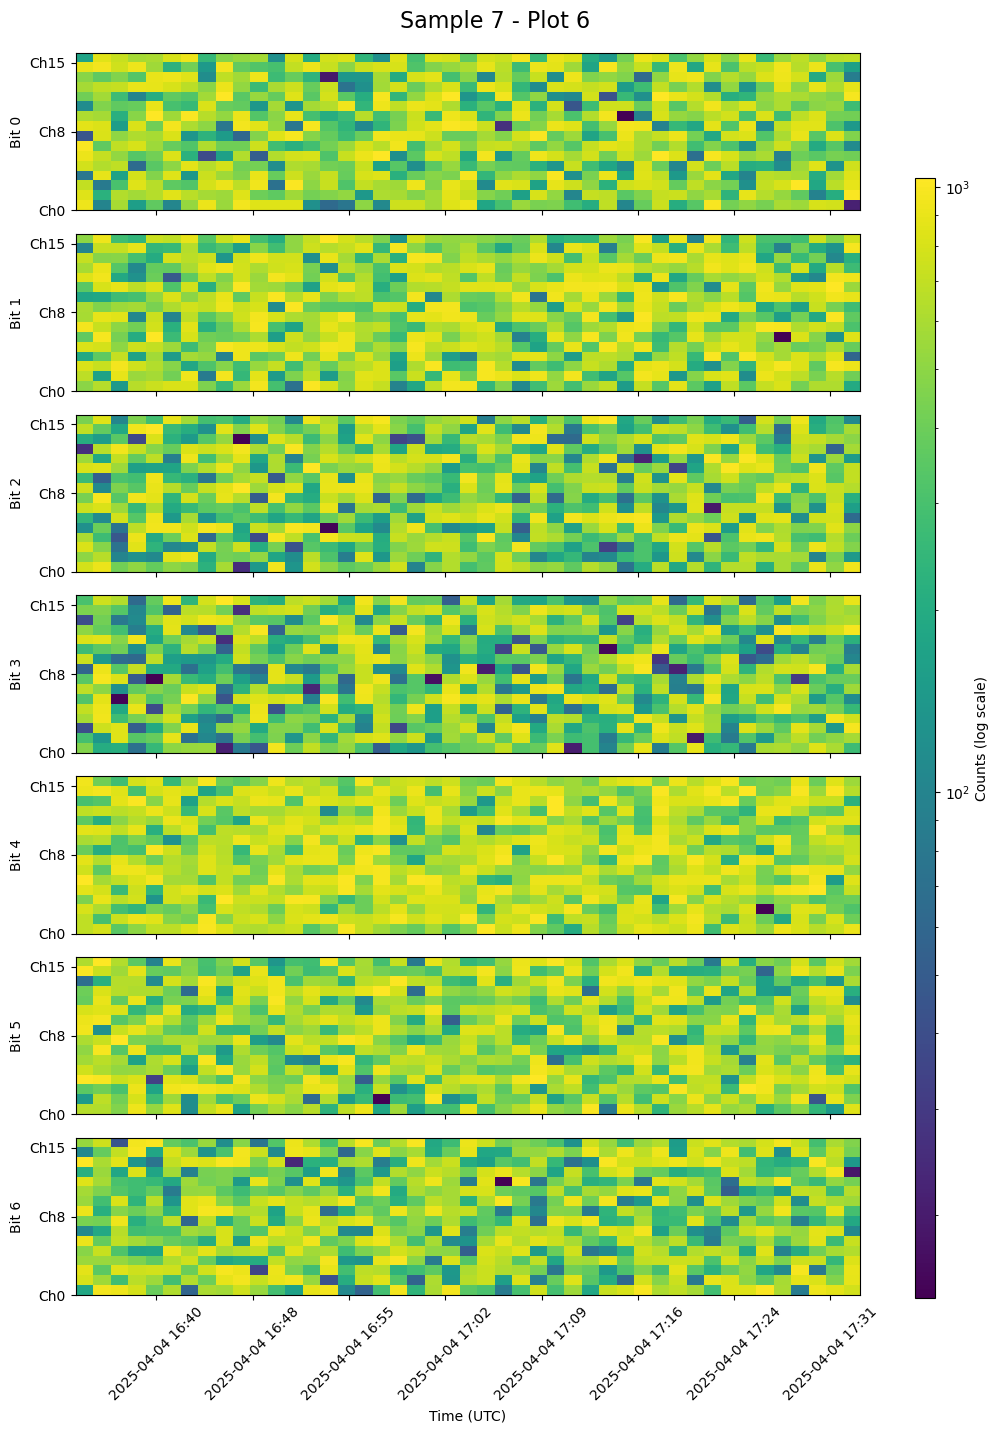

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


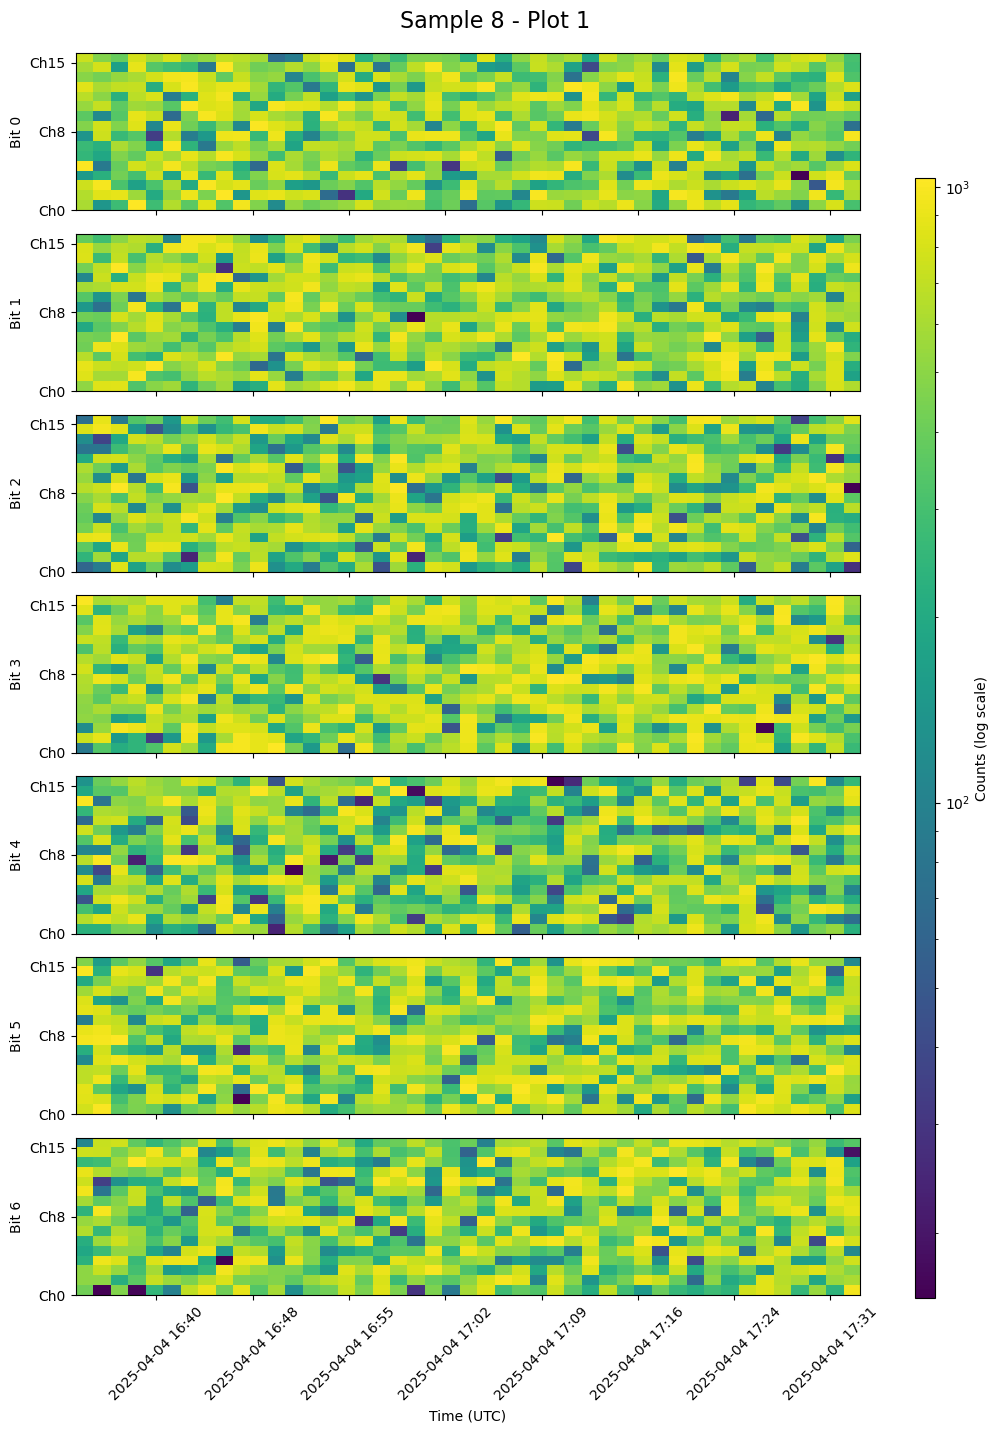

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


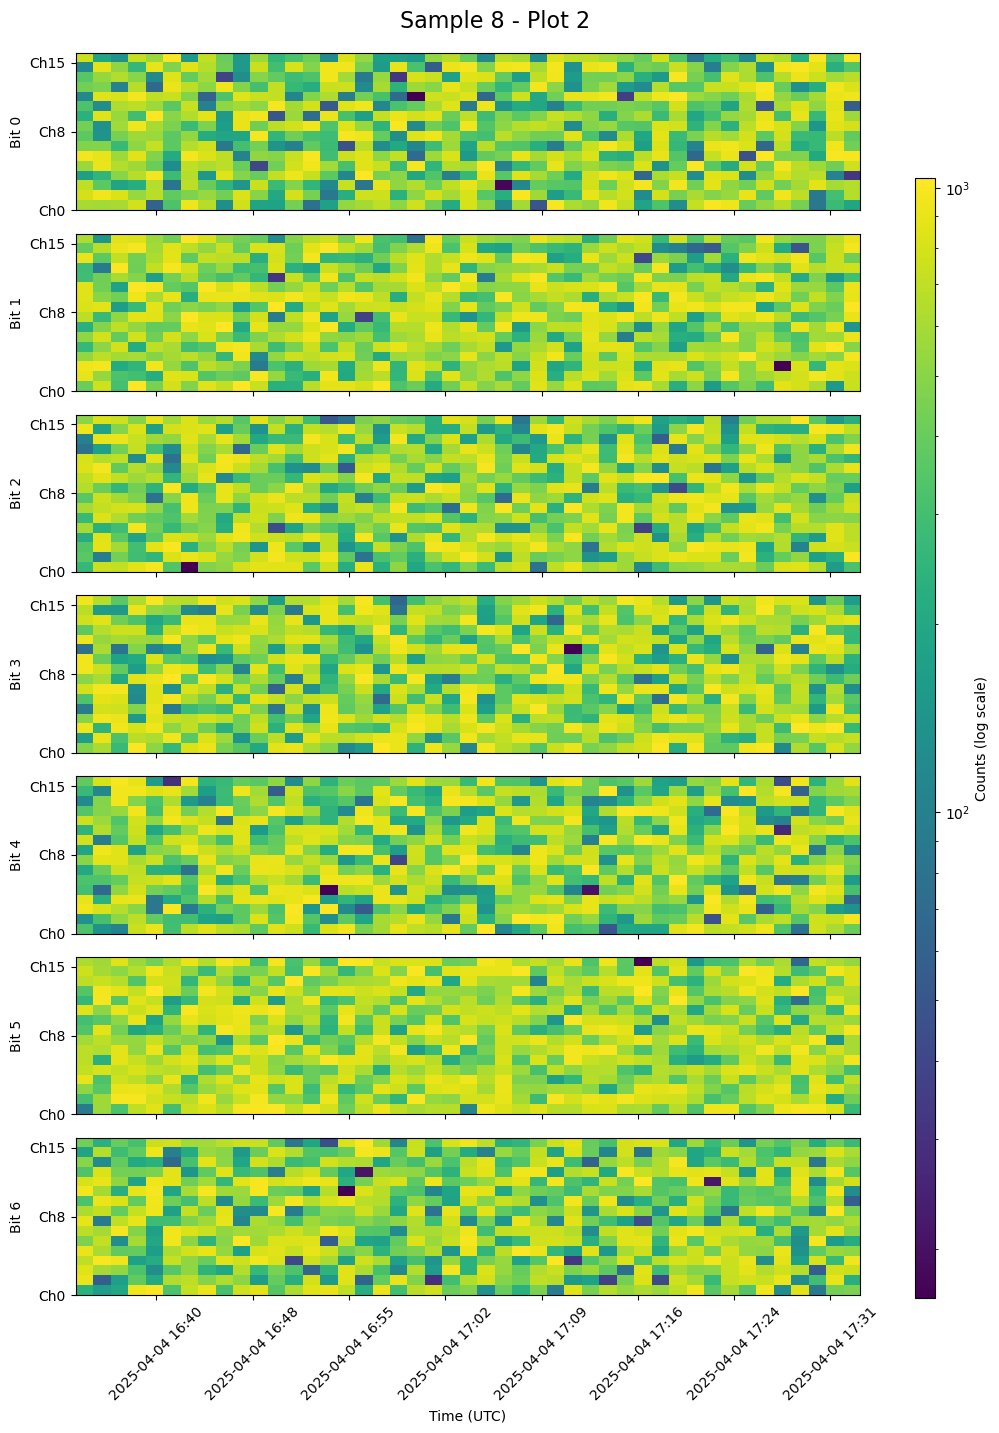

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


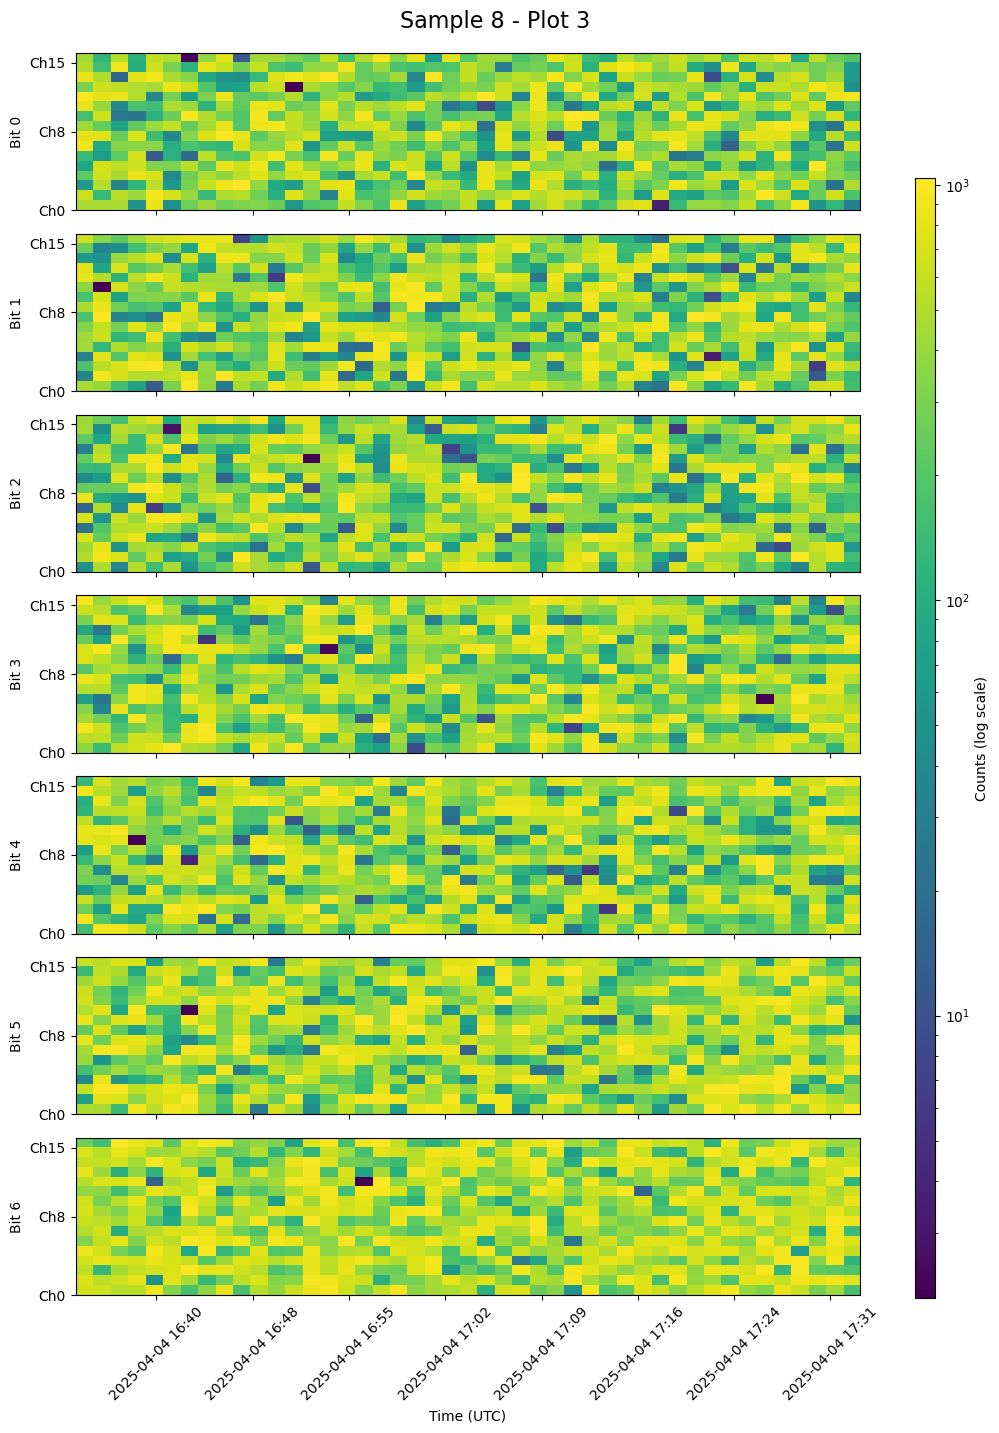

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


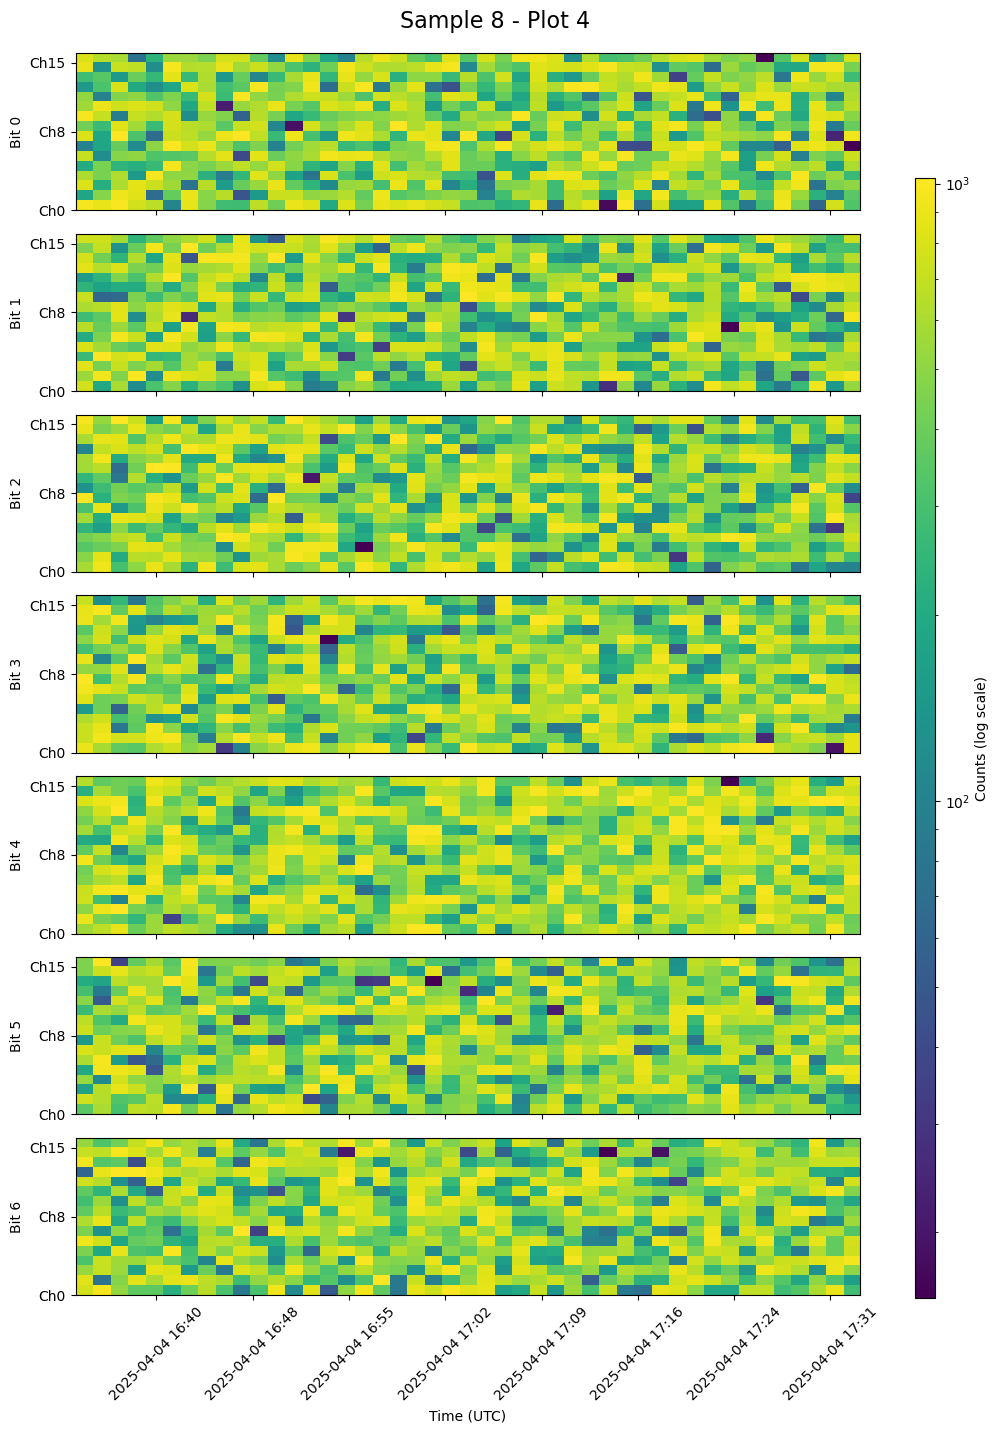

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


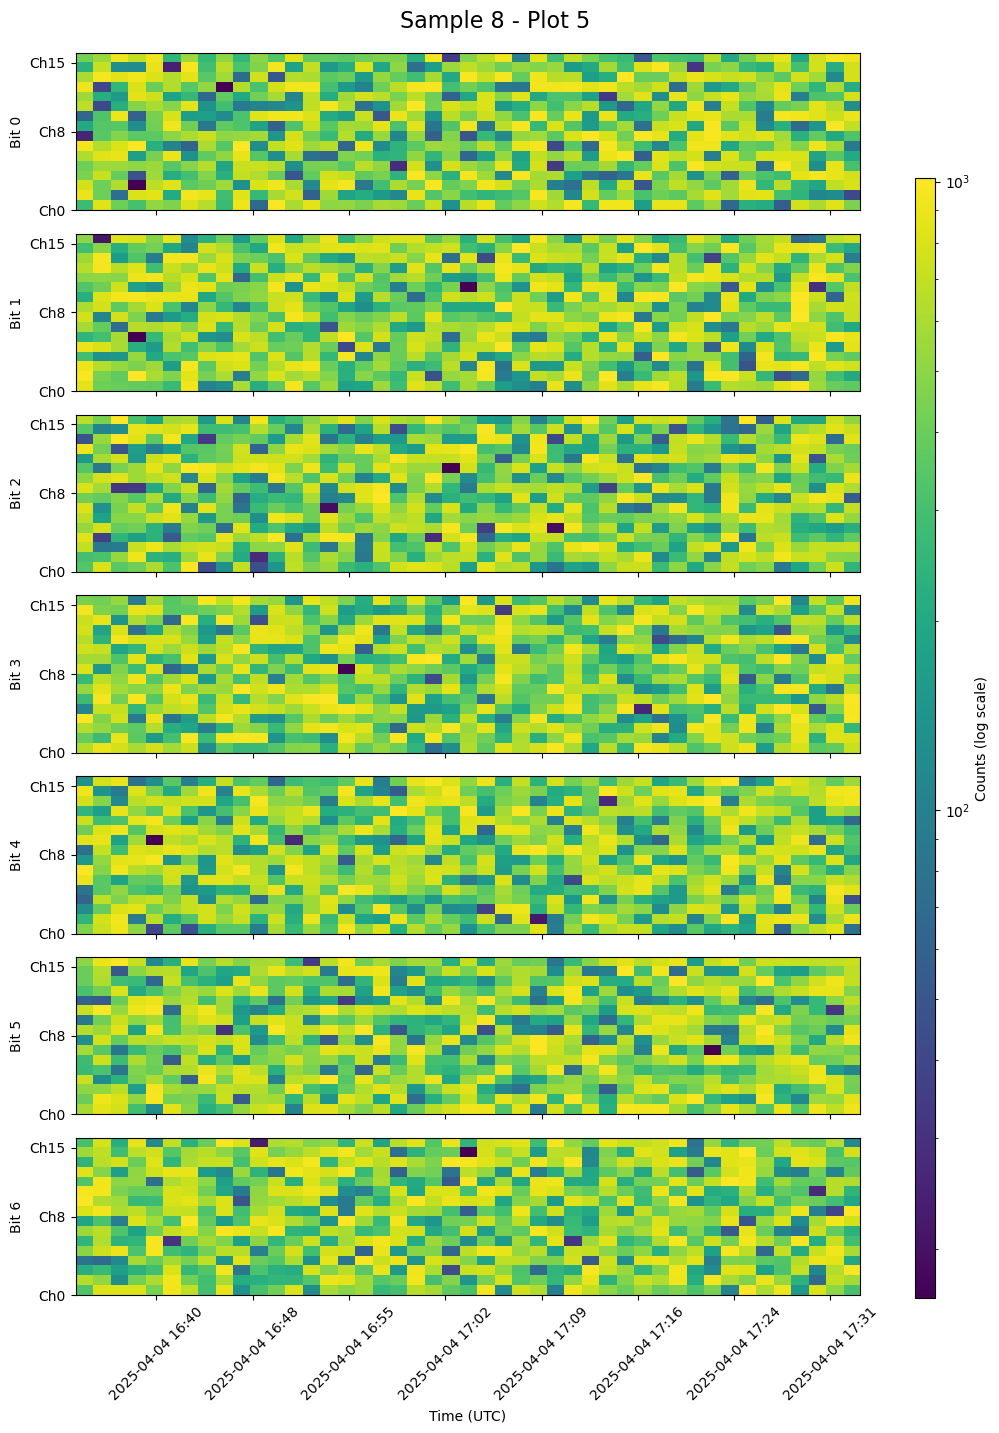

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


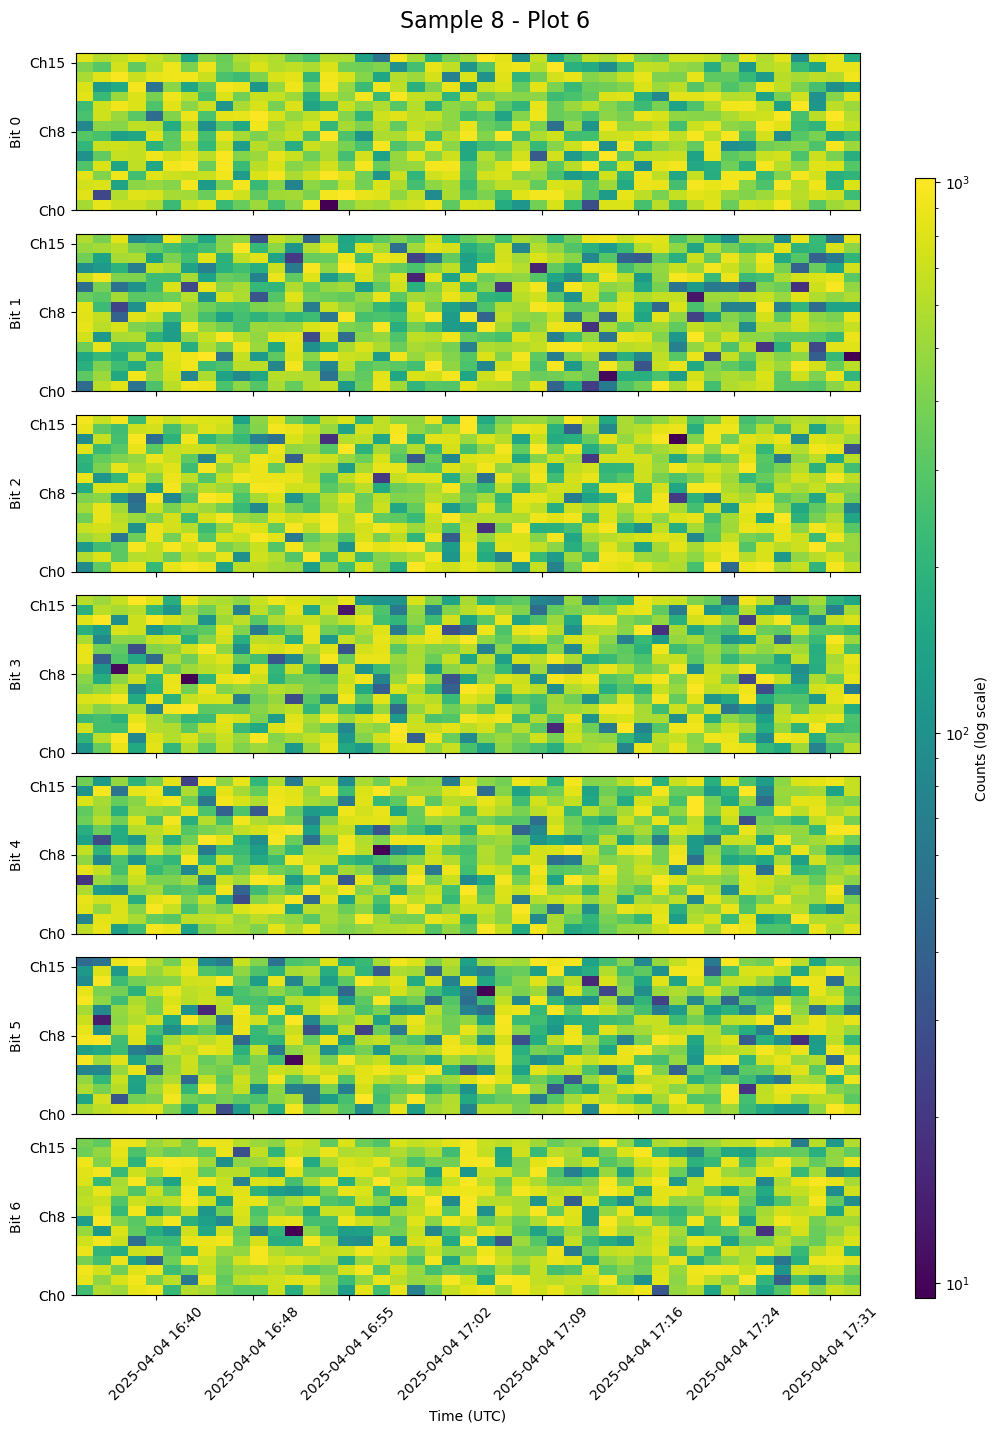

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


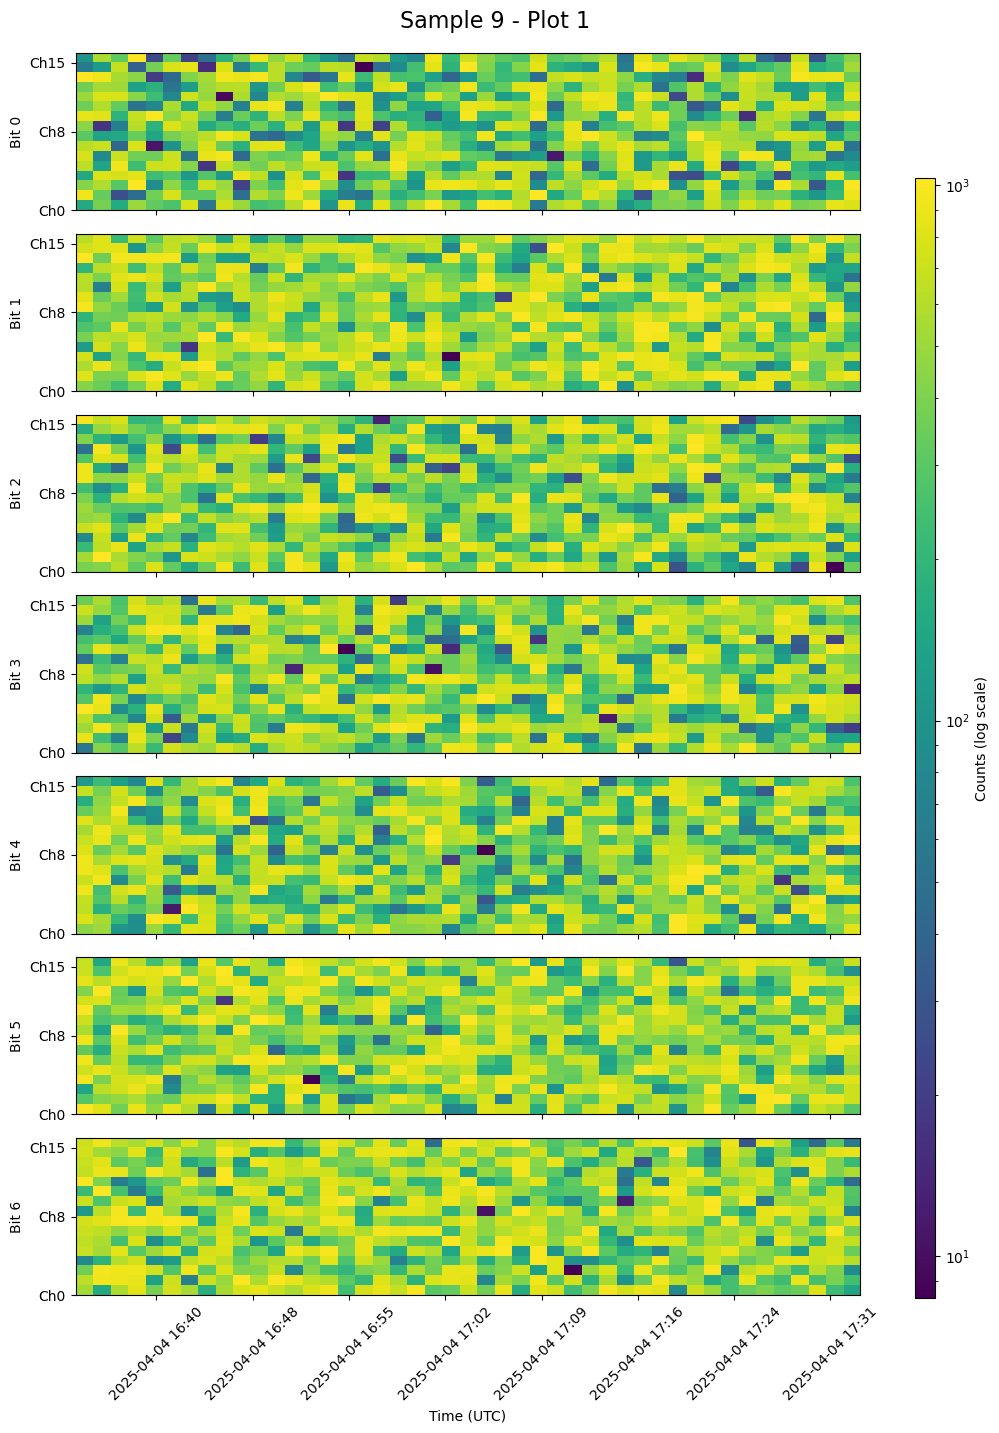

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


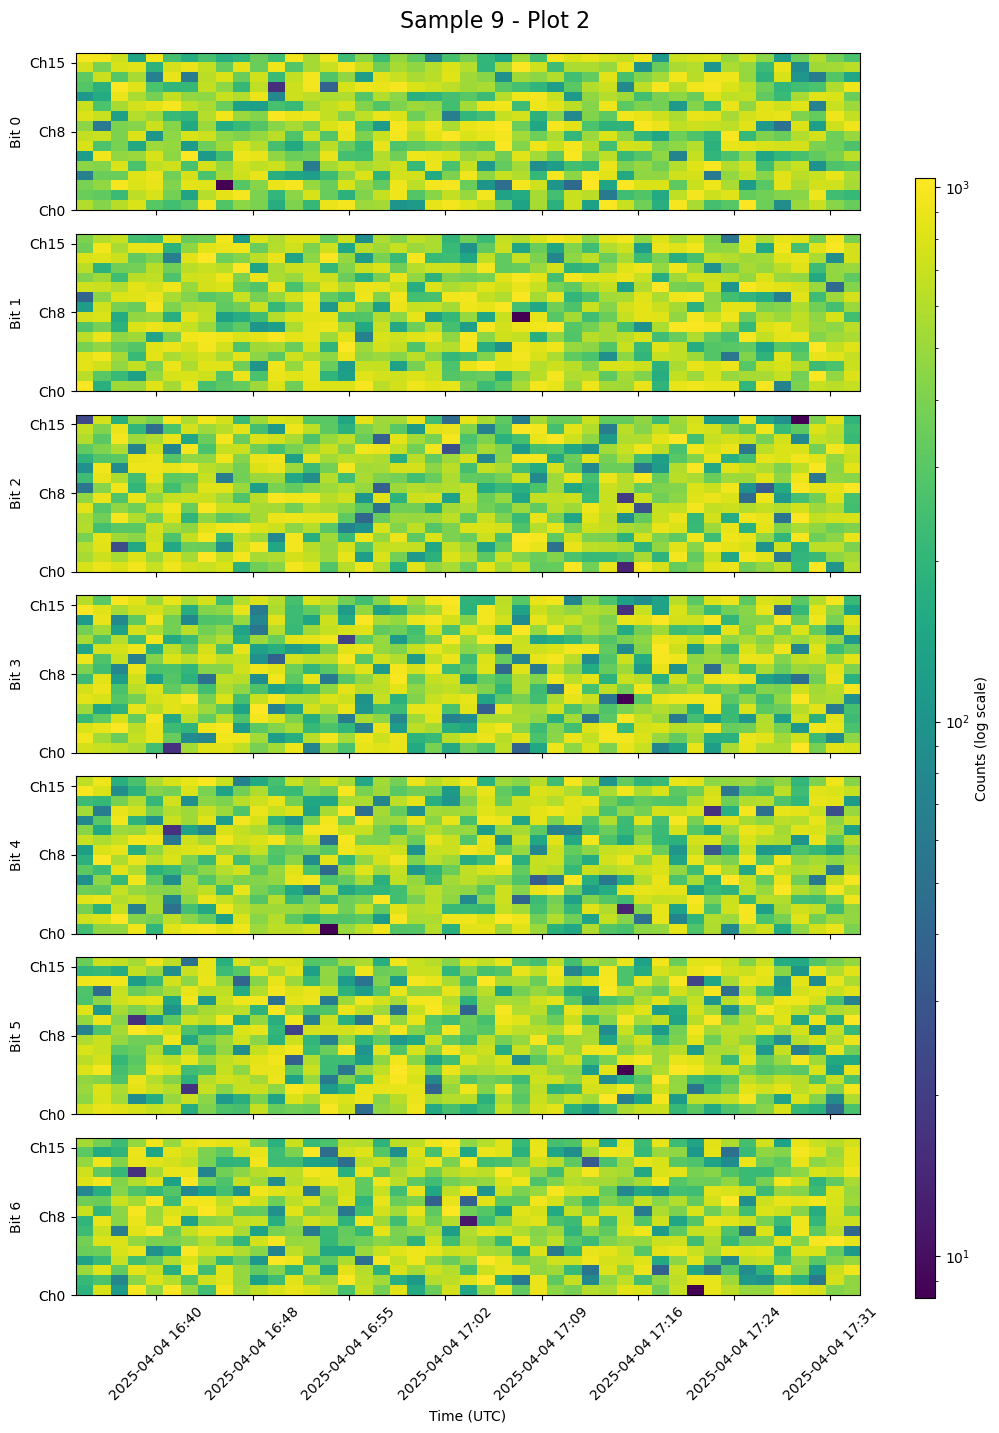

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


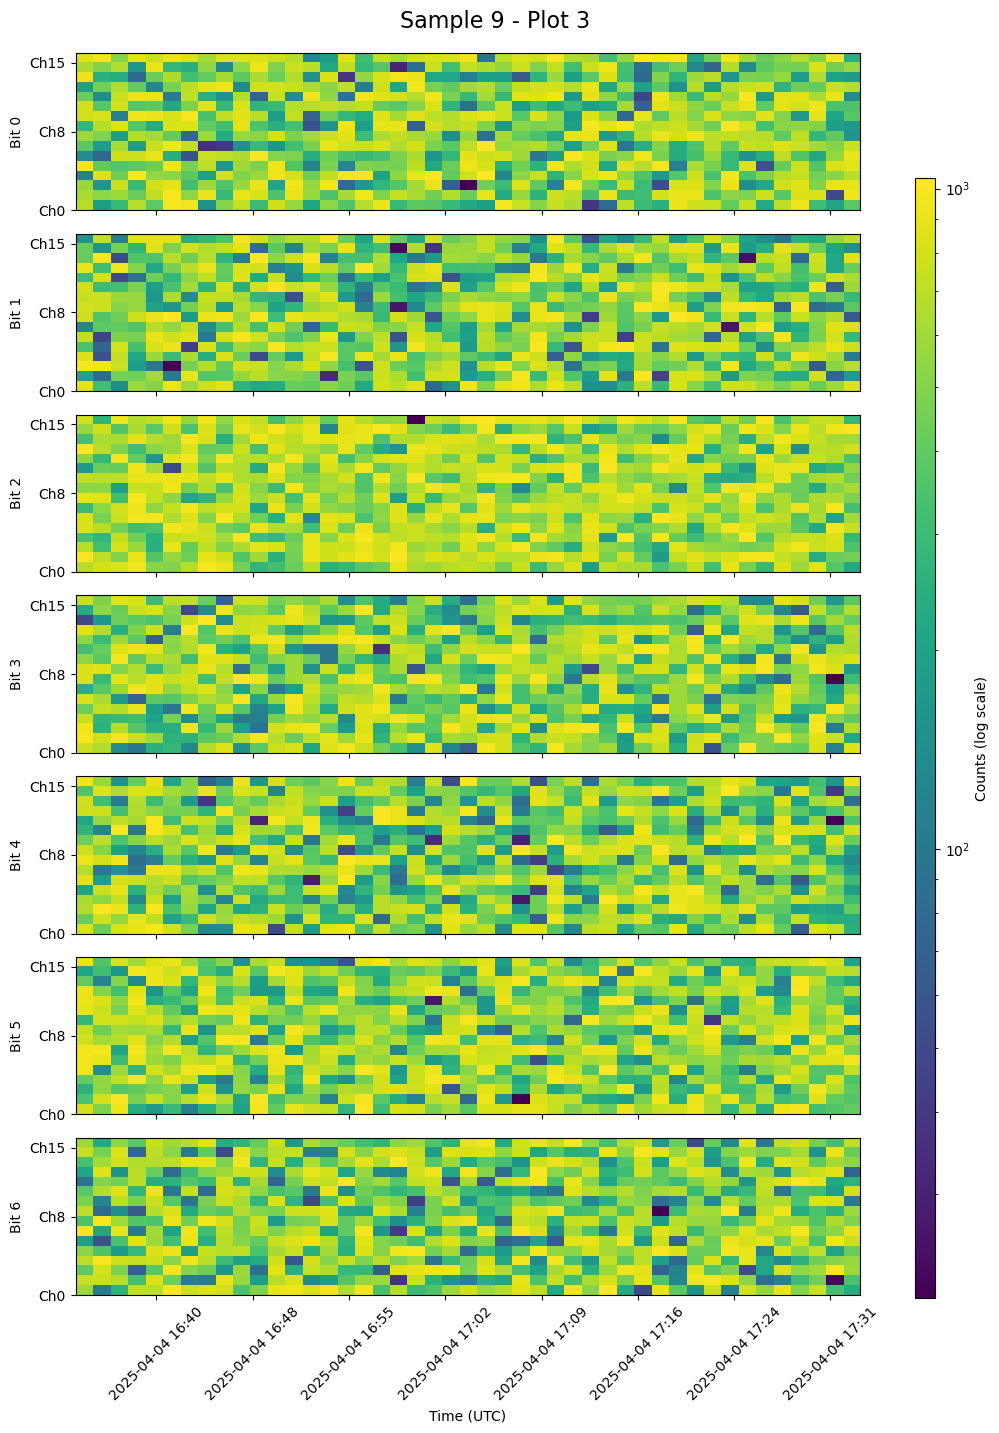

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


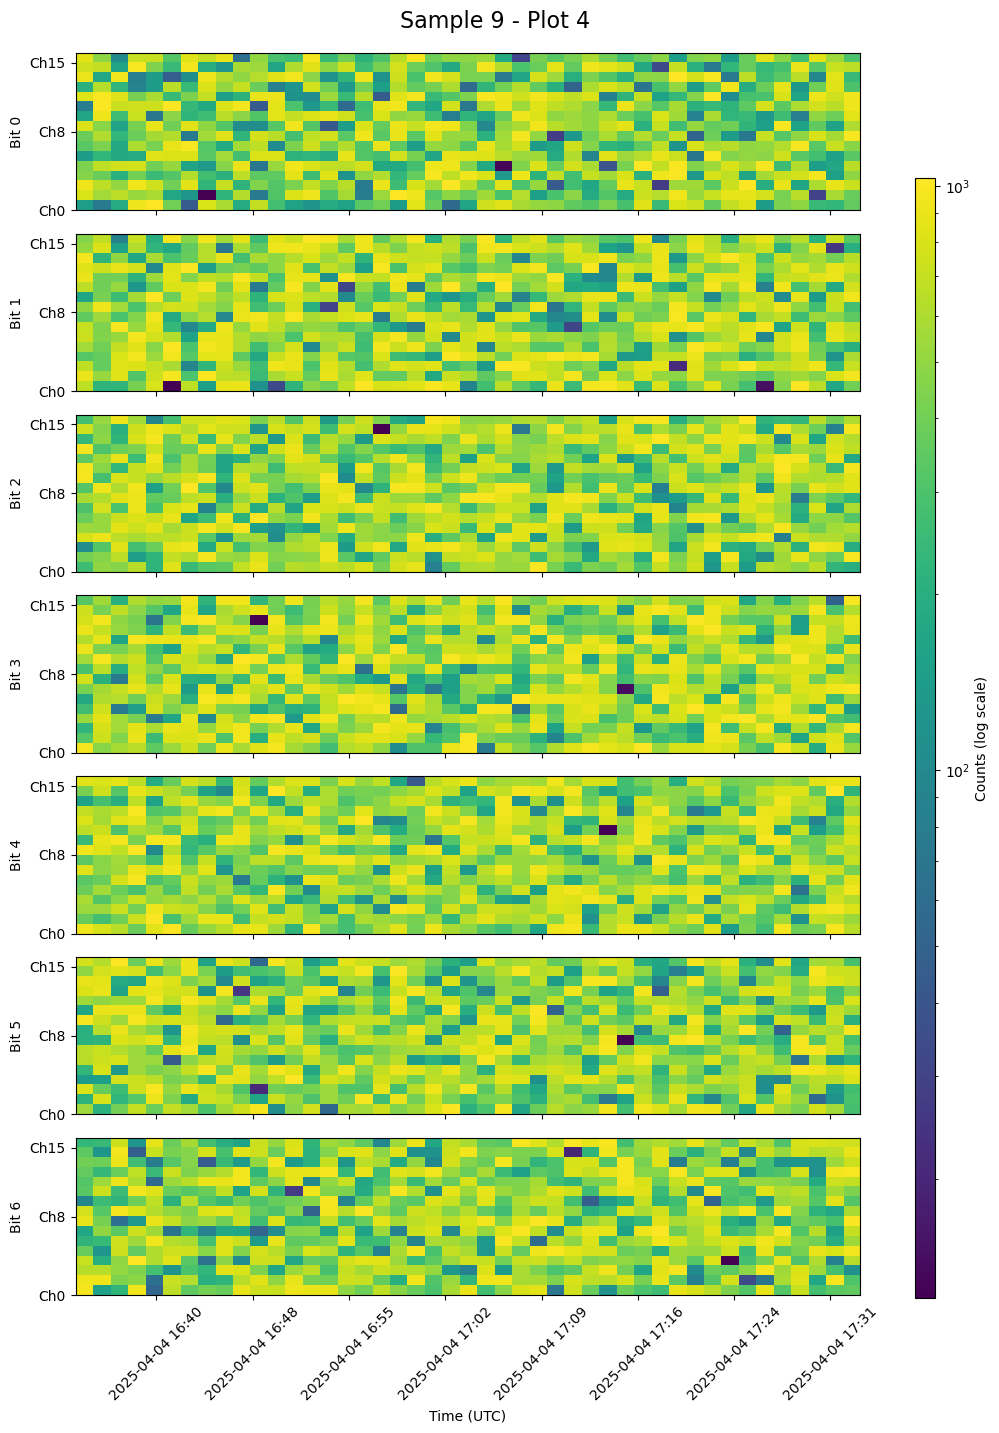

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


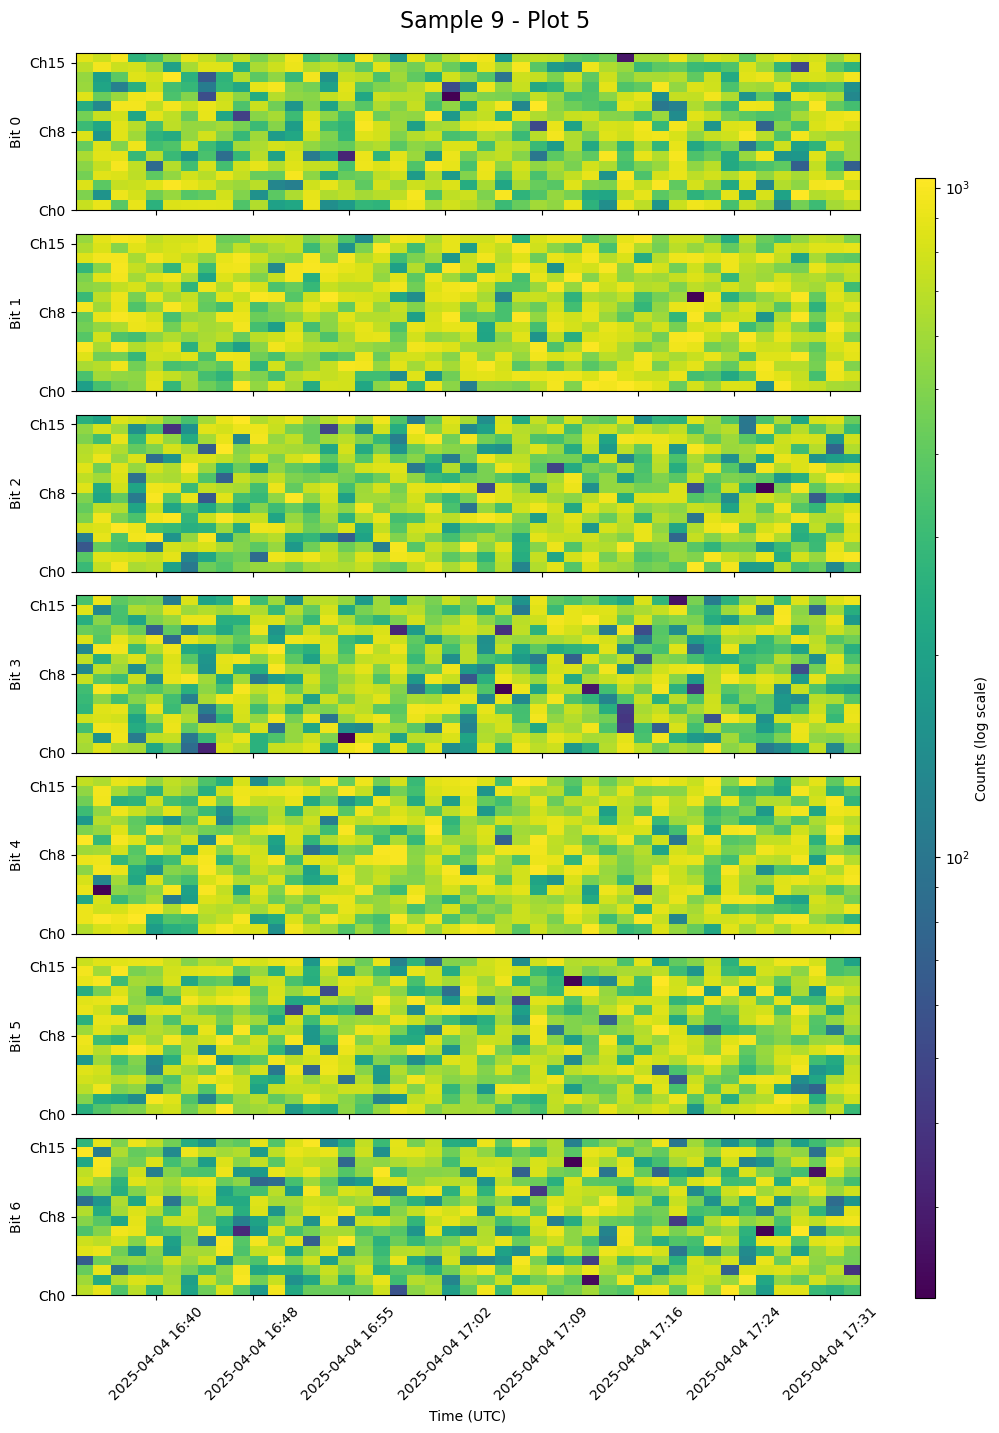

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


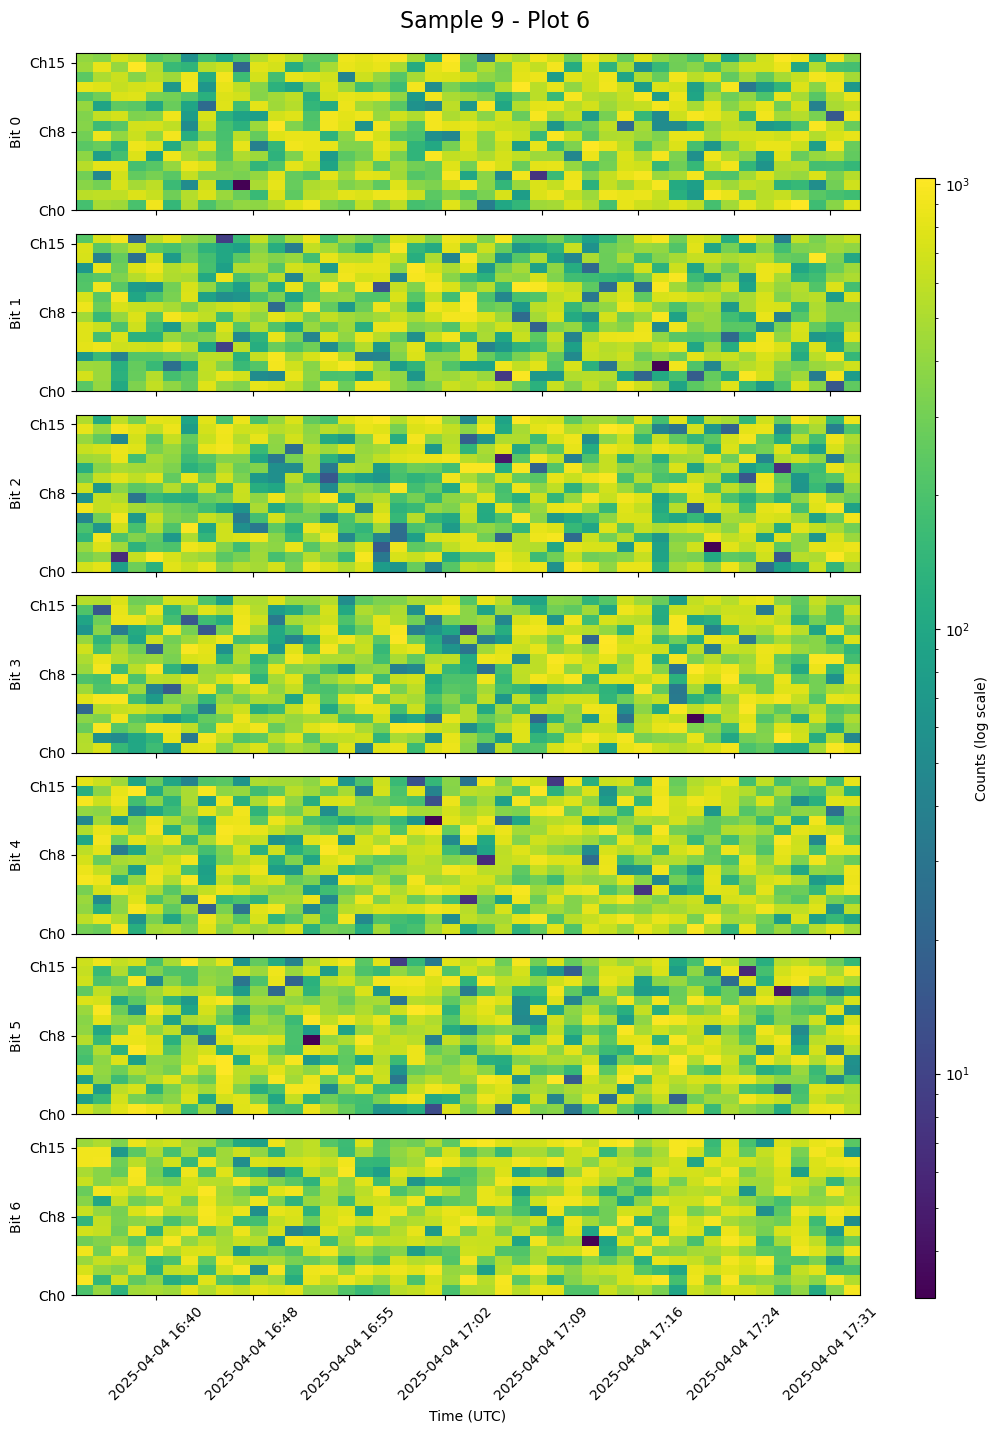

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


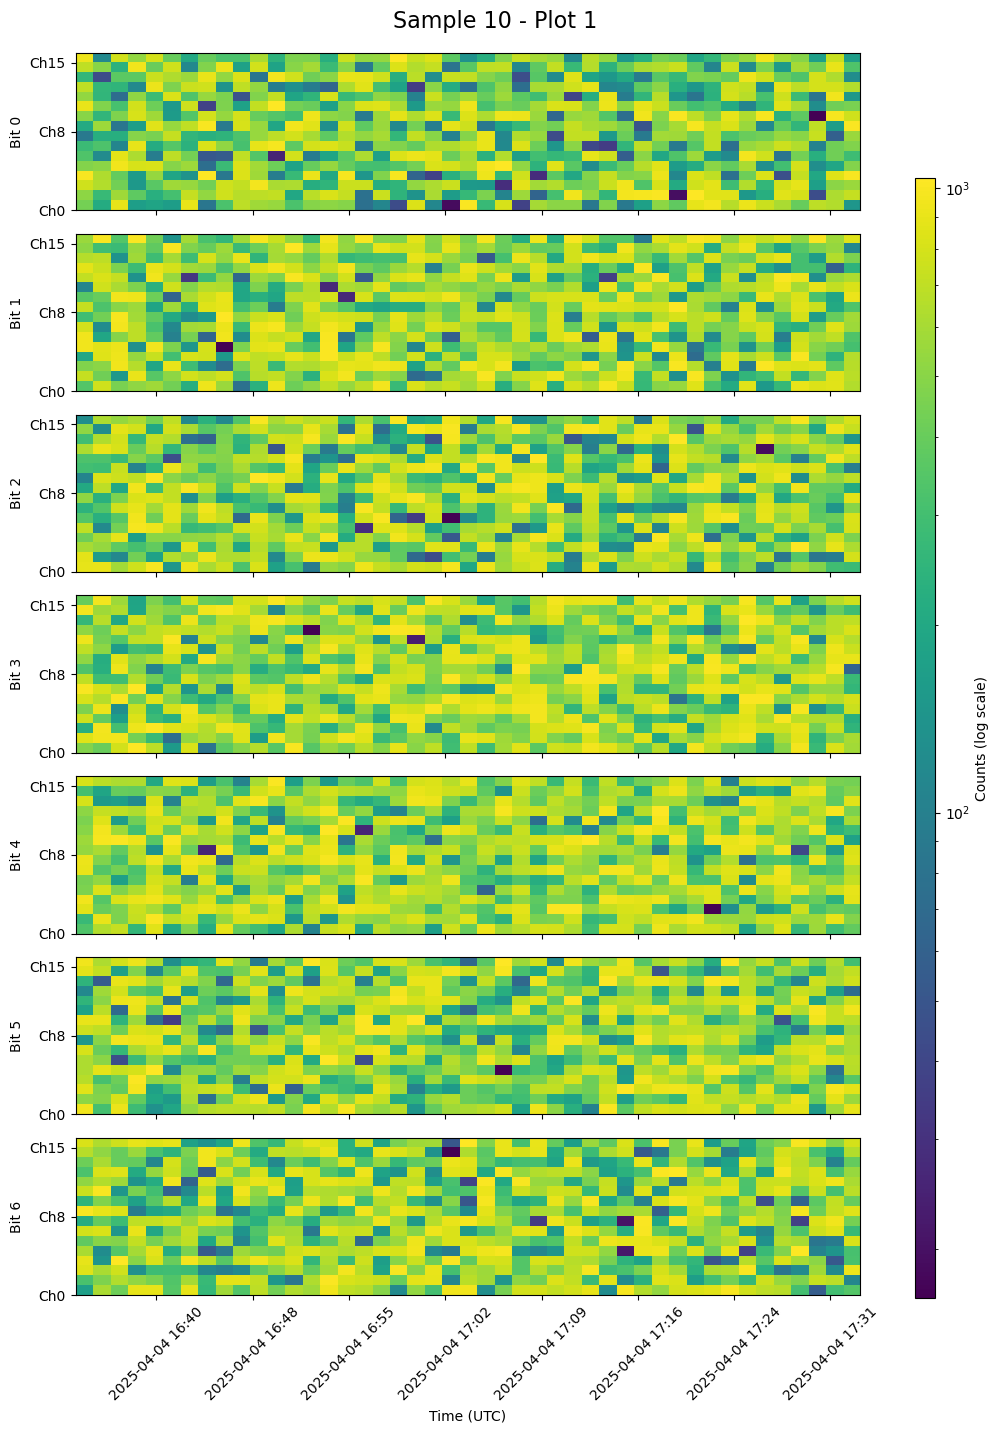

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


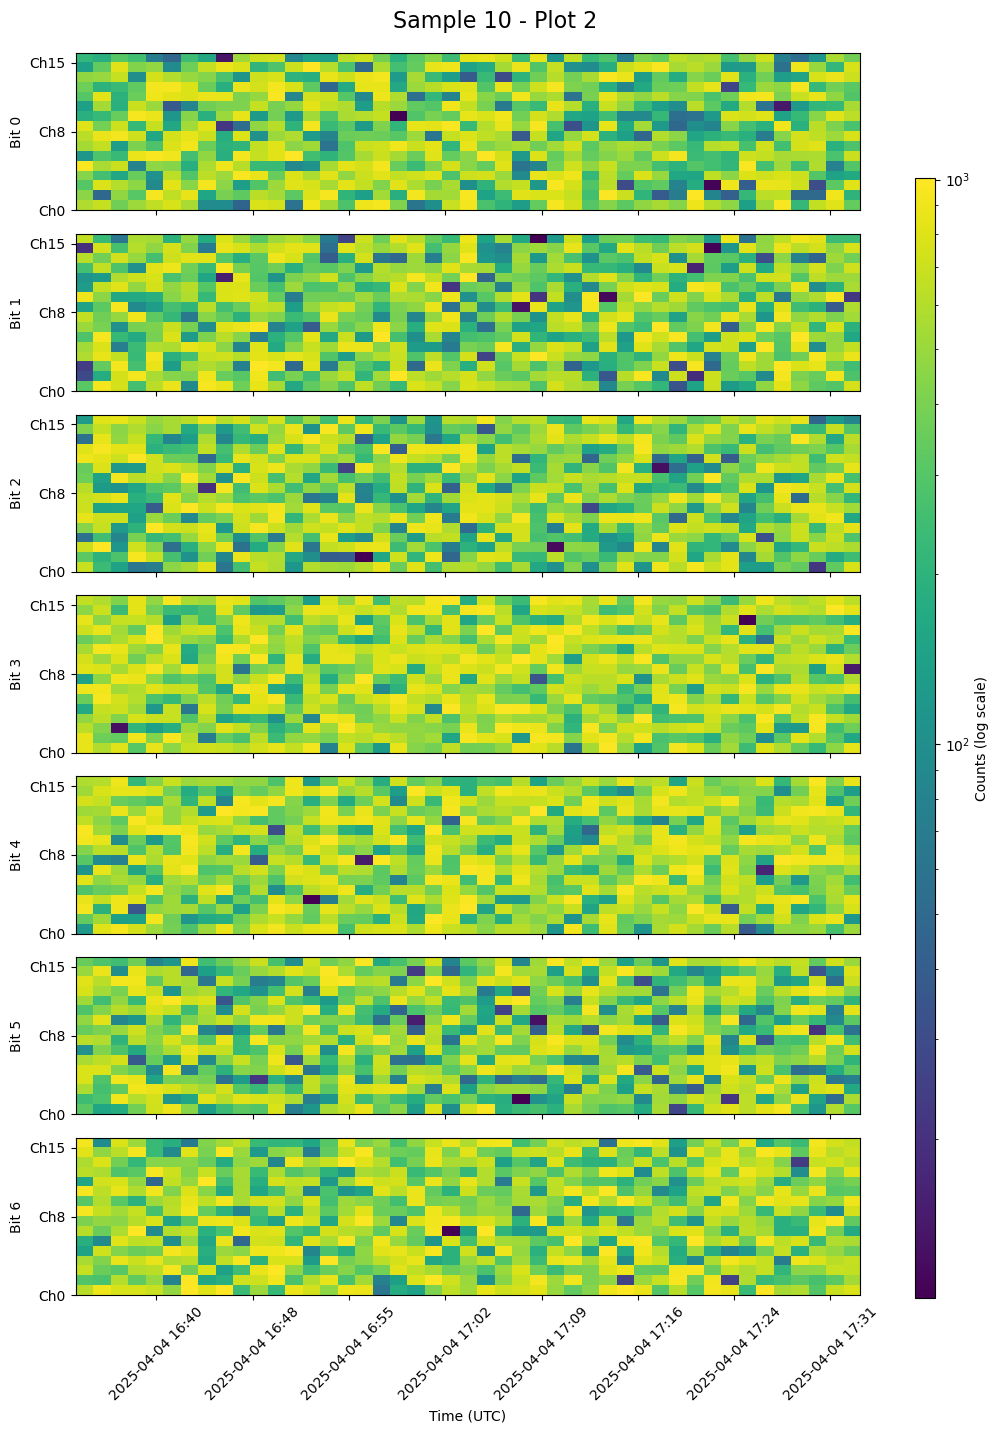

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


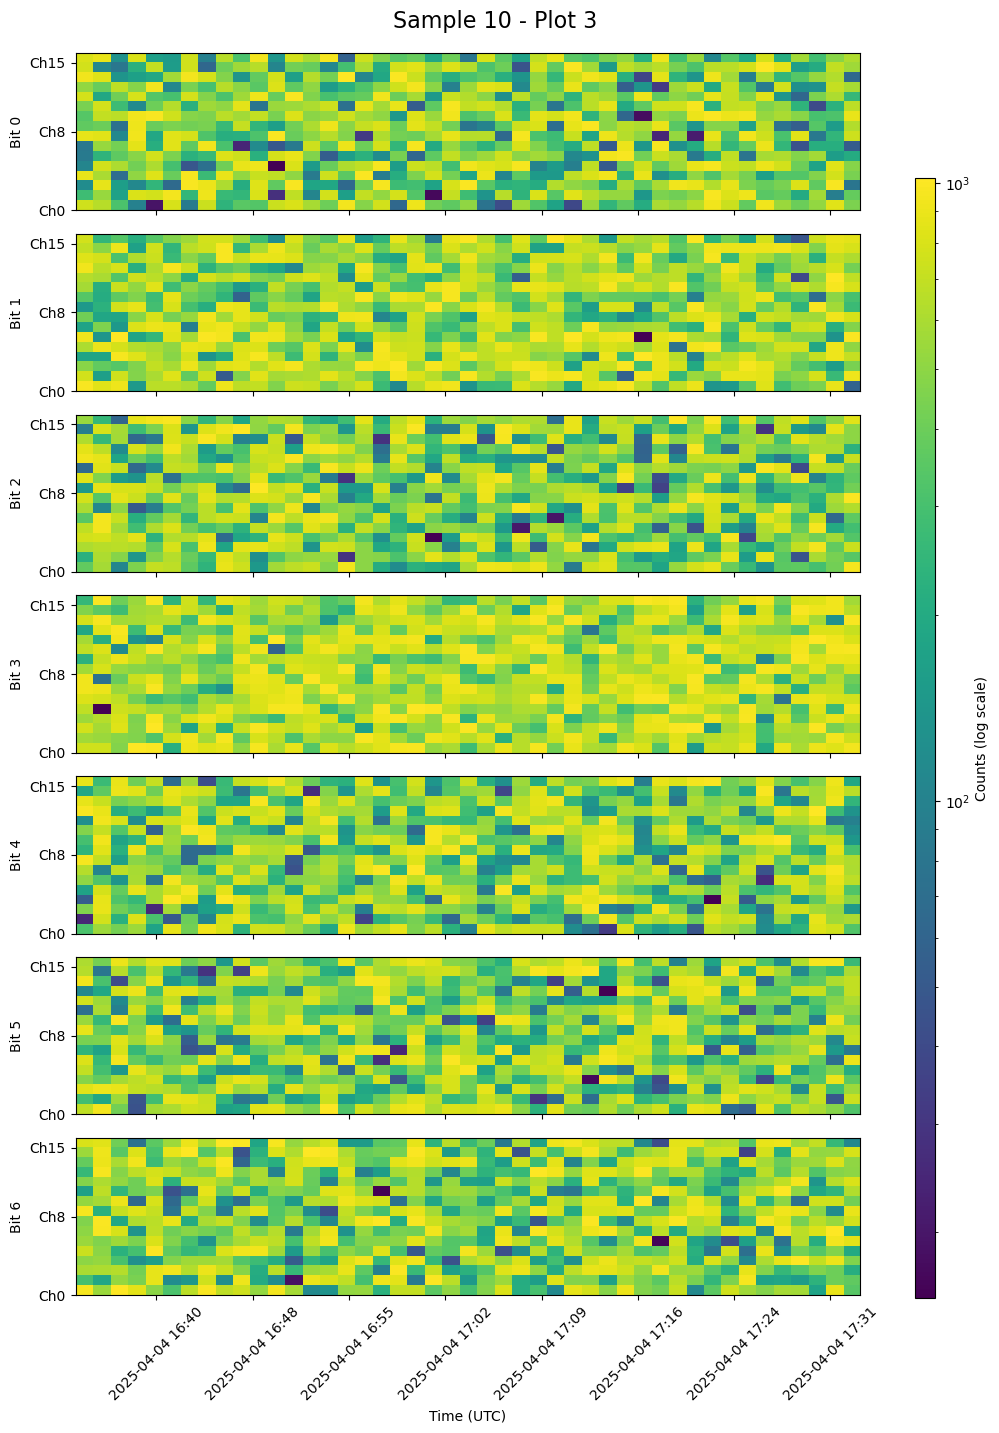

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


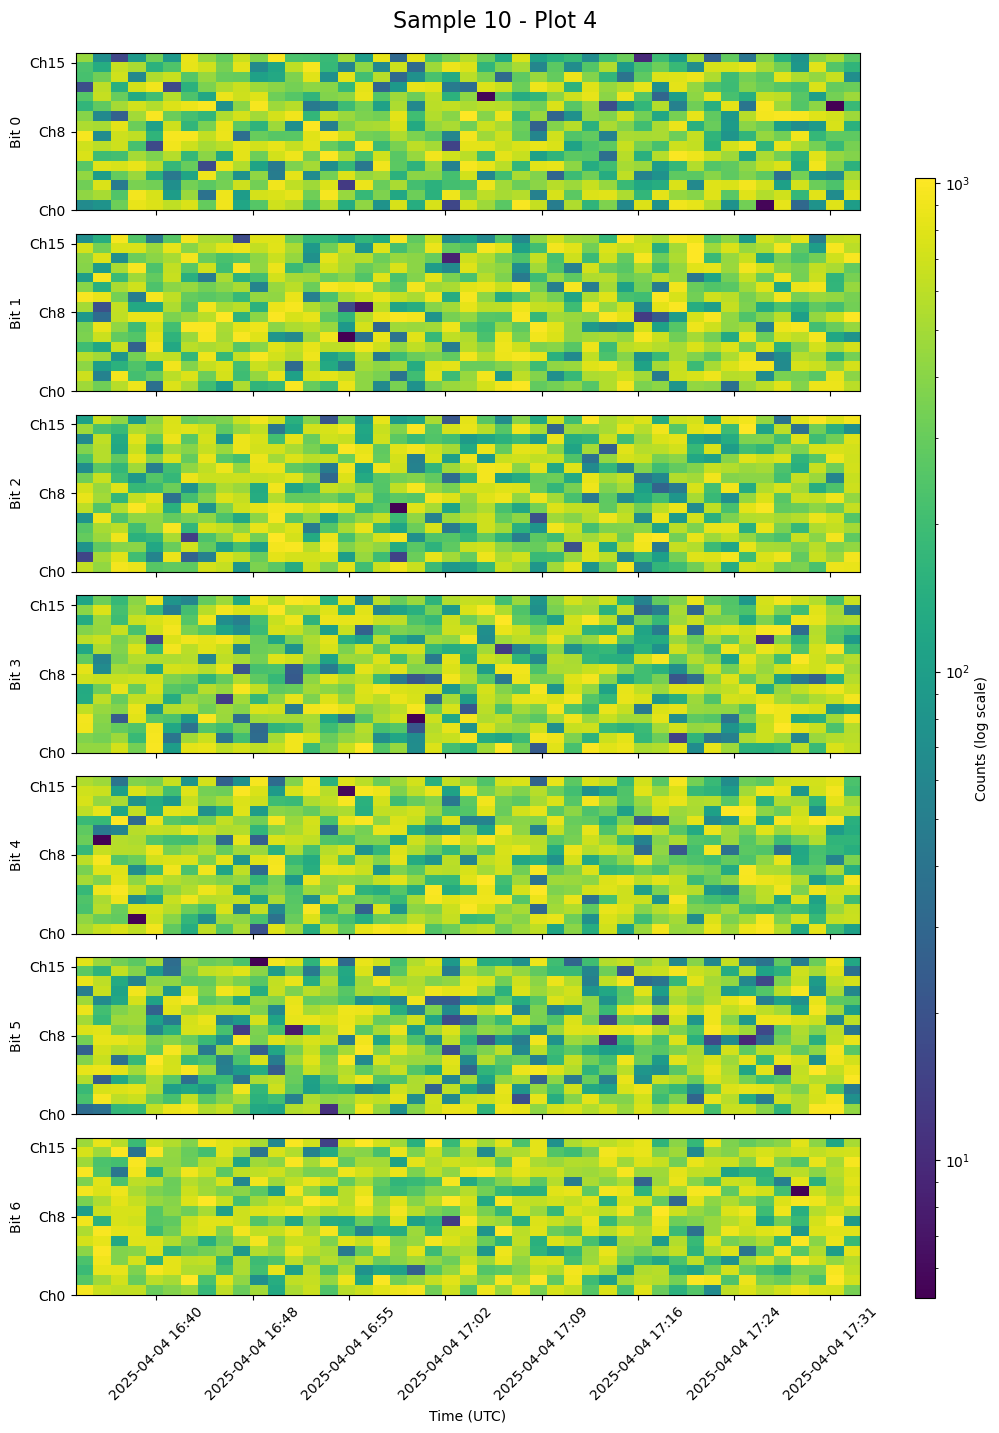

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


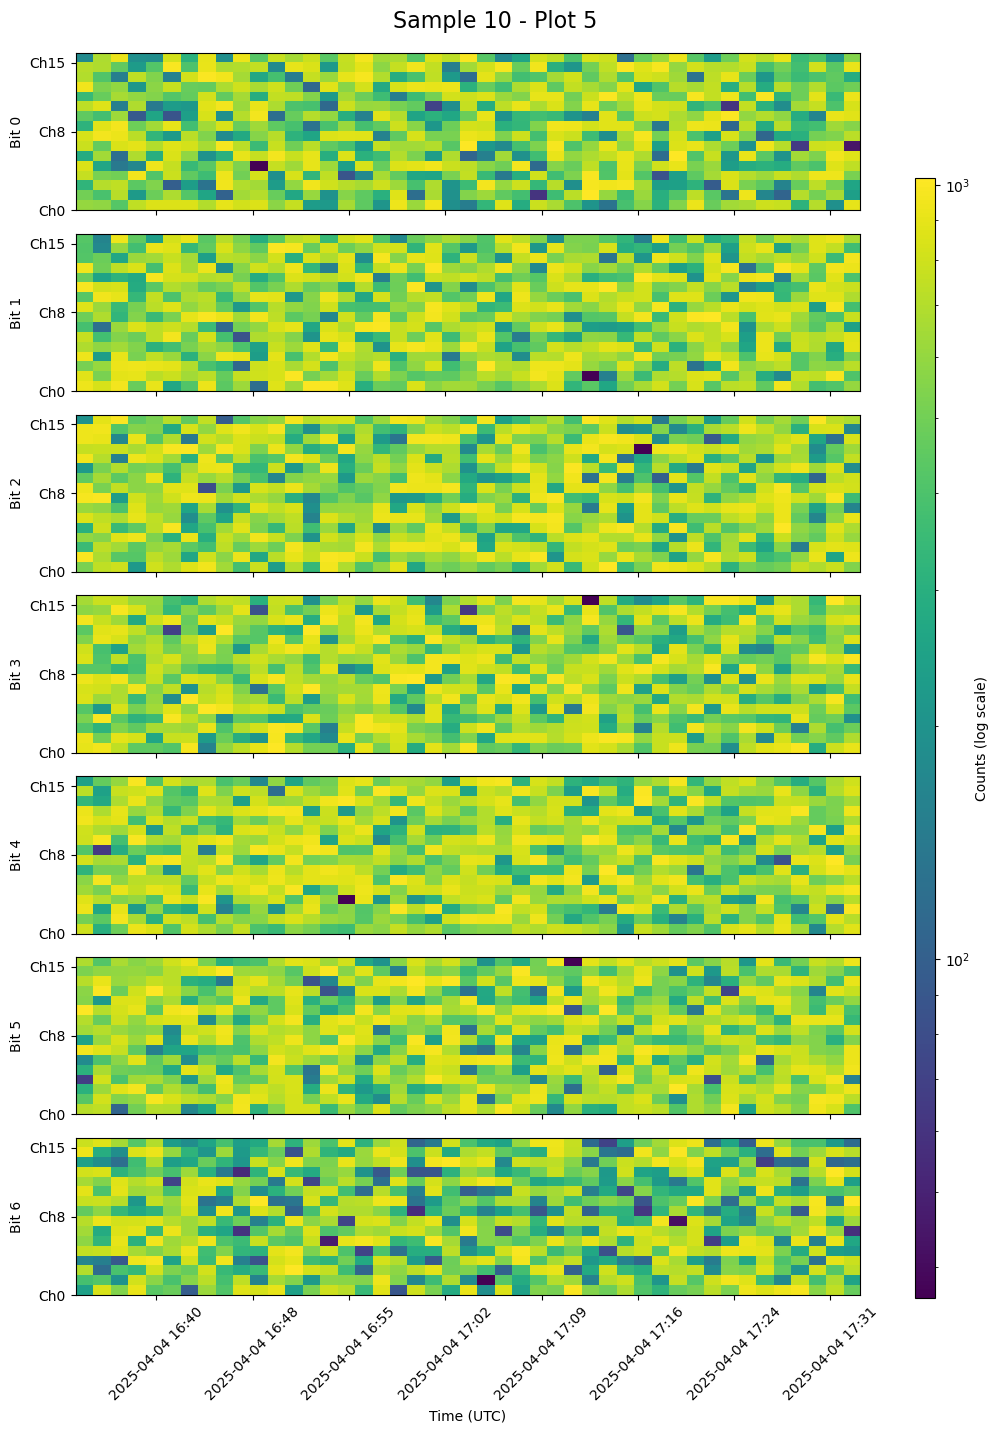

C:\Users\wangj\AppData\Local\Temp\ipykernel_25720\1602741173.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


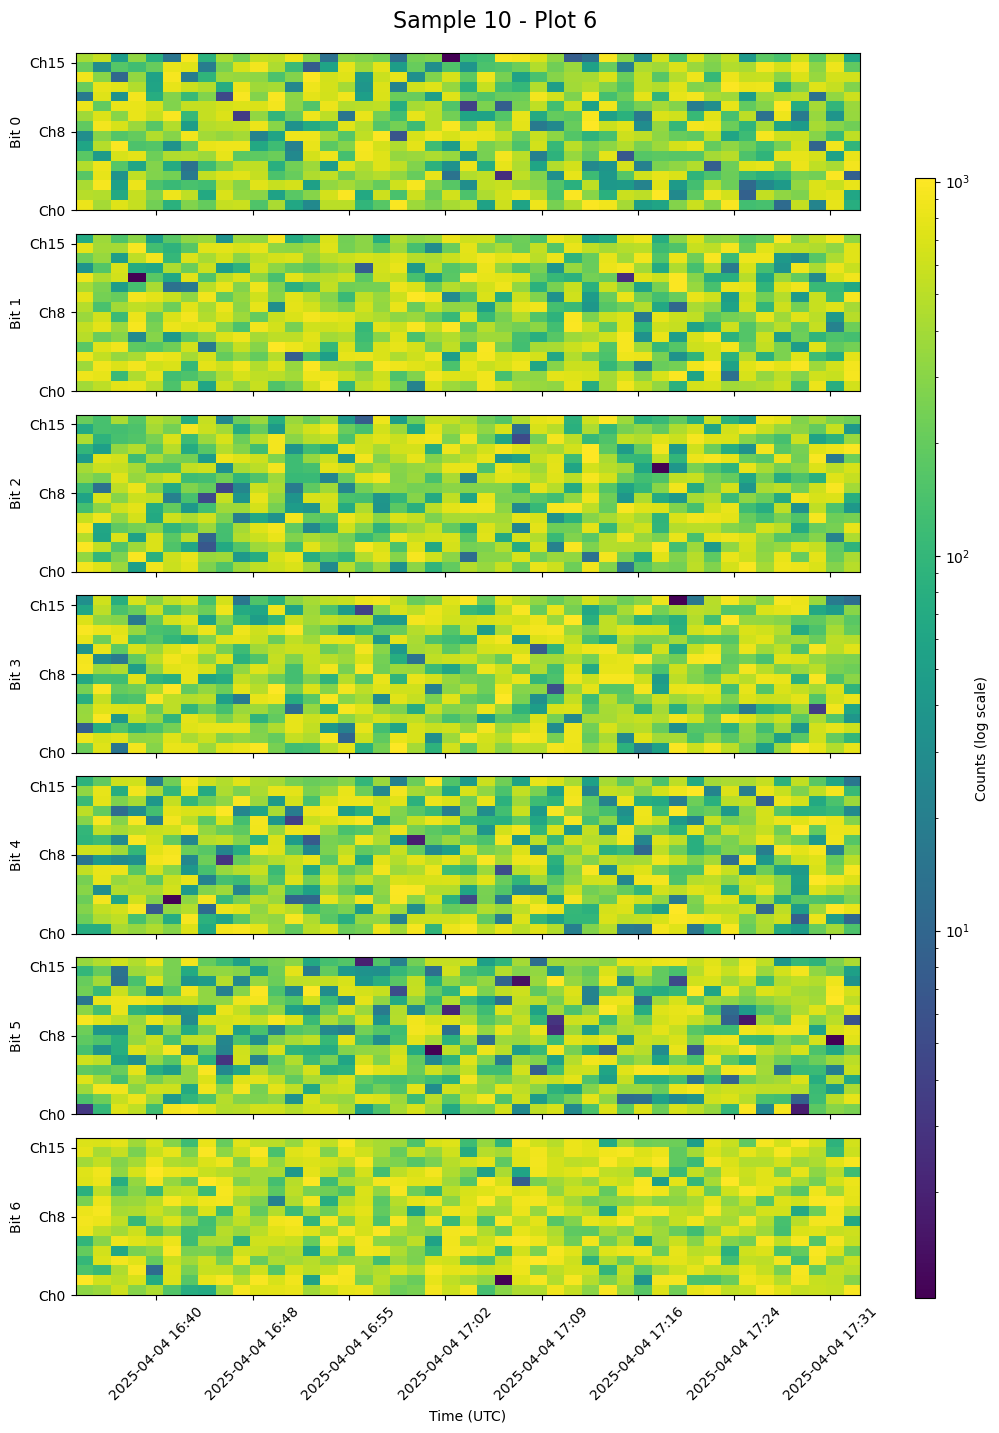

In [77]:
plot_cdf_energy_heatmaps("../input/l1_cdf_data_l2_fixed.cdf")
